### Great Resources!!!

[https://s3-us-west-2.amazonaws.com/secure.notion-static.com/f8c1d4db-383c-4bad-a133-50f29216ca4a/MySQLNotesForProfessionals.pdf](MySQL%20Cheat-Sheet%20-%20Basics%20c6d124b2ecc140739562711e59595bcd/MySQLNotesForProfessionals.pdf)

<a href="https://downloads.mysql.com/docs/refman-8.0-en.pdf" class="bookmark source"></a>

https://downloads.mysql.com/docs/refman-8.0-en.pdf

<figure>
<img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/f477aee878bb18425f8e1770f0536b1efbf06d4d.png" class="icon bookmark-icon" />
</figure>

### Okay Resources

[https://s3-us-west-2.amazonaws.com/secure.notion-static.com/2994aa2a-e667-4341-b47a-bdb87e7c0a11/My_SQL_CheatSheet(4).html](MySQL%20Cheat-Sheet%20-%20Basics%20c6d124b2ecc140739562711e59595bcd/My_SQL_CheatSheet(4).html)

<https://www.mysqltutorial.org/mysql-rollup/>

### Postgres Cheat Sheet

[https://www.notion.so/bardadon/PostgreSQL-Cheat-Sheet-1d89ed493db2406cba4814e6d9775df9](https://www.notion.so/PostgreSQL-Cheat-Sheet-1d89ed493db2406cba4814e6d9775df9)

# INSERT



-   We can insert data using the GUI(like mysql workbench) but we should
    also know how code it as well.

<!-- -->

-   We can insert data into tables by specifying which column we are
    going to add data to them.

<!-- -->

-   Columns like movie_id that are auto incremented should not be
    included since mysql will automatically increment an id.

<!-- -->

-   The values that we add should match the order of the column we
    specified.

<!-- -->

-   For example lets add the movie Pulp Fiction to the data base.

``` code
insert into movies (movie_title, director, year, genere_id)
values('Pulp Fiction', 'Tarantino', 1992, 5)
```

-   As we can see we should specify which data should be added for every
    column except the auto_increment on.

<!-- -->

-   But sometimes we don't really know some of the data that should be
    added.

<!-- -->

-   For example, in this case we specified that the genre id is 5, what
    if we didn't know that if we didn't want to search the database for
    that value?

<!-- -->

-   In this case we can use a query to specify the value for us:

``` code
insert into movies (movie_title, director, year, genere_id)
values('Pulp Fiction', 'Tarantino', 1992,
         (SELECT genere_id FROM movies WHERE movie_title = 'Kill Bill'))
```

-   In this case, i didn't know what genre id the movie pulp fiction is
    but i do know that it should be the same as Kill Bill, so instead of
    searching the database i can simply use a query.


## Insert Multiple Rows

``` code
INSERT INTO 
    projects(name, start_date, end_date)
VALUES
    ('AI for Marketing','2019-08-01','2019-12-31'),
    ('ML for Sales','2019-05-15','2019-11-20');
```

Note:

MySQL has a limit on the number of packets it can insert, we can check
it with this:

``` code
SHOW VARIABLES LIKE 'max_allowed_packet';

# Set a new size if there's an error
SET GLOBAL max_allowed_packet=size;
```

|     |                    |          |
|-----|--------------------|----------|
|     | Variable_name      | Value    |
|     | max_allowed_packet | 67108864 |

## Insert Ignore

When we want to insert multiple rows but we are not sure if one of the
rows already exists, we can use the insert ignore command.

Instead of hoping that there are no rows that already exists in the
table, we can use insert ignore and MySQL will ignore the insert
statements that get a duplication error.

-   Creating a table and inserting a row:

``` code
CREATE TABLE subscribers (
    email varchar(50) PRIMARY KEY
);
```

-   Inserting two duplicate rows and getting a duplication error:

``` code
INSERT INTO subscribers(email) 
VALUES
('bardadon@gmail.com'),
('bardadon@gmail.com');

show warnings;
```

|     |       |      |                                                                  |
|-----|-------|------|------------------------------------------------------------------|
|     | Level | Code | Message                                                          |
|     | Error | 1062 | Duplicate entry 'bardadon@gmail.com' for key 'subscribers.email' |

-   To get around that, i can use `insert ignore`:

``` code
INSERT IGNORE INTO subscribers(email) 
VALUES
('bardadon@gmail.com'),
('bardadon@gmail.com');
```

-   Lets verify this:

``` code
select *
from subscribers;
```

|     |                    |
|-----|--------------------|
|     | email              |
|     | bardadon@gmail.com |
|     |                    |


# Update

-   To update we need to specify the table and then set the required
    values for all the column we want to update, then specify the exact
    values we want to change using a where clause .

<!-- -->

-   We dont need to specify every column, only those we want to change.

<!-- -->

-   For example, lets change the directors name to 'Quintin Tarantino'
    instead of Tarantino and change the year to 1994 instead of 1992.

``` code
UPDATE moveies
SET
director = 'Quintin Tarantino',
year = 1994
genere_id = 5
WHERE movie_title = 'Pulp Fiction'
```

-   Note: The where clause is very important when updating, if we were
    to use this query without the where clause, MySql will change the
    directors name, year and genere_id for EVERY movie in the database
    instead of the specific one that we want.

<!-- -->

-   Just like insert we can use a query to specify the exact value to
    update without having to manually look at the database.

<!-- -->

-   For example, lets say i know that Kill Bill and Pulp Fiction came
    out at the same year and i want to update the year of Pulp Fiction
    to match that of Kill Bill(without looking at the database)

``` code
UPDATE movies
SET 
year = (SELECT year FROM movies WHERE movie_title = 'Kill Bill')
WHERE movie_title = 'Pulp Fiction'
```

## UPDATE - low_priority()

The `LOW_PRIORITY`modifier instructs the `UPDATE`statement to delay the
update until there is no connection reading data from the table.

The `LOW_PRIORITY`takes effect for the [storage
engines](https://www.mysqltutorial.org/understand-mysql-table-types-innodb-myisam.aspx)
that use table-level
[locking](https://www.mysqltutorial.org/mysql-table-locking/) only such
as `MyISA`, `MERGE`, and `MEMORY`.

``` code
SET SQL_SAFE_UPDATES = 0;

update low_priority customers
set country = 'New France'
where country = 'France';

SET SQL_SAFE_UPDATES = 1;
```

## Update Ignore

Same as with the insert ignore statement. Update Ignore lets us update
multiple rows, and continue to update even if one of them encounters an
error.

## **UPDATE JOIN**

with Update Join we can actually update two tables at once

-   syntax

``` code
UPDATE T1, T2,
[INNER JOIN | LEFT JOIN] T1 ON T1.C1 = T2. C1
SET T1.C2 = T2.C2, 
    T2.C3 = expr
WHERE condition
```

# DELETE

-   When deleting we should always use a where clause, without it MYsql
    will delete the entire Database!.

<!-- -->

-   We can also first use a select statement instead of delete in order
    to make sure that the row that we want to delete is really deleted.

``` code
DELETE FROM movies
WHERE movie_id = 1
```

-   We can also delete multiple rows:

``` code
DELETE FROM movies
WHERE movie_id > 5
```

## ON DELETE CASCADE

When we want to delete rows from a table that has a foreign key
constraint, we need to use the `on delete cascade` command to tell MySQL
that when we delete rows from the parent table, the rows in the child
table need to be deleted automatically.

## TRUNCATE

When we want to delete a table without the need to know how many records
were deleted, we should use the `truncate `command, it has much better
performance.

``` code
truncate test;
```

When we want to drop a table we can do this:

``` code
truncate table test;
```

Truncate is like a `delete ` query without a where clause. It is much
faster than regular delete.

# Replace

-   Replace is pretty unique to MySQL.

<!-- -->

-   Replace is kind of like a Update+ Insert.

<!-- -->

-   It will search if a value exists, and if it is it will replace it,
    if not it will insert it.

<!-- -->

-   It will search the value using the Primary key, so we have to
    include it.

<!-- -->

-   The syntax is the same as INSERT.

<!-- -->

-   For example, lets say the primary key is email, and we want to
    update(if exists) or Insert(if it doesn't) the data for Jon Snow.

``` code
REPLACE INTO people (email, first_name, last_name, common_name)
VALUES('jon@snow.org', 'Jon', 'Snow', 'Jon')
```

-   This will search for Jon and if he exists in the data base it will
    update the values.

<!-- -->

-   Now lets assume that sir Davos seaworth does not exists in the data
    base.

<!-- -->

-   In that case, the Replace command will be the same as an insert:

``` code
REPLACE INTO people (email, first_name, last_name, common_name)
VALUES('Davos@seaworth.org', 'Davos', 'seaworth', 'The Onion Knight')
```

-   More forms of Replace:

``` code
# Replace using SET
REPLACE INTO cities
SET id = 4,
    name = 'Phoenix',
    population = 1768980;


# Replace using a select query
REPLACE INTO 
    cities(name,population)
SELECT 
    name,
    population 
FROM 
   cities 
WHERE id = 1;
```

# Joins

-   **[Joins](https://www.mysqltutorial.org/mysql-join/) – give you an
    overview of joins supported in MySQL including inner join, left
    join, and right join.**

<!-- -->

-   [INNER JOIN](https://www.mysqltutorial.org/mysql-inner-join.aspx) –
    query rows from a table that has matching rows in another table.

<!-- -->

-   [LEFT JOIN](https://www.mysqltutorial.org/mysql-left-join.aspx) –
    return all rows from the left table and matching rows from the right
    table or null if no matching rows found in the right table.

<!-- -->

-   [RIGHT JOIN](https://www.mysqltutorial.org/mysql-right-join/) –
    return all rows from the right table and matching rows from the left
    table or null if no matching rows found in the left table.

<!-- -->

-   [CROSS JOIN](https://www.mysqltutorial.org/mysql-cross-join/) – make
    a Cartesian product of rows from multiple tables.

<!-- -->

-   [Self-join](https://www.mysqltutorial.org/mysql-self-join/) – join a
    table to itself using table alias and connect rows within the same
    table using inner join and left join.


## Inner Join

-   Example, lets select the column movie_id, movie_title from the table
    movies, and the column genere_id from the table genere.

<!-- -->

-   We can do that by using an inner join.

<!-- -->

-   Since Mysql is a **relational** Database, by definition it means
    that the tables inside the database are related to each other.

<!-- -->

-   In this case, the column genre_id in the table genres has the same
    values as the column genre_id in the table movies.

<!-- -->

-   In this case, the genre_id in the table genres is considered a
    primary key and the genre_id in the table movies is considered a
    foreign key.

<!-- -->

-   This means, that we can connect these tables together(join them)
    using this column.

``` code
select g.genre_title, m.movie_title, m.movie_id
from genres as g
inner join movies as m
on g.genre_id = m.genre_id
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>genre_title | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>movie_title | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>movie_id |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/7936e3f3f3954091ad9c250e0809d73e)                                                                                                                 | <span class="selected-value select-value-color-blue">Fantasy</span>                                                                                                                    | Labyrinth                                                                                                                                                                            | 1                                                                                                                                                                                   |
| [Untitled](https://www.notion.so/5ba6727759094b32a8f94056f0471cdb)                                                                                                                 | <span class="selected-value select-value-color-blue">Fantasy</span>                                                                                                                    | Highlander                                                                                                                                                                           | 2                                                                                                                                                                                   |
| [Untitled](https://www.notion.so/dc3231d85704441a8432feed099770b4)                                                                                                                 | <span class="selected-value select-value-color-default">Sci-Fi</span>                                                                                                                  | Alien                                                                                                                                                                                | 3                                                                                                                                                                                   |
| [Untitled](https://www.notion.so/d3d23af053ec410ebcb07de6786990b9)                                                                                                                 | <span class="selected-value select-value-color-blue">Fantasy</span>                                                                                                                    | Conan the Barbarian                                                                                                                                                                  | 4                                                                                                                                                                                   |
| [Untitled](https://www.notion.so/221418002f5849a1b378199f25f96fd9)                                                                                                                 | <span class="selected-value select-value-color-blue">Fantasy</span>                                                                                                                    | The Hobbit: An Unexpected Journey                                                                                                                                                    | 5                                                                                                                                                                                   |

### Multiple Inner Joins

``` code
SELECT p.productName, pl.productLine, c.customerName 
FROM productlines AS pl INNER JOIN products AS p 
ON pl.productLine = p.productLine 
INNER JOIN orderdetails AS od 
USING (productCode) 
INNER JOIN orders AS o 
USING (orderNumber) 
INNER JOIN customers AS c 
USING (customerNumber) 
INNER JOIN employees AS e 
ON c.salesRepEmployeeNumber = e.employeeNumber 
INNER JOIN offices AS off 
USING (officeCode) 
WHERE pl.productLine = 'Planes' AND off.city = 'Sydney';
```

-   Each time we use an inner join mysql will join the combined tables
    with the next table we want to join.

<!-- -->

-   Also if the two tables we want to join have the same column we can
    us USING(Foreign key) instead of ON





## Using

When we want to join two tables on columns with the same name we can use
USING

For example:

``` code
# Joining with ON
select *
from customers as c
join payments as p
on c.customerNumber = p.customerNumber

# Joining with USING
select *
from customers as c
join payments as p
using(customerNumber);
```

# UNION

Combine the rows of two tables.

-   syntax:

``` code
SELECT column_list
UNION [DISTINCT | ALL]
SELECT column_list
UNION [DISTINCT | ALL]
SELECT column_list
...
```

To combine result set of two or more queries using the `UNION` operator,
these are the basic rules that you must follow:

-   First, the number and the orders of columns that appear in
    all [`SELECT`](https://www.mysqltutorial.org/mysql-select-statement-query-data.aspx)
    statements must be the same.

<!-- -->

-   Second, the [data
    types](https://www.mysqltutorial.org/mysql-data-types.aspx) of
    columns must be the same or compatible.

By default, the `UNION` operator removes [duplicate
rows](https://www.mysqltutorial.org/mysql-find-duplicate-values/) even
if you don’t specify the
[`DISTINCT`](https://www.mysqltutorial.org/mysql-distinct.aspx) operator
explicitly.

-   Table \#1 - t1

|     |     |
|-----|-----|
|     | id  |
|     | 1   |
|     | 2   |
|     | 3   |
|     |     |

-   Table \#2 - t2

|     |     |
|-----|-----|
|     | id  |
|     | 2   |
|     | 3   |
|     | 4   |
|     |     |

## UNION

Union doesn't return duplicate values. 2 and 3 are duplicates and we
still get only one number of each.

<span class="image"></span>

``` code
SELECT id
FROM t1
UNION
SELECT id
FROM t2;
```

|     |     |
|-----|-----|
|     | id  |
|     | 1   |
|     | 2   |
|     | 3   |
|     | 4   |

## UNION ALL

Union ALL is with duplicates

``` code
SELECT id
FROM t1
UNION ALL
SELECT id
FROM t2;
```

|     |     |
|-----|-----|
|     | id  |
|     | 1   |
|     | 2   |
|     | 3   |
|     | 2   |
|     | 3   |
|     | 4   |

# **INTERSECT & MINUS**

Intersect returns distinct rows that appear in both tables.

<span class="image"></span>

Minus returns rows that appear in one table but not the other

<span class="image"></span>

In MySQL there’s no intersect and minus (there is in MySQL 8.0.31) so we
can simulate it like this:

## Intersect

``` code
select distinct t1.id
from t1
join t2
on t1.id = t2.id;
```

|     |     |
|-----|-----|
|     | id  |
|     | 2   |
|     | 3   |

## Minus

``` code
select *
from t1
where id not in (select id from t2);
```

|     |     |
|-----|-----|
|     | id  |
|     | 1   |
|     |     |

Follow these rules:

1.  The order and the number of columns in the select list of the
    queries must be the same.

<!-- -->

1.  The data types of the corresponding columns must be compatible.

# **Aggregate Functions + Group By**

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Name | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Description | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>Introduced |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [`AVG()`](https://dev.mysql.com/doc/refman/5.7/en/aggregate-functions.html#function_avg)                                                                                      | [Return the average value of the argument](https://www.notion.so/Return-the-average-value-of-the-argument-a71bf207abb04329af7d7c9de6920e99)                                           |                                                                                                                                                                                       |
| [`BIT_AND()`](https://dev.mysql.com/doc/refman/5.7/en/aggregate-functions.html#function_bit-and)                                                                              | [Return bitwise AND](https://www.notion.so/Return-bitwise-AND-18b30ed9242d4a78a386443f3120dbea)                                                                                       |                                                                                                                                                                                       |
| [`BIT_OR()`](https://dev.mysql.com/doc/refman/5.7/en/aggregate-functions.html#function_bit-or)                                                                                | [Return bitwise OR](https://www.notion.so/Return-bitwise-OR-267e479a8fee44678576311857981db1)                                                                                         |                                                                                                                                                                                       |
| [`BIT_XOR()`](https://dev.mysql.com/doc/refman/5.7/en/aggregate-functions.html#function_bit-xor)                                                                              | [Return bitwise XOR](https://www.notion.so/Return-bitwise-XOR-b0fd0e09e67b48d4a6e14e71109e383e)                                                                                       |                                                                                                                                                                                       |
| [`COUNT()`](https://dev.mysql.com/doc/refman/5.7/en/aggregate-functions.html#function_count)                                                                                  | [Return a count of the number of rows returned](https://www.notion.so/Return-a-count-of-the-number-of-rows-returned-2ab210381f934a30bc1e9c587e7b5a3c)                                 |                                                                                                                                                                                       |
| [`COUNT(DISTINCT)`](https://dev.mysql.com/doc/refman/5.7/en/aggregate-functions.html#function_count-distinct)                                                                 | [Return the count of a number of different values](https://www.notion.so/Return-the-count-of-a-number-of-different-values-ffccd64b01b849878534f15a38a6cedd)                           |                                                                                                                                                                                       |
| [`GROUP_CONCAT()`](https://dev.mysql.com/doc/refman/5.7/en/aggregate-functions.html#function_group-concat)                                                                    | [Return a concatenated string](https://www.notion.so/Return-a-concatenated-string-41e7e7931e0a481a919883d84ff3dad4)                                                                   |                                                                                                                                                                                       |
| [`JSON_ARRAYAGG()`](https://dev.mysql.com/doc/refman/5.7/en/aggregate-functions.html#function_json-arrayagg)                                                                  | [Return result set as a single JSON array](https://www.notion.so/Return-result-set-as-a-single-JSON-array-f83de34cd7214b9a98a7a4645fb75eba)                                           | <span class="selected-value select-value-color-default">5.7.22</span>                                                                                                                 |
| [`JSON_OBJECTAGG()`](https://dev.mysql.com/doc/refman/5.7/en/aggregate-functions.html#function_json-objectagg)                                                                | [Return result set as a single JSON object](https://www.notion.so/Return-result-set-as-a-single-JSON-object-b2f318f4af0843a291f9192768e1159f)                                         | <span class="selected-value select-value-color-default">5.7.22</span>                                                                                                                 |
| [`MAX()`](https://dev.mysql.com/doc/refman/5.7/en/aggregate-functions.html#function_max)                                                                                      | [Return the maximum value](https://www.notion.so/Return-the-maximum-value-933a5f3558d44a94a026b0f95878f215)                                                                           |                                                                                                                                                                                       |
| [`MIN()`](https://dev.mysql.com/doc/refman/5.7/en/aggregate-functions.html#function_min)                                                                                      | [Return the minimum value](https://www.notion.so/Return-the-minimum-value-66882d99d69544378c2709724aea540e)                                                                           |                                                                                                                                                                                       |
| [`STD()`](https://dev.mysql.com/doc/refman/5.7/en/aggregate-functions.html#function_std)                                                                                      | [Return the population standard deviation](https://www.notion.so/Return-the-population-standard-deviation-2eb0dde1fbd448f09f98004c5a745ec6)                                           |                                                                                                                                                                                       |
| [`STDDEV()`](https://dev.mysql.com/doc/refman/5.7/en/aggregate-functions.html#function_stddev)                                                                                | [Return the population standard deviation](https://www.notion.so/Return-the-population-standard-deviation-104ca9a86aa449ce99fad43cb263f187)                                           |                                                                                                                                                                                       |
| [`STDDEV_POP()`](https://dev.mysql.com/doc/refman/5.7/en/aggregate-functions.html#function_stddev-pop)                                                                        | [Return the population standard deviation](https://www.notion.so/Return-the-population-standard-deviation-7843b7390a4a4228bd484a0e73948b9b)                                           |                                                                                                                                                                                       |
| [`STDDEV_SAMP()`](https://dev.mysql.com/doc/refman/5.7/en/aggregate-functions.html#function_stddev-samp)                                                                      | [Return the sample standard deviation](https://www.notion.so/Return-the-sample-standard-deviation-bead5e4eeea14f7dafcb49dadb2dcbbc)                                                   |                                                                                                                                                                                       |
| [`SUM()`](https://dev.mysql.com/doc/refman/5.7/en/aggregate-functions.html#function_sum)                                                                                      | [Return the sum](https://www.notion.so/Return-the-sum-1cba30562a5a46168a633bf11b881ffe)                                                                                               |                                                                                                                                                                                       |
| [`VAR_POP()`](https://dev.mysql.com/doc/refman/5.7/en/aggregate-functions.html#function_var-pop)                                                                              | [Return the population standard variance](https://www.notion.so/Return-the-population-standard-variance-21aa44ff627d45adab81b40f38187228)                                             |                                                                                                                                                                                       |
| [`VAR_SAMP()`](https://dev.mysql.com/doc/refman/5.7/en/aggregate-functions.html#function_var-samp)                                                                            | [Return the sample variance](https://www.notion.so/Return-the-sample-variance-3acac1a5b44e48ef9ae2d490e6b5e761)                                                                       |                                                                                                                                                                                       |
| [`VARIANCE()`](https://dev.mysql.com/doc/refman/5.7/en/aggregate-functions.html#function_variance)                                                                            | [Return the population standard variance](https://www.notion.so/Return-the-population-standard-variance-fd709e09ce0f451b844ffb361f5ef8fc)                                             |                                                                                                                                                                                       |

-   Unless otherwise stated, aggregate functions ignore NULL values.

<!-- -->

-   Usually we should use a Group by when using an aggregate functions.

<!-- -->

-   Aggregate functions are functions that collect data from multiple
    rows and compresses them to a single cell or multiple cells.

<!-- -->

-   For example, lets aggregate the entire year column in the table
    movies using the function average.

<!-- -->

-   In other words, ill compress the entire year column into a single
    cell:

``` code
select avg(year) as 'Average Year'
from movies
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Average Year |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/bf5e4589fea34123ab50c7f1f2f632a6)                                                                                                                 | 1997.5357                                                                                                                                                                               |

-   In this case we didn't have to use a group by because we wanted to
    aggregate all the rows in the column year.

<!-- -->

-   But what if we want to extract the average year for every genre.

<!-- -->

-   Lets look at the following table:

``` code
select *
from genres as g
inner join movies as m
on g.genre_id = m.genre_id
limit 10
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>genre_id | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>genre_title | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>movie_id | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>movie_title | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>director | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>year | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>genre_id 1 |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/4023f12870d14e0c99f4a2e6a677b024)                                                                                                                 | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-brown">Fantasy</span>                                                                                                                   | 1                                                                                                                                                                                   | Labyrinth                                                                                                                                                                            | Jim Henson                                                                                                                                                                        | 1986                                                                                                                                                                            | 1                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/d8d22b7f6282469f887c9b971397c858)                                                                                                                 | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-brown">Fantasy</span>                                                                                                                   | 2                                                                                                                                                                                   | Highlander                                                                                                                                                                           | Russell Mulcahy                                                                                                                                                                   | 1986                                                                                                                                                                            | 1                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/e9e0a861b3c7436eb318bf59aee017e9)                                                                                                                 | 2                                                                                                                                                                                   | <span class="selected-value select-value-color-orange">Sci-Fi</span>                                                                                                                   | 3                                                                                                                                                                                   | Alien                                                                                                                                                                                | Ridley Scott                                                                                                                                                                      | 1979                                                                                                                                                                            | 2                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/bd1822f6d96f4032acf927e2a5d2d3c7)                                                                                                                 | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-brown">Fantasy</span>                                                                                                                   | 4                                                                                                                                                                                   | Conan the Barbarian                                                                                                                                                                  | John Milius                                                                                                                                                                       | 1982                                                                                                                                                                            | 1                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/35d3eb20c7304a61b81f5fdc6967d349)                                                                                                                 | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-brown">Fantasy</span>                                                                                                                   | 5                                                                                                                                                                                   | The Hobbit: An Unexpected Journey                                                                                                                                                    | Peter Jackson                                                                                                                                                                     | 2012                                                                                                                                                                            | 1                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/fdd8db70cc7e41f298d1f01159b37d3e)                                                                                                                 | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-brown">Fantasy</span>                                                                                                                   | 6                                                                                                                                                                                   | The Dark Crystal                                                                                                                                                                     | Jim Henson                                                                                                                                                                        | 1982                                                                                                                                                                            | 1                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/ae1c5df1164f4f7496ff9951a7bb31dc)                                                                                                                 | 2                                                                                                                                                                                   | <span class="selected-value select-value-color-orange">Sci-Fi</span>                                                                                                                   | 7                                                                                                                                                                                   | Star Wars: A New Hope                                                                                                                                                                | George Lucas                                                                                                                                                                      | 1977                                                                                                                                                                            | 2                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/69ad8ad602694dfcb671c42174bb6174)                                                                                                                 | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-brown">Fantasy</span>                                                                                                                   | 8                                                                                                                                                                                   | Harry Potter and the Order of the Phoenix                                                                                                                                            | David Yates                                                                                                                                                                       | 2007                                                                                                                                                                            | 1                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/9fe566f09a0d40b7950269b972178778)                                                                                                                 | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-brown">Fantasy</span>                                                                                                                   | 9                                                                                                                                                                                   | Fantastic Beasts and Where to Find Them                                                                                                                                              | David Yates                                                                                                                                                                       | 2016                                                                                                                                                                            | 1                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/ff114a06a95b4cf9add160c1376894f3)                                                                                                                 | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-brown">Fantasy</span>                                                                                                                   | 10                                                                                                                                                                                  | Excalibur                                                                                                                                                                            | John Boorman                                                                                                                                                                      | 1981                                                                                                                                                                            | 1                                                                                                                                                                                     |

-   Now lets average the year and see what happens

``` code
select *, avg(year)
from genres as g
inner join movies as m
on g.genre_id = m.genre_id
limit 10
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>genre_id | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>genre_title | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>movie_id | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>movie_title | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>director | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>year | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>genre_id 1 | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>avg(year) |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/62aa3f8af5ec4d8aad537b53814cfffe)                                                                                                                 | 1                                                                                                                                                                                   | Fantasy                                                                                                                                                                              | 1                                                                                                                                                                                   | Labyrinth                                                                                                                                                                            | Jim Henson                                                                                                                                                                        | 1986                                                                                                                                                                            | 1                                                                                                                                                                                     | 1997.5357                                                                                                                                                                            |

-   So the result is a bit weird, for some reason it chose just one row
    and aggregated the entire year column into that row, this is not
    what we wanted.

<!-- -->

-   In this case, since we want to aggregate the year column for every
    genre we should use a Group by:

``` code
select *, avg(year)
from genres as g
inner join movies as m
on g.genre_id = m.genre_id
group by g.genre_title
limit 10
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>genre_id | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>genre_title | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>movie_id | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>movie_title | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>director | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>year | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>genre_id 1 | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>avg(year) |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/230b7fd64731465c86e7ab0dce2e4bf5)                                                                                                                 | 1                                                                                                                                                                                   | Fantasy                                                                                                                                                                              | 1                                                                                                                                                                                   | Labyrinth                                                                                                                                                                            | Jim Henson                                                                                                                                                                        | 1986                                                                                                                                                                            | 1                                                                                                                                                                                     | 1993.9                                                                                                                                                                               |
| [Untitled](https://www.notion.so/6d2937ae663543c69a8bc5efa47eb502)                                                                                                                 | 2                                                                                                                                                                                   | Sci-Fi                                                                                                                                                                               | 3                                                                                                                                                                                   | Alien                                                                                                                                                                                | Ridley Scott                                                                                                                                                                      | 1979                                                                                                                                                                            | 2                                                                                                                                                                                     | 2000.375                                                                                                                                                                             |
| [Untitled](https://www.notion.so/233ab8e4a3de4aa1b8243163b9e12be4)                                                                                                                 | 5                                                                                                                                                                                   | Drama                                                                                                                                                                                | 25                                                                                                                                                                                  | Pulp Fiction                                                                                                                                                                         | Quentin Tarantino                                                                                                                                                                 | 1994                                                                                                                                                                            | 5                                                                                                                                                                                     | 1993                                                                                                                                                                                 |

-   And now we are closer to get what we want, Group by lets MySQL know
    how we want to aggregate the data.

<!-- -->

-   Without a group by MySQL will aggregate the whole column into a
    single cell.

<!-- -->

-   With group by MySQL will aggregate the column in chunks according to
    how we want.

<!-- -->

-   As we can see, this isn't exactly what we wanted, in order to do
    group by queries properly we should group by EVERY column other than
    the one that is being aggregated.

<!-- -->

-   So if we want the average year for each genre we should include only
    those 2 columns:

``` code
select g.genre_title, avg(year)
from genres as g
inner join movies as m
on g.genre_id = m.genre_id
group by g.genre_title
limit 10
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>genre_title | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>avg(year) |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/01725f20f58f4c4b92710e2fe4f4193e)                                                                                                                 | Fantasy                                                                                                                                                                              | 1993.9                                                                                                                                                                               |
| [Untitled](https://www.notion.so/4bdc2fc5ba30457d8894f25f9c7abbb1)                                                                                                                 | Sci-Fi                                                                                                                                                                               | 2000.375                                                                                                                                                                             |
| [Untitled](https://www.notion.so/0792c4596baa458dbfb04e68781a7a80)                                                                                                                 | Drama                                                                                                                                                                                | 1993                                                                                                                                                                                 |

-   Now the query makes perfect sense.

<!-- -->

-   And if we want to see more column we need to also group them too,
    otherwise the query would not make sense:

``` code
select g.genre_title, m.director, avg(year)
from genres as g
inner join movies as m
on g.genre_id = m.genre_id
group by g.genre_title, m.director
limit 10
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>genre_title | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>director | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>avg(year) |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/017214e0afc54523b6e7b77b61bb0819)                                                                                                                 | <span class="selected-value select-value-color-red">Fantasy</span>                                                                                                                     | Jim Henson                                                                                                                                                                        | 1984                                                                                                                                                                                 |
| [Untitled](https://www.notion.so/d765f0335f4d41428f8cc376ab82e775)                                                                                                                 | <span class="selected-value select-value-color-red">Fantasy</span>                                                                                                                     | Russell Mulcahy                                                                                                                                                                   | 1986                                                                                                                                                                                 |
| [Untitled](https://www.notion.so/b30991e18c5e4a9b82bb6cb0c77b2bbb)                                                                                                                 | <span class="selected-value select-value-color-brown">Sci-Fi</span>                                                                                                                    | Ridley Scott                                                                                                                                                                      | 1980.5                                                                                                                                                                               |
| [Untitled](https://www.notion.so/dab308d816fb422799f7ff8a1d7ea06e)                                                                                                                 | <span class="selected-value select-value-color-red">Fantasy</span>                                                                                                                     | John Milius                                                                                                                                                                       | 1982                                                                                                                                                                                 |
| [Untitled](https://www.notion.so/cf1fb81a0bd24ceb843f66b9c9f37c12)                                                                                                                 | <span class="selected-value select-value-color-red">Fantasy</span>                                                                                                                     | Peter Jackson                                                                                                                                                                     | 2012                                                                                                                                                                                 |
| [Untitled](https://www.notion.so/ee05220834c042a4be4b8455bc9db73b)                                                                                                                 | <span class="selected-value select-value-color-brown">Sci-Fi</span>                                                                                                                    | George Lucas                                                                                                                                                                      | 1977                                                                                                                                                                                 |
| [Untitled](https://www.notion.so/f03b4fe5d222410186e74938a1ec570f)                                                                                                                 | <span class="selected-value select-value-color-red">Fantasy</span>                                                                                                                     | David Yates                                                                                                                                                                       | 2011.5                                                                                                                                                                               |
| [Untitled](https://www.notion.so/f4c3823770d74c59ad3558248d8dcff6)                                                                                                                 | <span class="selected-value select-value-color-red">Fantasy</span>                                                                                                                     | John Boorman                                                                                                                                                                      | 1981                                                                                                                                                                                 |
| [Untitled](https://www.notion.so/e62ce0ab3edb45cc85120e55f8fe62f2)                                                                                                                 | <span class="selected-value select-value-color-red">Fantasy</span>                                                                                                                     | Terry Gilliam                                                                                                                                                                     | 1981                                                                                                                                                                                 |
| [Untitled](https://www.notion.so/8324ed2c08974f42bf198c0af8834daf)                                                                                                                 | <span class="selected-value select-value-color-red">Fantasy</span>                                                                                                                     | Guillermo Del Toro                                                                                                                                                                | 2006                                                                                                                                                                                 |

-   **To sum up: Whenever we use GROUP BY we should ALWAYS group every
    column in the select clause other than the aggregated one.**

## Roll up - An extension for group by

<https://www.mysqltutorial.org/mysql-rollup/>

<span style="border-bottom:0.05em solid">**General Template**</span>

``` code
SELECT 
    select_list
FROM 
    table_name
GROUP BY
    c1, c2, c3 WITH ROLLUP;
```

### Example

``` code
# Query 1 - Total Order Value per Product
select 
    s.productLine,
    sum(s.orderValue) totalOrderValue
from sales s
group by 
    productLine;
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Vintage Cars | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>1797559.63 |
|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Classic Cars](https://www.notion.so/Classic-Cars-a7eed49385aa40a5b353b3500465d0e0)                                                                                                    | 3853922.49                                                                                                                                                                            |
| [Trucks and Buses](https://www.notion.so/Trucks-and-Buses-21b01077e5d4465e98b981fd6a15e2f4)                                                                                            | 1024113.57                                                                                                                                                                            |
| [Trains](https://www.notion.so/Trains-7e1397c88a754623b33315a3cad51ac7)                                                                                                                | 188532.92                                                                                                                                                                             |
| [Ships](https://www.notion.so/Ships-a7ccaa1670f44b6ab19fad44a75e22e1)                                                                                                                  | 663998.34                                                                                                                                                                             |
| [Planes](https://www.notion.so/Planes-a687c0bd2f84469b86db8f300c6e92d3)                                                                                                                | 954637.54                                                                                                                                                                             |
| [Motorcycles](https://www.notion.so/Motorcycles-bc9f35e003af4660b3f3fdd918304c16)                                                                                                      | 1121426.12                                                                                                                                                                            |

``` code
# Query 2 - Total Order Value 
select 
    sum(s.orderValue) totalOrderValue
from sales s;
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>TotalOrders |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/70d369e635e1463ab09a431cb734eef0)                                                                                                                 | 9604190.61                                                                                                                                                                             |

``` code
# Query 3 - Total Order Value per Product PLUS Total Orders
select 
    s.productLine,
    sum(s.orderValue) totalOrderValue
from sales s
group by 
    productLine
    
union all

select 
    'TotalOrders',
    sum(s.orderValue) totalOrderValue
from sales s;
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Vintage Cars | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>1797559.63 |
|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Classic Cars](https://www.notion.so/Classic-Cars-2520b78c39a7426b98bf5ddaad0f8263)                                                                                                    | 3853922.49                                                                                                                                                                            |
| [Trucks and Buses](https://www.notion.so/Trucks-and-Buses-a2e94b7da33641ce96351ab35eff3107)                                                                                            | 1024113.57                                                                                                                                                                            |
| [Trains](https://www.notion.so/Trains-517cda454610451e995375670bc82df9)                                                                                                                | 188532.92                                                                                                                                                                             |
| [Ships](https://www.notion.so/Ships-0be9342e2a3a4e6bbd00a6145326957c)                                                                                                                  | 663998.34                                                                                                                                                                             |
| [Planes](https://www.notion.so/Planes-36d0b7a27ce04e079b2849f1433e7c62)                                                                                                                | 954637.54                                                                                                                                                                             |
| [Motorcycles](https://www.notion.so/Motorcycles-e0a1b6cbebe847aca2d2d75b98b0e73b)                                                                                                      | 1121426.12                                                                                                                                                                            |
| [TotalOrders](https://www.notion.so/TotalOrders-f035a6984c5143c99e7c7f24ffec4162)                                                                                                      | 9604190.61                                                                                                                                                                            |

### Explanation:

Using union i was able to produce a query that shows the total order
value per product, and also, show the total order value in the last
record. The issue with this query is that it is quite long, and is not
very efficient.

We can make a similar query that is more efficient to the engine using
ROLL UP.

``` code
# Query 4 - Total Order Value per Product PLUS Total Value using ROLLUP
select 
    productLine,
    sum(orderValue) totalOrderValue
from sales 
group by
    productLine with rollup;
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Classic Cars | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>3853922.49 |
|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Motorcycles](https://www.notion.so/Motorcycles-b82ca4270cc144788862d704b9d6842d)                                                                                                      | 1121426.12                                                                                                                                                                            |
| [Planes](https://www.notion.so/Planes-facac996ef924426be03e61ec5738d74)                                                                                                                | 954637.54                                                                                                                                                                             |
| [Ships](https://www.notion.so/Ships-8f4dff5b0aa64c3c81b13b6eebab3a03)                                                                                                                  | 663998.34                                                                                                                                                                             |
| [Trains](https://www.notion.so/Trains-0b174da9b40e492695e1365474121813)                                                                                                                | 188532.92                                                                                                                                                                             |
| [Trucks and Buses](https://www.notion.so/Trucks-and-Buses-af62a49d85d8409fa3cb161eb5b93580)                                                                                            | 1024113.57                                                                                                                                                                            |
| [Vintage Cars](https://www.notion.so/Vintage-Cars-cf2bfa4055534dd0b9fe2c4f383be890)                                                                                                    | 1797559.63                                                                                                                                                                            |
| [Untitled](https://www.notion.so/e17ab09c1a5744cba848f8b4aa7278c6)                                                                                                                     | 9604190.61                                                                                                                                                                            |

The last column shows the total.

We can also do it with multiple columns:

``` code
# Query 5 - Total Order Value per Product AND Year PLUS Total Value using ROLLUP
select 
    productLine,
    orderYear,
    sum(orderValue) totalOrderValue
from sales 
group by
    productLine,
    orderYear
with rollup;
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>productLine | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>orderYear | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>totalOrderValue |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/fb696a41a956448da9f2994ff2b6decf)                                                                                                                 | Classic Cars                                                                                                                                                                         | 2003                                                                                                                                                                                 | 1374832.22                                                                                                                                                                                 |
| [Untitled](https://www.notion.so/ea61694e6b2741babcaf152663e32485)                                                                                                                 | Classic Cars                                                                                                                                                                         | 2004                                                                                                                                                                                 | 1763136.73                                                                                                                                                                                 |
| [Untitled](https://www.notion.so/43084706e8494ae1b158ec74378c2a3b)                                                                                                                 | Classic Cars                                                                                                                                                                         | 2005                                                                                                                                                                                 | 715953.54                                                                                                                                                                                  |
| [Untitled](https://www.notion.so/2695843e33bf44ebba81535fdae31c8a)                                                                                                                 | Classic Cars                                                                                                                                                                         | 0                                                                                                                                                                                    | 3853922.49                                                                                                                                                                                 |
| [Untitled](https://www.notion.so/35e12beb80fd41548bc152cd295cafde)                                                                                                                 | Motorcycles                                                                                                                                                                          | 2003                                                                                                                                                                                 | 348909.24                                                                                                                                                                                  |
| [Untitled](https://www.notion.so/859e72ac0f564509aa62ba020329d2c5)                                                                                                                 | Motorcycles                                                                                                                                                                          | 2004                                                                                                                                                                                 | 527243.84                                                                                                                                                                                  |
| [Untitled](https://www.notion.so/dc92fb69233c41cdaed1ed44073daf21)                                                                                                                 | Motorcycles                                                                                                                                                                          | 2005                                                                                                                                                                                 | 245273.04                                                                                                                                                                                  |
| [Untitled](https://www.notion.so/dbb4e40dacc944788101498fd9aa1762)                                                                                                                 | Motorcycles                                                                                                                                                                          | 0                                                                                                                                                                                    | 1121426.12                                                                                                                                                                                 |
| [Untitled](https://www.notion.so/32f7efd2bcb9495bb97f7b4c7f5bae43)                                                                                                                 | Planes                                                                                                                                                                               | 2003                                                                                                                                                                                 | 309784.2                                                                                                                                                                                   |
| [Untitled](https://www.notion.so/3c8dda892dd54e54ac182add64a37d85)                                                                                                                 | Planes                                                                                                                                                                               | 2004                                                                                                                                                                                 | 471971.46                                                                                                                                                                                  |
| [Untitled](https://www.notion.so/f5fe760f9d6140518a33249777b238eb)                                                                                                                 | Planes                                                                                                                                                                               | 2005                                                                                                                                                                                 | 172881.88                                                                                                                                                                                  |
| [Untitled](https://www.notion.so/0c3f2fa9655f40578fd2dc7316ca70cd)                                                                                                                 | Planes                                                                                                                                                                               | 0                                                                                                                                                                                    | 954637.54                                                                                                                                                                                  |
| [Untitled](https://www.notion.so/b8b18c97cfde40a4b147791287aff026)                                                                                                                 | Ships                                                                                                                                                                                | 2003                                                                                                                                                                                 | 222182.08                                                                                                                                                                                  |
| [Untitled](https://www.notion.so/235c80813e1a49e9838393b3d54dbb0c)                                                                                                                 | Ships                                                                                                                                                                                | 2004                                                                                                                                                                                 | 337326.1                                                                                                                                                                                   |
| [Untitled](https://www.notion.so/ada8763159cb4eaa887fd0d992437b5b)                                                                                                                 | Ships                                                                                                                                                                                | 2005                                                                                                                                                                                 | 104490.16                                                                                                                                                                                  |
| [Untitled](https://www.notion.so/10d2744146c04db1a7ee1d07bce516f0)                                                                                                                 | Ships                                                                                                                                                                                | 0                                                                                                                                                                                    | 663998.34                                                                                                                                                                                  |
| [Untitled](https://www.notion.so/211e6d2bcd54432f9245ba25e61b5e1b)                                                                                                                 | Trains                                                                                                                                                                               | 2003                                                                                                                                                                                 | 65822.05                                                                                                                                                                                   |
| [Untitled](https://www.notion.so/6d89c6751c5d442eb3bd1c1859b39bf6)                                                                                                                 | Trains                                                                                                                                                                               | 2004                                                                                                                                                                                 | 96285.53                                                                                                                                                                                   |
| [Untitled](https://www.notion.so/874cca74944342b5b751c01dce7a8c23)                                                                                                                 | Trains                                                                                                                                                                               | 2005                                                                                                                                                                                 | 26425.34                                                                                                                                                                                   |
| [Untitled](https://www.notion.so/a869df9e9270459f8f92d9f0075cfe88)                                                                                                                 | Trains                                                                                                                                                                               | 0                                                                                                                                                                                    | 188532.92                                                                                                                                                                                  |
| [Untitled](https://www.notion.so/296c0b1e0de84b8fb2a38c6d4d020076)                                                                                                                 | Trucks and Buses                                                                                                                                                                     | 2003                                                                                                                                                                                 | 376657.12                                                                                                                                                                                  |
| [Untitled](https://www.notion.so/efa76f0d3a0e43c6b87c8a993c4fb478)                                                                                                                 | Trucks and Buses                                                                                                                                                                     | 2004                                                                                                                                                                                 | 465390                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/8ee9d796215c49559952e44113fc54fc)                                                                                                                 | Trucks and Buses                                                                                                                                                                     | 2005                                                                                                                                                                                 | 182066.45                                                                                                                                                                                  |
| [Untitled](https://www.notion.so/7ab1048242f0435db1784102959f2af3)                                                                                                                 | Trucks and Buses                                                                                                                                                                     | 0                                                                                                                                                                                    | 1024113.57                                                                                                                                                                                 |
| [Untitled](https://www.notion.so/6682dc09c97d4abc8b9684c54f278e80)                                                                                                                 | Vintage Cars                                                                                                                                                                         | 2003                                                                                                                                                                                 | 619161.48                                                                                                                                                                                  |
| [Untitled](https://www.notion.so/26074fdd0bae45ae8f94358b5de80c2f)                                                                                                                 | Vintage Cars                                                                                                                                                                         | 2004                                                                                                                                                                                 | 854551.85                                                                                                                                                                                  |
| [Untitled](https://www.notion.so/6cceadff513344c9b06f6e8e95cba8d7)                                                                                                                 | Vintage Cars                                                                                                                                                                         | 2005                                                                                                                                                                                 | 323846.3                                                                                                                                                                                   |
| [Untitled](https://www.notion.so/dbdf3fe88ef942afbfc6471a8792f84c)                                                                                                                 | Vintage Cars                                                                                                                                                                         | 0                                                                                                                                                                                    | 1797559.63                                                                                                                                                                                 |
| [Untitled](https://www.notion.so/6185bd32344d41f1ac9b4e489e8798eb)                                                                                                                 |                                                                                                                                                                                      | 0                                                                                                                                                                                    | 9604190.61                                                                                                                                                                                 |

Now every groups of products have a total value.

## **GROUPING()**

As we can see, when using rollup we get a pretty efficient view with
very little syntax. One things that is kinda bothering here, is that the
rows that shows the total values are always null.

For example:

``` code
SELECT 
    orderYear,
    productLine, 
    SUM(orderValue) totalOrderValue
FROM
    sales
GROUP BY 
    orderYear,
    productline
WITH ROLLUP;
```

<span class="image"></span>

The `ROLLUP` generates the subtotal every time the year changes and the
grand total at the end of the result set.

We can use grouping() to check whether `NULL`in the result set
represents the subtotals or grand totals.

``` code
SELECT 
    orderYear,
    productLine, 
    SUM(orderValue) totalOrderValue,
    GROUPING(orderYear),
    GROUPING(productLine)
FROM
    sales
GROUP BY 
    orderYear,
    productline
WITH ROLLUP;
```

<span class="image"></span>

Then we can improve it to this:

``` code
SELECT 
    IF(GROUPING(orderYear),
        'All Years',
        orderYear) orderYear,
    IF(GROUPING(productLine),
        'All Product Lines',
        productLine) productLine,
    SUM(orderValue) totalOrderValue
FROM
    sales
GROUP BY 
    orderYear , 
    productline 
WITH ROLLUP;
```

<span class="image"></span>

# DROP

``` code
DROP TABLE IF EXISTS movies

DROP DATABASE IF EXISTS database_name

DROP SCHEMA IF EXISTS schema_name

DROP procedure IF EXISTS procedure_name

DROP function IF EXISTS function_name

DROP trigger IF EXISTS trigger_name

DROP view IF EXISTS view_name

DROP INDEX index_name ON table_name

DROP INDEX `PRIMARY` ON table_name; -- Drop the primary key index

drop user dbadmin@localhost
```

## Drop multiple tables

``` code
DROP TABLE CarAccessories, CarGadgets;
```

## Drop multiple tables with a specific pattern

Lets delete all tables that start with “test”

``` code
# Create table test1
CREATE TABLE test1(
  id INT AUTO_INCREMENT,
  PRIMARY KEY(id)
);

# Create two duplicates
CREATE TABLE IF NOT EXISTS test2 LIKE test1;
CREATE TABLE IF NOT EXISTS test3 LIKE test1;
```

``` code
-- set table schema and pattern matching for tables
SET @schema = 'classicmodels';
SET @pattern = 'test%';

-- construct dynamic sql (DROP TABLE tbl1, tbl2...;)
SELECT CONCAT('DROP TABLE ',GROUP_CONCAT(CONCAT(@schema,'.',table_name)),';')
INTO @droplike
FROM information_schema.tables
WHERE @schema = database()
AND table_name LIKE @pattern;
```

``` code
-- display the dynamic sql statement
SELECT @droplike;
```

``` code
-- execute dynamic sql
PREPARE stmt FROM @droplike;
EXECUTE stmt;
DEALLOCATE PREPARE stmt;
```

# SHOW, DESCRIBE, EXPLAIN, SET Variables

## SHOW

-   Show is general command to view some information about the
    database(schema), the tables, the columns and more

``` code
SHOW DATABASES
```

``` code
# Tables from current database
SHOW TABLES;


# Tables from classicmodels
SHOW TABLES FROM classicmodels;


# Show tables and views
SHOW FULL TABLES;
```

``` code
show columns from customers;

# Or 

show columns from classicmodels.customers;

# Or 

show columns from customers in classicmodels;

# Toget more information use:
```

MySQL has a limit on the number of packets it can insert, we can check
it with this:

``` code
SHOW VARIABLES LIKE 'max_allowed_packet';
```

|     |                    |          |
|-----|--------------------|----------|
|     | Variable_name      | Value    |
|     | max_allowed_packet | 67108864 |

-   Show processes

``` code
SHOW PROCESSLIST;

+----+-----------------+-----------------+---------------+---------+------+------------------------+------------------+
| Id | User            | Host            | db            | Command | Time | State                  | Info             |
+----+-----------------+-----------------+---------------+---------+------+------------------------+------------------+
|  4 | event_scheduler | localhost       | NULL          | Daemon  | 2246 | Waiting on empty queue | NULL             |
| 14 | root            | localhost:50924 | NULL          | Query   |    0 | starting               | SHOW PROCESSLIST |
| 15 | car             | localhost:50933 | classicmodels | Sleep   |    2 |                        | NULL             |
+----+-----------------+-----------------+---------------+---------+------+------------------------+------------------+
3 rows in set (0.00 sec)
```

<span style="border-bottom:0.05em solid">**Translation**</span>

-   Id- The client process’s Id

<!-- -->

-   User - The username associated with the thread.

<!-- -->

-   Host - The host to which the client is connected

<!-- -->

-   DB - The default database if one selected otherwise
    [`NULL`](https://www.mysqltutorial.org/mysql-null/)

<!-- -->

-   Command - The command type

<!-- -->

-   Time - The number of seconds that the current thread has been in its
    current state.

<!-- -->

-   State - The thread state which represents an action, event, or state
    that indicates what thread is executing.

<!-- -->

-   Info - The statement is being executed, or `NULL` if it is not
    executing any statement.

To set a new value for the `max_allowed_packet` variable, you use the
following statement:

``` code
SET GLOBAL max_allowed_packet=size;
```

where `size` is an integer that represents the number the maximum
allowed packet size in bytes.

Note that the `max_allowed_packet` has no influence on the
[`INSERT INTO .. SELECT`](https://www.mysqltutorial.org/mysql-insert-into-select/)
statement. The `INSERT INTO .. SELECT` statement can insert as many rows
as you want.

-   Show recent warnings and errors:

``` code
show warnings;
```

|     |       |      |                                     |
|-----|-------|------|-------------------------------------|
|     | Level | Code | Message                             |
|     | Note  | 1051 | Unknown table 'classicmodels.tokes' |

-   Show create table constraints

``` code
CREATE TABLE parts (
    part_no VARCHAR(18) PRIMARY KEY,
    description VARCHAR(40),
    cost DECIMAL(10,2 ) NOT NULL CHECK (cost >= 0),
    price DECIMAL(10,2) NOT NULL CHECK (price >= 0),
    CONSTRAINT parts_chk_price_gt_cost 
        CHECK(price >= cost)
);

SHOW CREATE TABLE parts;
```

-   Show character set

``` code
SHOW CHARACTER SET;
```

-   Show all stored procedures in server

``` code
SHOW PROCEDURE STATUS;

# Specify a db
SHOW PROCEDURE STATUS WHERE db = 'classicmodels';

# Seach for patterns
SHOW PROCEDURE STATUS where db = 'playground' and name like '%Dadon%';
```

<span class="image"></span>

-   We can also use the information schema database for this
    information:

``` code
SELECT *
FROM information_schema.routines
WHERE 
    routine_type = 'PROCEDURE' AND 
    routine_schema = 'playground'
```

<span class="image"></span>

-   Show all functions

``` code
SHOW FUNCTION STATUS 
WHERE db = 'classicmodels';
```

-   We can also use the information schema database for this
    information:

``` code
SELECT 
    routine_name
FROM
    information_schema.routines
WHERE
    routine_type = 'FUNCTION'
        AND routine_schema = 'classicmodels';
```

-   Show all triggers

``` code
SHOW TRIGGERS
```

-   Show all views

``` code
SHOW FULL TABLES 
WHERE table_type = 'VIEW';
```

-   Show all system views

``` code
SHOW FULL TABLES IN sys 
WHERE table_type='VIEW';
```

-   We can get the same information using the information_schema
    database:

``` code
SELECT 
    table_name view_name
FROM 
    information_schema.tables 
WHERE 
    table_type   = 'VIEW' AND 
    table_schema = 'classicmodels' AND
    table_name   LIKE 'customer%';
```

-   Show indexes:

``` code
SHOW INDEXES FROM table_name;

SHOW INDEXES FROM table_name in database_name;
```

-   Show privileges for specifc user

``` code
SHOW GRANTS FOR super@localhost;
```

-   SHOW GLOBAL STATUS - status variables that have updated since mysqld
    started for all sessions that are connected or have ever been
    connected.

<!-- -->

-   SHOW STATUS - status variables that have updated within your session

``` code
SHOW GLOBAL STATUS;

SHOW STATUS;

-- We can grab the differences between the global session and this current one, by accessing them in the information_schema:
INFORMATION_SCHEMA.GLOBAL_STATUS
INFORMATION_SCHEMA.SESSION_STATUS
```

## DESCRIBE

-   We can also use DESCRIBE to see information about the columns of the
    table incidents

<!-- -->

-   First we should select the appropriate database

``` code
USE `datacamp_intermediate sql server`
```

-   Then use describe to output the information

``` code
DESCRIBE incidents
```

## EXPLAIN

-   Explain is a good method to get some information about the query we
    want to run, for example:

``` code
EXPLAIN SELECT * FROM incidents
```

``` code
EXPLAIN select * 
        from incidents 
        where Country = 'us'
```

-   We can check the query plan with EXPLAIN ANAYZE or with EXPLAIN
    FORMAT=TREE

``` code
explain format=tree
select userSessionMetrics.userId,
    userSessionMetrics.sessionId,
    userSessionMetrics.numclicks,
    userSessionMetrics.numlogins,
    userSessionMetrics.numPurchases
from (
        select userId,
            sum(
                case
                    when actionType = 'buy' then 1
                    else 0
                end
            ) as numPurchases
        from clickstream
        group by userId
        having numPurchases >= 1
    ) purchasingUsers
    join (
        select userId,
            sessionId,
            sum(
                case
                    when actionType = 'click' then 1
                    else 0
                end
            ) as numclicks,
            sum(
                case
                    when actionType = 'login' then 1
                    else 0
                end
            ) as numlogins,
            sum(
                case
                    when actionType = 'buy' then 1
                    else 0
                end
            ) as numPurchases
        from clickstream
        group by userId,
            sessionId
    ) userSessionMetrics on purchasingUsers.userId = userSessionMetrics.userId
where purchasingUsers.userId in (
        select userId
        from geolocation
        group by userId
        having count(distinct zipCode) > 1
    );
```

``` code
| -> Nested loop inner join  (cost=9.85 rows=0)
    -> Filter: (<in_optimizer>(purchasingUsers.userId,purchasingUsers.userId in (select #4)) and (purchasingUsers.userId is not null))  (cost=0.32..3.85 rows=12)
        -> Table scan on purchasingUsers  (cost=2.50..2.50 rows=0)
            -> Materialize  (cost=2.50..2.50 rows=0)
                -> Filter: (numPurchases >= 1)
                    -> Table scan on <temporary>
                        -> Aggregate using temporary table
                            -> Table scan on clickstream  (cost=1.45 rows=12)
        -> Select #4 (subquery in condition; run only once)
            -> Filter: ((purchasingUsers.userId = `<materialized_subquery>`.userId))  (cost=3.85..3.85 rows=12)
                -> Limit: 1 row(s)
                    -> Index lookup on <materialized_subquery> using <auto_distinct_key> (userId=purchasingUsers.userId)
                        -> Materialize with deduplication  (cost=3.85..3.85 rows=12)
                            -> Filter: (count(distinct geolocation.zipcode) > 1)  (cost=2.65 rows=12)
                                -> Group aggregate: count(distinct geolocation.zipcode)  (cost=2.65 rows=12)
                                    -> Sort: geolocation.userId  (cost=1.45 rows=12)
                                        -> Table scan on geolocation  (cost=1.45 rows=12)
    -> Index lookup on userSessionMetrics using <auto_key0> (userId=purchasingUsers.userId)
        -> Materialize  (cost=0.00..0.00 rows=0)
            -> Table scan on <temporary>
                -> Aggregate using temporary table
                    -> Table scan on clickstream  (cost=1.45 rows=12)
 |
```

## Set Custom Variables

-   Lets create a variable.

<!-- -->

-   In MySQL there are system variables and user variables

<!-- -->

-   To access the system variables we should use @@

<!-- -->

-   For example, lets access the system variable called 'basedir', which
    basically holds the path to the MySQL installation:

``` code
select @@basedir
```

-   Or we can access the user-variables using @, for example:

``` code
SET @my_age = 28;

select @my_age;
```

-   We can define a variables as a query but only if that query return 1
    row.

<!-- -->

-   For example, lets define a variable \#first_city which is a query
    that will output the first city in incidents

``` code
SET @first_city = 
    (select city 
    from incidents
        limit 1);
            
select @first_city
```

### Tip:

-   We should use LIMIT 1 when we want to use this approach.

## Set Built-in Variables

``` code
set autocommit = 1;f
set unique_checks = 1;
set foreign_key_checks = 1;
set sql_log_bin=1;
SET SQL_SAFE_UPDATES = 1;
```

# CREATE

### Creating a table out of an existing table:

-   For example, lets create a table out of the table incidents, that
    contains the columns city and country:

``` code
CREATE TABLE incidents_city_country AS 
select city, country
from incidents
```

-   Now lets see what this table is made of:

``` code
SELECT * FROM incidents_city_country 
```

### Creating a table - Best Practice

-   When creating a table we should usually do a couple of things to
    make sure it goes properly:

1.  drop the table if it already exists

<!-- -->

1.  create it only if it does not exist

<!-- -->

1.  state the required engine, usually it should be INNODB

<!-- -->

1.  **OPTIONAL - AUTO_INCREMENT- we can make sure that the
    auto_increment starts from lets say 10000.**

<!-- -->

1.  **OPTIONAL - COLLATE - will determine the kind of sorting for
    languages other than English**

-   **OPTIONAL - ZEROFILL - replaces spaces with zero**

``` code
DROP TABLE IF EXISTS people;

CREATE TABLE IF NOT EXISTS people(
    person_id int auto_increment not null,
    first_name varchar(50) not null,
    last_name varchar(50) not null,
    birth_year year not null,
    has_account tinyint(1) DEFAULT 0,
    v1 INT(2) ZEROFILL,
    primary key (person_id)
) ENGINE = INNODB
COLLATE = 'utf8_general_ci'
AUTO_INCREMENT = 10000;
```

1.  **OPTIONAL - On Delete Cascade**

We can add the statement `On Delete Cascade` to tables that have a
foreign key and references to another table. By adding it, we tell MySQL
that when we delete rows from that parent table, the child table’s rows
should also be deleted.

We need to apply common sense to know on which tables to add this and
which not.

For example, lets create two tables: customers and orders. Lets also
think about whether or not to `add On Delete Cascade` to them.

The way i see it, we should add `On Delete Cascade` to the orders table
and not to the customers table.

So that way, when we delete a customer, his orders will be deleted as
well. But, when we delete an order, the customer will still remain.

``` code
drop table if exists orders;
drop table if exists customers;

-- Creating tables
create table customers(
customer_id int primary key auto_increment,
firstname varchar(30)
);

create table orders(
order_id int primary key auto_increment,
customer_id int,
foreign key(customer_id) references customers(customer_id)
on delete cascade
);

-- Inserting rows
insert into customers
(firstname)
values
('Bar'),
('Yuval'),
('Dekel');

insert into orders
(customer_id)
values
(1),
(2),
(3);
```

``` code
-- Counting the number of orders the first customer has
select count(*)
from orders as o
where o.customer_id = 1
```

``` code
-- deleting the first customer
delete from customers as c
where c.customer_id = 1;

-- This customer's orders were deleted as well
select count(*)
from orders as o
where o.customer_id = 1;
```

As we can see, now when we delete a customer, his orders will be deleted
as well.

Without, on delete cascade, this would look like this:

``` code
drop table if exists orders;
drop table if exists customers;

-- Creating tables
create table customers(
customer_id int primary key auto_increment,
firstname varchar(30)
);

create table orders(
order_id int primary key auto_increment,
customer_id int,
foreign key(customer_id) references customers(customer_id)
);

-- Inserting rows
insert into customers
(firstname)
values
('Bar'),
('Yuval'),
('Dekel');

insert into orders
(customer_id)
values
(1),
(2),
(3);
```

``` code
-- Counting the number of orders the first customer has
select count(*)
from orders as o
where o.customer_id = 1;
```

Now lets see what happens when i try to delete a customer(without on
delete cascade)

``` code
-- deleting the first customer
delete from customers as c
where c.customer_id = 1;
```

We get an error:

``` code
show warnings;
```

|     |       |      |                                                                                                                                                                                                   |
|-----|-------|------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|     | Level | Code | Message                                                                                                                                                                                           |
|     | Error | 1451 | Cannot delete or update a parent row: a foreign key constraint fails (\`test\`.\`orders\`, CONSTRAINT \`orders_ibfk_1\` FOREIGN KEY (\`customer_id\`) REFERENCES \`customers\` (\`customer_id\`)) |

In other words, we cant delete a customer, while he still has orders in
the order table.

<span style="border-bottom:0.05em solid">**Tip**</span>

We can get the tables that were affected by the cascading affect with
this query:

``` code
USE information_schema;

SELECT 
    table_name
FROM
    referential_constraints
WHERE
    constraint_schema = 'test'
        AND referenced_table_name = 'customers'
        AND delete_rule = 'CASCADE'
```

|     |            |
|-----|------------|
|     | TABLE_NAME |
|     | orders     |

## Auto_Increment

By using auto_increment we create a MySQL sequence that automatically
generate a unique sequence of integers.

We can add auto_increment to columns when we create a table to let MySQL
know that we wish to create a sequence of unique id’s for that column

for example:

``` code
CREATE TABLE employees (
    emp_no INT AUTO_INCREMENT PRIMARY KEY,
    first_name VARCHAR(50),
    last_name VARCHAR(50)
);
```

The following rules are applied when you use the `AUTO_INCREMENT`
attribute:

-   <span class="mark highlight-red">**Each table has only one**</span>
    AUTO_INCREMENT column whose data type is typically the
    [integer](https://www.mysqltutorial.org/mysql-int/).

<!-- -->

-   The `AUTO_INCREMENT` column must be indexed, which means it can be
    either
    [`PRIMARY KEY`](https://www.mysqltutorial.org/mysql-primary-key/) or
    [`UNIQUE`](https://www.mysqltutorial.org/mysql-unique/) index.

<!-- -->

-   The `AUTO_INCREMENT` column must have
    a [`NOT NULL`](https://www.mysqltutorial.org/mysql-not-null-constraint/)
    [constraint](https://www.mysqltutorial.org/mysql-not-null-constraint/).
    When you set the `AUTO_INCREMENT` attribute to a column, MySQL
    automatically adds the `NOT NULL` constraint to the column
    implicitly.

We can use the LAST_INSERT_ID() function to grab the last generated
number. For example:

``` code
-- Check last inserted values
select last_insert_id()
from employees;
```

Note that when we delete a row, and then insert a new one, MySQL give
the new row a new sequence id. In other words, there will be a gap in
the database. for example:

``` code
-- Create table - auto_increment emp_no, start from 1000
CREATE TABLE employees (
    emp_no INT AUTO_INCREMENT PRIMARY KEY,
    first_name VARCHAR(50),
    last_name VARCHAR(50)
)
AUTO_INCREMENT = 1000;

-- Insert two employees
insert into employees(first_name, last_name)
values
('Bar', 'Dadon'),
('Yuval', 'Dadon');

-- Delete one
delete from employees
where emp_no = 1001;

-- Insert the same one again
insert into employees(first_name, last_name)
values
('Yuval', 'Dadon');

-- Check the table
select *
from employees;
```

As we can see, employee number 1001 was deleted, and when a new employee
was inserted he got a brand new sequence number.

``` code
emp_no first_name  last_name
    1000    Bar Dadon
    1002    Yuval   Dadon
```

## Create Like

We can also create tables “Like” other tables. I.e Duplicate tables:

``` code
# Create table test1
CREATE TABLE test1(
  id INT AUTO_INCREMENT,
  PRIMARY KEY(id)
);

# Create two duplicates of test1
CREATE TABLE IF NOT EXISTS test2 LIKE test1;
CREATE TABLE IF NOT EXISTS test3 LIKE test1;
```

## Temporary tables

It is a special type of table that allows us to store temporary result
set, which can be used in the current session.

Temp Tables are physically created in the tempdb database. These tables
act as the normal table and also can have constraints, an index like
normal tables

A temporary table is very handy when it is impossible or expensive to
query data that requires a single
[`SELECT`](https://www.mysqltutorial.org/mysql-select-statement-query-data.aspx)
statement with
the [`JOIN`](https://www.mysqltutorial.org/mysql-join/)clauses. In this
case, you can use a temporary table to store the immediate result and
use another query to process it.

For example:

``` code
-- Create table for credits
drop temporary table if exists credits;
CREATE TEMPORARY TABLE credits(
    customerNumber INT PRIMARY KEY,
    creditLimit DEC(10,2)
);

-- Grab all customers with a credit
INSERT INTO credits(customerNumber,creditLimit)
SELECT customerNumber, creditLimit
FROM customers
WHERE creditLimit > 0;

-- Creating a table for the top customers
SELECT p.customerNumber, 
       c.customerName, 
       ROUND(SUM(p.amount),2) sales
FROM payments p
INNER JOIN customers c ON c.customerNumber = p.customerNumber
GROUP BY p.customerNumber
ORDER BY sales DESC
LIMIT 10;

-- query data from the top customer temporary table
SELECT 
    customerNumber, 
    customerName, 
    sales
FROM
    top_customers
ORDER BY sales;
```

``` code
141   Euro+ Shopping Channel  715738.98
    124 Mini Gifts Distributors Ltd.    584188.24
    114 Australian Collectors, Co.  180585.07
    151 Muscle Machine Inc  177913.95
    148 Dragon Souveniers, Ltd. 156251.03
```

Lets check the tables in the temp database:

``` code
select *
from information_schema.INNODB_TEMP_TABLE_INFO
```

``` code
1195   #sql1360_d_5f   5   4243767290
```

Finally, drop the temp table:

``` code
DROP TEMPORARY TABLE top_customers;
```

### Check if a temporary table exists:

``` code
DELIMITER //
CREATE PROCEDURE check_table_exists(table_name VARCHAR(100)) 
BEGIN
    DECLARE CONTINUE HANDLER FOR SQLSTATE '42S02' SET @err = 1;
    SET @err = 0;
    SET @table_name = table_name;
    SET @sql_query = CONCAT('SELECT 1 FROM ',@table_name);
    PREPARE stmt1 FROM @sql_query;
    IF (@err = 1) THEN
        SET @table_exists = 0;
    ELSE
        SET @table_exists = 1;
        DEALLOCATE PREPARE stmt1;
    END IF;
END //
DELIMITER ;

CALL check_table_exists('credits');
SELECT @table_exists;
```

## Generated Columns

Generated columns are columns that are automatically generated when data
is inserted to the table.

-   Syntax:

``` code
column_name data_type [GENERATED ALWAYS] AS (expression)
   [VIRTUAL | STORED] [UNIQUE [KEY]]
```

-   The default state of a generated column is “Virtual”

### Example \#1 - Save time on insertions

For example:

``` code
DROP TABLE IF EXISTS contacts;

CREATE TABLE contacts (
    id INT AUTO_INCREMENT PRIMARY KEY,
    first_name VARCHAR(50) NOT NULL,
    last_name VARCHAR(50) NOT NULL,
    fullname varchar(101) GENERATED ALWAYS AS (CONCAT(first_name,' ',last_name)),
    email VARCHAR(100) NOT NULL
);
```

Here we generate the column fullname by using first and last name
columns. Now, lets insert a row and see what happens:

``` code
-- Inserting a row(withoout specifying the full name)
INSERT INTO contacts(first_name,last_name, email)
VALUES('john','doe','john.doe@mysqltutorial.org');

select *
from contacts
```

As we can see, we didnt need to specify the fullname column and it still
got automatically created.

### Example \#2 - Save time when Altering

Lets add a generated column to an existing table. Usually, when we use
the alter table command, MySQL has to completely rebuild the entire
table. For big tables this is very time-consuming.

We can get around that by generating a column. Like this:

``` code
-- Add column - stockValue . Equal to buyprice*quantityinstock
ALTER TABLE products
ADD COLUMN stockValue DOUBLE 
GENERATED ALWAYS AS (buyprice*quantityinstock) STORED;
```

Now we can query the table using the new column:

``` code
SELECT 
    productName, 
    ROUND(stockValue, 2) stock_value
FROM
    products;
```

## JSON Data Type

``` code
CREATE TABLE events( 
  id int auto_increment primary key, 
  event_name varchar(255), 
  visitor varchar(255), 
  properties json, 
  browser json
);
```

``` code
INSERT INTO events(event_name, visitor,properties, browser) 
VALUES (
  'pageview', 
   '1',
   '{ "page": "/" }',
   '{ "name": "Safari", "os": "Mac", "resolution": { "x": 1920, "y": 1080 } }'
),
('pageview', 
  '2',
  '{ "page": "/contact" }',
  '{ "name": "Firefox", "os": "Windows", "resolution": { "x": 2560, "y": 1600 } }'
),
(
  'pageview', 
  '1',
  '{ "page": "/products" }',
  '{ "name": "Safari", "os": "Mac", "resolution": { "x": 1920, "y": 1080 } }'
),
(
  'purchase', 
   '3',
  '{ "amount": 200 }',
  '{ "name": "Firefox", "os": "Windows", "resolution": { "x": 1600, "y": 900 } }'
),
(
  'purchase', 
   '4',
  '{ "amount": 150 }',
  '{ "name": "Firefox", "os": "Windows", "resolution": { "x": 1280, "y": 800 } }'
),
(
  'purchase', 
  '4',
  '{ "amount": 500 }',
  '{ "name": "Chrome", "os": "Windows", "resolution": { "x": 1680, "y": 1050 } }'
);
```

``` code
SELECT id, browser->'$.name' browser
FROM events;

+----+-----------+
| id | browser   |
+----+-----------+
|  1 | "Safari"  |
|  2 | "Firefox" |
|  3 | "Safari"  |
|  4 | "Firefox" |
|  5 | "Firefox" |
|  6 | "Chrome"  |
+----+-----------+
6 rows in set (0.00 sec)
```

``` code
ELECT browser->>'$.name' browser, 
      count(browser)
FROM events
GROUP BY browser->>'$.name';


+---------+----------------+
| browser | count(browser) |
+---------+----------------+
| Safari  |              2 |
| Firefox |              3 |
| Chrome  |              1 |
+---------+----------------+
3 rows in set (0.02 sec)



SELECT visitor, SUM(properties->>'$.amount') revenue
FROM events
WHERE properties->>'$.amount' > 0
GROUP BY visitor;

+---------+---------+
| visitor | revenue |
+---------+---------+
| 3       |     200 |
| 4       |     650 |
+---------+---------+
2 rows in set (0.00 sec)
```

# Alter table

-   Tip to remember the syntax: When using Alter Table we should use the
    same syntax that we would have used if we were to apply it in a
    CREATE TABLE syntax.

### Adding an Auto_increment, lets set the auto_increment to start from 10000

``` code
ALTER TABLE people
AUTO_INCREMENT = 10000
```

### Adding a Column, with a size of 1 byte

``` code
ALTER TABLE people
ADD COLUMN account_type tinyint(1) not null DEFAULT 1;

# Set column to be the first column
ALTER TABLE people
ADD COLUMN account_type tinyint(1) not null DEFAULT 1 FIRST;

# Set column to be after column: age
ALTER TABLE people
ADD COLUMN account_type tinyint(1) not null DEFAULT 1 AFTER age;


# Add multiple columns
ALTER TABLE vehicles
ADD color VARCHAR(50),
ADD note VARCHAR(255);
```

### Modifying a Column, making account_type Unsigned

``` code
ALTER TABLE people
MODIFY COLUMN account_type tinyint(1) UNSIGNED not null DEFAULT 1;

# Same but set it to be first
ALTER TABLE people
MODIFY COLUMN account_type tinyint(1) UNSIGNED not null DEFAULT 1 FIRST;


# Same but set it to be after column age
ALTER TABLE people
MODIFY COLUMN account_type tinyint(1) UNSIGNED not null DEFAULT 1 AFTER age;
```

<span style="border-bottom:0.05em solid">**Unsigned**</span>:

> *"All integer types can have an optional (nonstandard) attribute
> UNSIGNED.* **<span class="mark highlight-red">*Unsigned type can be
> used to permit only nonnegative numbers*</span>** *in a column or when
> you need a larger upper numeric range for the column. For example, if
> an INT column is UNSIGNED, the size of the column's range is the same
> but its endpoints shift from -2147483648 and 2147483647 up to 0 and
> 4294967295. "MySQL says: All integer types can have an optional
> (nonstandard) attribute UNSIGNED. Unsigned type can be used to permit
> only nonnegative numbers in a column or when you need a larger upper
> numeric range for the column. For example, if an INT column is
> UNSIGNED, the size of the column's range is the same but its endpoints
> shift from -2147483648 and 2147483647 up to 0 and 4294967295. When do
> I use it ? Ask yourself this question: Will this field ever contain a
> negative value? If the answer is no, then you want an UNSIGNED data
> type. A common mistake is to use a primary key that is an
> auto-increment INT starting at zero, yet the type is SIGNED, in that
> case you’ll never touch any of the negative numbers and you are
> reducing the range of possible id's to half."*

### Changing the name of a Column to date_of_birth to birth_year

``` code
ALTER TABLE people
CHANGE COLUMN birth_year date_of_birth year not null;
```

### Dropping the Column

``` code
ALTER TABLE people 
DROP COLUMN has_account
```

### Changing the order of the columns in the table, date_of_birth after account_type

``` code
ALTER TABLE people
MODIFY COLUMN date_of_birth year not null default 2000 after account_type
```

### Adding a Foreign key Constraint

``` code
alter table courses
add foreign key (teacher_id) references teachers(id)
```

### Adding a Primary key

``` code
-- Write your SQL Query here --
alter table courses
add primary key(id)
```

### Removing a Primary key

``` code
ALTER TABLE table_name DROP PRIMARY KEY
```

# Rename Table

-   syntax

``` code
rename table old_table_name to new_table_name ;
```

-   This works on views as well.

# Between

-   Between \[ , \]

``` code
SELECT *
FROM movies
WHERE
    year > 1942 AND 
    year < 1982
```

-   Instead of this query we can use BETWEEN:

``` code
SELECT *
FROM movies
WHERE year BETWEEN 1942 AND 1982
    
```

# Filtering with IN vs =

instead of this:

``` code
SELECT *
FROM movies
WHERE year = 1977 or
year = 1982 or
year = 1981
```

-   We can write this:

``` code
SELECT *
FROM movies 
WHERE year IN (1977, 1981, 1982)
```

# Like

-   Extracting descriptions that starts with b

``` code
select *
from cinema 
where description like 'b%'
```

-   Extracting descriptions that ends with b

``` code
select *
from cinema 
where description like '%b'
```

-   Extracting descriptions that has b

``` code
select *
from cinema 
where description like '%b%'
```

-   Exactly 1 Characters

``` code
Select DISTINCT author_fname
From books
WHERE author_fname LIKE '_'
LIMIT 5
```

-   Exactly 3 Characters

``` code
Select DISTINCT author_fname
From books
WHERE author_fname LIKE '___'
LIMIT 5
```

-   What if % or \_ Are in The String??

<!-- -->

-   in That Case We Can Use \\

<!-- -->

-   contains %

``` code
Select DISTINCT author_fname
From books
WHERE author_fname LIKE '%\%%'
LIMIT 5
```

-   contains \_

``` code
Select DISTINCT author_fname
From books
WHERE author_fname LIKE '%\_%'
LIMIT 5
```

# Exists

We can use exists to check if rows exist.

For example, a query counts the number of french customers, but only if
one of the employees has the Job title: President.

The query looks like this:

``` code
select 
    count(*)
from customers as c
where 
    c.country = 'France' and
    exists(select * from employees as e where e.jobTitle = 'President');
```

And since there is a President in the employees table, the output is
this:

``` code
12
```

Note, that if i take the “exists” off this query doesn't make sense
logically and it wont run syntax-wise:

``` code
select 
    count(*)
from customers as c
where 
    c.country = 'France' and
    (select * from employees as e where e.jobTitle = 'President');
```

# Order By

-   We can do a custom order by, by using the function field.

<!-- -->

-   For example, lets sort the occupation column by: 'Doctor',
    'Professor', 'Singer', 'Actor' in that order.

``` code
select *
from occupations
order by field(occupation, 'Doctor', 'Professor', 'Singer',  'Actor')
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>name | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>occupation |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/9e32167f2c124f4ea43cf7f6c9ea940e)                                                                                                                 | Jenny                                                                                                                                                                         | Doctor                                                                                                                                                                              |
| [Untitled](https://www.notion.so/35644567a0a749fdaf878d6aada14db4)                                                                                                                 | Samantha                                                                                                                                                                      | Doctor                                                                                                                                                                              |
| [Untitled](https://www.notion.so/e8a385e1dd1347969da1cbaa488cd86e)                                                                                                                 | Ashely                                                                                                                                                                        | Professor                                                                                                                                                                           |
| [Untitled](https://www.notion.so/a530bbbb072b4784bdaa93b1f1d13d70)                                                                                                                 | Christeen                                                                                                                                                                     | Professor                                                                                                                                                                           |
| [Untitled](https://www.notion.so/16fe0cb068f84342a5304a041e6998e7)                                                                                                                 | Ketty                                                                                                                                                                         | Professor                                                                                                                                                                           |
| [Untitled](https://www.notion.so/98b0622afb1649a9b1e668bbf3ae3641)                                                                                                                 | Meera                                                                                                                                                                         | Singer                                                                                                                                                                              |
| [Untitled](https://www.notion.so/4773e7b53d0843f3b5d822c6d0640488)                                                                                                                 | Priya                                                                                                                                                                         | Singer                                                                                                                                                                              |
| [Untitled](https://www.notion.so/a81a5df71f5142d5ad598cfb3641ae5b)                                                                                                                 | Jane                                                                                                                                                                          | Actor                                                                                                                                                                               |
| [Untitled](https://www.notion.so/9e43000b3c5e4b1fb9b7cf2436145436)                                                                                                                 | Julia                                                                                                                                                                         | Actor                                                                                                                                                                               |
| [Untitled](https://www.notion.so/fe284bb887544f1b81b6db4041d74460)                                                                                                                 | Maria                                                                                                                                                                         | Actor                                                                                                                                                                               |

# Using Indexes

-   Indexes can reduce the time it takes for the query to filter the
    rows it needs to output.

<!-- -->

-   For example, an index will help MySQL find the number 7 or the id
    203

<!-- -->

-   The best way to create index is to do it while creating the table

<!-- -->

-   Or we can create one for an existing table using the alter table
    command, or the create index

### Method 1 - Creating a table products, with an index on the columns product_name and product_category

``` code
CREATE TABLE products (
    product_id int unsigned not null auto_increment,
    product_name varchar(50),
    product_category varchar(50),
    product_price decimal(10,2) not null,
    product_sku char(10) not null,
    short_description varchar(500),
    primary key (product_id),
    INDEX index_names (product_name, product_category)
)ENGINE = INNODB;
```

-   Using this method MySQL will create an index on the columns
    product_name and product_category.

<!-- -->

-   We should put indexes on columns if we think we are going to do a
    lot of select queries on those specific columns

<!-- -->

-   If a lot of queries will select product_name, product_category than
    the putting the index there was a good idea.

<!-- -->

-   Lets use the show command to check the indexes on this table:

``` code
SHOW INDEXES FROM products
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>Table | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Non_unique | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Key_name | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Seq_in_index | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Column_name | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/6d3220b769bad23f63b0b8bfa81847e5e2cbc389.svg" class="typesDate" /></span>Collation | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Cardinality | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Sub_part | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Packed | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/6d3220b769bad23f63b0b8bfa81847e5e2cbc389.svg" class="typesDate" /></span>Null | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>Index_type | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Comment | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Index_comment | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/6d3220b769bad23f63b0b8bfa81847e5e2cbc389.svg" class="typesDate" /></span>Visible | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Expression |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/41fe7fc681124c11a76762bc799e8a92)                                                                                                                 | <span class="selected-value select-value-color-pink">products</span>                                                                                                             | 0                                                                                                                                                                                     | PRIMARY                                                                                                                                                                           | 1                                                                                                                                                                                       | product_id                                                                                                                                                                           | @June 15, 2021 9:00 AM                                                                                                                                                             | 0                                                                                                                                                                                      |                                                                                                                                                                                   |                                                                                                                                                                                 |                                                                                                                                                                               | <span class="selected-value select-value-color-pink">BTREE</span>                                                                                                                     |                                                                                                                                                                                  |                                                                                                                                                                                        | @June 14, 2021                                                                                                                                                                   |                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/325b230a32e14804bb1c92a8b74570ff)                                                                                                                 | <span class="selected-value select-value-color-pink">products</span>                                                                                                             | 1                                                                                                                                                                                     | index_names                                                                                                                                                                       | 1                                                                                                                                                                                       | product_name                                                                                                                                                                         | @June 15, 2021 9:00 AM                                                                                                                                                             | 0                                                                                                                                                                                      |                                                                                                                                                                                   |                                                                                                                                                                                 | @June 14, 2021                                                                                                                                                                | <span class="selected-value select-value-color-pink">BTREE</span>                                                                                                                     |                                                                                                                                                                                  |                                                                                                                                                                                        | @June 14, 2021                                                                                                                                                                   |                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/7a924d8bffd14489bd596fbd39719ee6)                                                                                                                 | <span class="selected-value select-value-color-pink">products</span>                                                                                                             | 1                                                                                                                                                                                     | index_names                                                                                                                                                                       | 2                                                                                                                                                                                       | product_category                                                                                                                                                                     | @June 15, 2021 9:00 AM                                                                                                                                                             | 0                                                                                                                                                                                      |                                                                                                                                                                                   |                                                                                                                                                                                 | @June 14, 2021                                                                                                                                                                | <span class="selected-value select-value-color-pink">BTREE</span>                                                                                                                     |                                                                                                                                                                                  |                                                                                                                                                                                        | @June 14, 2021                                                                                                                                                                   |                                                                                                                                                                                     |

-   As we can see there are 3 index one for each column we defined and
    another one for the primary key, the primary key also acts as a sort
    of an index, since its unique it can give a lot of information on
    where the row is saved in the data base.

### Method 2 - Adding an Index - index_sku on the column - product_sku

``` code
ALTER TABLE products
ADD INDEX index_sku (product_sku)
```

-   lets check out this new index:

``` code
SHOW INDEXES FROM products
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>Table | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Non_unique | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Key_name | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Seq_in_index | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Column_name | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/6d3220b769bad23f63b0b8bfa81847e5e2cbc389.svg" class="typesDate" /></span>Collation | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Cardinality | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Sub_part | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Packed | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/6d3220b769bad23f63b0b8bfa81847e5e2cbc389.svg" class="typesDate" /></span>Null | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>Index_type | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Comment | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Index_comment | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/6d3220b769bad23f63b0b8bfa81847e5e2cbc389.svg" class="typesDate" /></span>Visible | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Expression |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/faf0f0a2b9354344859e1becb39b4ed0)                                                                                                                 | <span class="selected-value select-value-color-green">products</span>                                                                                                            | 0                                                                                                                                                                                     | PRIMARY                                                                                                                                                                           | 1                                                                                                                                                                                       | product_id                                                                                                                                                                           | @June 15, 2021 9:00 AM                                                                                                                                                             | 0                                                                                                                                                                                      |                                                                                                                                                                                   |                                                                                                                                                                                 |                                                                                                                                                                               | <span class="selected-value select-value-color-yellow">BTREE</span>                                                                                                                   |                                                                                                                                                                                  |                                                                                                                                                                                        | @June 14, 2021                                                                                                                                                                   |                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/4deb2a82861f4ad8be7cc882d92d793c)                                                                                                                 | <span class="selected-value select-value-color-green">products</span>                                                                                                            | 1                                                                                                                                                                                     | index_names                                                                                                                                                                       | 1                                                                                                                                                                                       | product_name                                                                                                                                                                         | @June 15, 2021 9:00 AM                                                                                                                                                             | 0                                                                                                                                                                                      |                                                                                                                                                                                   |                                                                                                                                                                                 | @June 14, 2021                                                                                                                                                                | <span class="selected-value select-value-color-yellow">BTREE</span>                                                                                                                   |                                                                                                                                                                                  |                                                                                                                                                                                        | @June 14, 2021                                                                                                                                                                   |                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/6150c5068f9849f2b87bbac0c1cfa859)                                                                                                                 | <span class="selected-value select-value-color-green">products</span>                                                                                                            | 1                                                                                                                                                                                     | index_names                                                                                                                                                                       | 2                                                                                                                                                                                       | product_category                                                                                                                                                                     | @June 15, 2021 9:00 AM                                                                                                                                                             | 0                                                                                                                                                                                      |                                                                                                                                                                                   |                                                                                                                                                                                 | @June 14, 2021                                                                                                                                                                | <span class="selected-value select-value-color-yellow">BTREE</span>                                                                                                                   |                                                                                                                                                                                  |                                                                                                                                                                                        | @June 14, 2021                                                                                                                                                                   |                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/be4e9df32d1244f09001953212b08a5c)                                                                                                                 | <span class="selected-value select-value-color-green">products</span>                                                                                                            | 1                                                                                                                                                                                     | index_sku                                                                                                                                                                         | 1                                                                                                                                                                                       | product_sku                                                                                                                                                                          | @June 15, 2021 9:00 AM                                                                                                                                                             | 0                                                                                                                                                                                      |                                                                                                                                                                                   |                                                                                                                                                                                 |                                                                                                                                                                               | <span class="selected-value select-value-color-yellow">BTREE</span>                                                                                                                   |                                                                                                                                                                                  |                                                                                                                                                                                        | @June 14, 2021                                                                                                                                                                   |                                                                                                                                                                                     |

-   So we have added an index for the column product_sku.

<!-- -->

-   lets also make it unique, but first we should drop it and make a new
    one

### Dropping an index - product_sku

``` code
DROP INDEX index_sku ON products
```

-   Now we can create a new one and make it unique:

``` code
ALTER TABLE products
ADD UNIQUE index_sku (product_sku)
```

-   Again lets check out the index:

``` code
SHOW INDEXES FROM products
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>Table | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Non_unique | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Key_name | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Seq_in_index | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Column_name | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/6d3220b769bad23f63b0b8bfa81847e5e2cbc389.svg" class="typesDate" /></span>Collation | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Cardinality | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Sub_part | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Packed | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/6d3220b769bad23f63b0b8bfa81847e5e2cbc389.svg" class="typesDate" /></span>Null | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>Index_type | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Comment | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Index_comment | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/6d3220b769bad23f63b0b8bfa81847e5e2cbc389.svg" class="typesDate" /></span>Visible | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Expression |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/d707fecad31f4320b7359830a4a37ce8)                                                                                                                 | <span class="selected-value select-value-color-purple">products</span>                                                                                                           | 0                                                                                                                                                                                     | PRIMARY                                                                                                                                                                           | 1                                                                                                                                                                                       | product_id                                                                                                                                                                           | @June 15, 2021 9:00 AM                                                                                                                                                             | 0                                                                                                                                                                                      |                                                                                                                                                                                   |                                                                                                                                                                                 |                                                                                                                                                                               | <span class="selected-value select-value-color-orange">BTREE</span>                                                                                                                   |                                                                                                                                                                                  |                                                                                                                                                                                        | @June 14, 2021                                                                                                                                                                   |                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/5193a58f66b0460eacfe1b0f59130fb3)                                                                                                                 | <span class="selected-value select-value-color-purple">products</span>                                                                                                           | 0                                                                                                                                                                                     | index_sku                                                                                                                                                                         | 1                                                                                                                                                                                       | product_sku                                                                                                                                                                          | @June 15, 2021 9:00 AM                                                                                                                                                             | 0                                                                                                                                                                                      |                                                                                                                                                                                   |                                                                                                                                                                                 |                                                                                                                                                                               | <span class="selected-value select-value-color-orange">BTREE</span>                                                                                                                   |                                                                                                                                                                                  |                                                                                                                                                                                        | @June 14, 2021                                                                                                                                                                   |                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/2b233aafa09c4a47b2349a06f41cf6e1)                                                                                                                 | <span class="selected-value select-value-color-purple">products</span>                                                                                                           | 1                                                                                                                                                                                     | index_names                                                                                                                                                                       | 1                                                                                                                                                                                       | product_name                                                                                                                                                                         | @June 15, 2021 9:00 AM                                                                                                                                                             | 0                                                                                                                                                                                      |                                                                                                                                                                                   |                                                                                                                                                                                 | @June 14, 2021                                                                                                                                                                | <span class="selected-value select-value-color-orange">BTREE</span>                                                                                                                   |                                                                                                                                                                                  |                                                                                                                                                                                        | @June 14, 2021                                                                                                                                                                   |                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/b0a87bc3f6834d499c8a257a561f60db)                                                                                                                 | <span class="selected-value select-value-color-purple">products</span>                                                                                                           | 1                                                                                                                                                                                     | index_names                                                                                                                                                                       | 2                                                                                                                                                                                       | product_category                                                                                                                                                                     | @June 15, 2021 9:00 AM                                                                                                                                                             | 0                                                                                                                                                                                      |                                                                                                                                                                                   |                                                                                                                                                                                 | @June 14, 2021                                                                                                                                                                | <span class="selected-value select-value-color-orange">BTREE</span>                                                                                                                   |                                                                                                                                                                                  |                                                                                                                                                                                        | @June 14, 2021                                                                                                                                                                   |                                                                                                                                                                                     |

-   As we can see, the column product_sku has an index called index_sku
    which is unique

### Method 3 - CREATE INDEX

-   lets create a FULLTEXT type index on the column short_description:

``` code
CREATE FULLTEXT INDEX index_text ON products(short_description)
```

-   Full-text indexes can be used only with InnoDB or MyISAM tables, and
    can be created only for CHAR, VARCHAR, or TEXT columns.

<!-- -->

-   For large data sets, it is much faster to load your data into a
    table that has no FULLTEXT index and then create the index after
    that, than to load data into a table that has an existing FULLTEXT
    index.

<!-- -->

-   Lets check the indexes now:

``` code
SHOW INDEXES FROM products
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>Table | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Non_unique | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Key_name | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Seq_in_index | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Column_name | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/6d3220b769bad23f63b0b8bfa81847e5e2cbc389.svg" class="typesDate" /></span>Collation | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Cardinality | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Sub_part | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Packed | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/6d3220b769bad23f63b0b8bfa81847e5e2cbc389.svg" class="typesDate" /></span>Null | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>Index_type | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Comment | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Index_comment | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/6d3220b769bad23f63b0b8bfa81847e5e2cbc389.svg" class="typesDate" /></span>Visible | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Expression |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/e82dbf09cc984864ad7bdfcfb69a272a)                                                                                                                 | <span class="selected-value select-value-color-purple">products</span>                                                                                                           | 0                                                                                                                                                                                     | PRIMARY                                                                                                                                                                           | 1                                                                                                                                                                                       | product_id                                                                                                                                                                           | @June 15, 2021 9:00 AM                                                                                                                                                             | 0                                                                                                                                                                                      |                                                                                                                                                                                   |                                                                                                                                                                                 |                                                                                                                                                                               | <span class="selected-value select-value-color-red">BTREE</span>                                                                                                                      |                                                                                                                                                                                  |                                                                                                                                                                                        | @June 14, 2021                                                                                                                                                                   |                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/a286940596af47c5acdf87545d18a594)                                                                                                                 | <span class="selected-value select-value-color-purple">products</span>                                                                                                           | 0                                                                                                                                                                                     | index_sku                                                                                                                                                                         | 1                                                                                                                                                                                       | product_sku                                                                                                                                                                          | @June 15, 2021 9:00 AM                                                                                                                                                             | 0                                                                                                                                                                                      |                                                                                                                                                                                   |                                                                                                                                                                                 |                                                                                                                                                                               | <span class="selected-value select-value-color-red">BTREE</span>                                                                                                                      |                                                                                                                                                                                  |                                                                                                                                                                                        | @June 14, 2021                                                                                                                                                                   |                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/3288621ef9944ea19d523136f1b78c48)                                                                                                                 | <span class="selected-value select-value-color-purple">products</span>                                                                                                           | 1                                                                                                                                                                                     | index_names                                                                                                                                                                       | 1                                                                                                                                                                                       | product_name                                                                                                                                                                         | @June 15, 2021 9:00 AM                                                                                                                                                             | 0                                                                                                                                                                                      |                                                                                                                                                                                   |                                                                                                                                                                                 | @June 14, 2021                                                                                                                                                                | <span class="selected-value select-value-color-red">BTREE</span>                                                                                                                      |                                                                                                                                                                                  |                                                                                                                                                                                        | @June 14, 2021                                                                                                                                                                   |                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/3a386f64c73b4a50a284141aa423d077)                                                                                                                 | <span class="selected-value select-value-color-purple">products</span>                                                                                                           | 1                                                                                                                                                                                     | index_names                                                                                                                                                                       | 2                                                                                                                                                                                       | product_category                                                                                                                                                                     | @June 15, 2021 9:00 AM                                                                                                                                                             | 0                                                                                                                                                                                      |                                                                                                                                                                                   |                                                                                                                                                                                 | @June 14, 2021                                                                                                                                                                | <span class="selected-value select-value-color-red">BTREE</span>                                                                                                                      |                                                                                                                                                                                  |                                                                                                                                                                                        | @June 14, 2021                                                                                                                                                                   |                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/9261700579594ca8991a4db6de1a8321)                                                                                                                 | <span class="selected-value select-value-color-purple">products</span>                                                                                                           | 1                                                                                                                                                                                     | index_text                                                                                                                                                                        | 1                                                                                                                                                                                       | short_description                                                                                                                                                                    |                                                                                                                                                                                    | 0                                                                                                                                                                                      |                                                                                                                                                                                   |                                                                                                                                                                                 | @June 14, 2021                                                                                                                                                                | <span class="selected-value select-value-color-yellow">FULLTEXT</span>                                                                                                                |                                                                                                                                                                                  |                                                                                                                                                                                        | @June 14, 2021                                                                                                                                                                   |                                                                                                                                                                                     |

-   As we can see, the normal indexes are of type BTREE and the new
    index(for texts) is of type FULLTEXT.

<!-- -->

-   These names are references to how MySQL will search for the query,
    the search for a text description should be a bit different than a
    search for a product id or a category name.

<!-- -->

-   It's important to say that it's not a good method to put so many
    indexes in a database, it not efficient and it's only for the
    demonstration.

<!-- -->

-   We should put indexes on columns that are the most used during
    select queries.

<!-- -->

-   Basically indexes make the query search a lot faster, but it will
    make it much more slow when adding new data.

<!-- -->

-   That is why we should plan ahead, and think how the data is going to
    be accessed, and add indexes accordingly

<!-- -->

-   <span style="border-bottom:0.05em solid">**For more information on
    indexes check out chapter 5 in High Performance MySQL:**</span>
    [https://s3-us-west-2.amazonaws.com/secure.notion-static.com/93b5f379-ca1e-4be7-8842-a3143cd325d9/high-performance-mysql-3rd-edition.pdf](MySQL%20Cheat-Sheet%20-%20Basics%20c6d124b2ecc140739562711e59595bcd/high-performance-mysql-3rd-edition.pdf)

<!-- -->

-   One last trick to create index: put an index on only a the first few
    characters in the text.

<!-- -->

-   For example, lets put an index on the first 3 characters of the
    column short_description

``` code
CREATE INDEX index_sku_three ON products (short_description(3))
```

# FOREIGN KEY CONSTRAINTS

-   Foreign keys connects between 2 tables.

<!-- -->

-   We can create a column that will reflect the same values of a column
    in a different table.

<!-- -->

-   Foreign keys usually refer to a primary key in a different table.

<!-- -->

-   Foreign keys also help us with joins between tables.

<!-- -->

-   When we change or delete a value in a column that is a foreign key
    in another table, mysql will stop us with an error since both of
    these columns need to be equal.

<!-- -->

-   Mysql will want us to change both tables to make the columns
    compatible, that is one way in which foreign keys help us maintain
    the integrity of the tables.

<!-- -->

-   When creating a foreign key we should also put an index on it.

``` code
CREATE TABLE races (
    race_id TINYINT NOT NULL AUTO_INCREMENT PRIMARY KEY,
    race_name VARCHAR(30) NOT NULL
)  ENGINE=INNODB;

CREATE TABLE characters (
    character_id TINYINT NOT NULL AUTO_INCREMENT PRIMARY KEY,
    character_name VARCHAR(30) NOT NULL,
    race_id TINYINT NOT NULL,
    INDEX index_race (race_id),
    FOREIGN KEY (race_id)
        REFERENCES races (race_id)
        ON UPDATE CASCADE ON DELETE RESTRICT
)  ENGINE=INNODB
```

-   Here we created the table races with the primary key race_id, and
    the table characters with primary key character_id and a foreign key
    race_id that refers to the primary key in the races table.

<!-- -->

-   We added an index to the foreign key.

<!-- -->

-   We defined that when a change occurs in the character's foreign key
    the same should happen in the race's primary key.

<!-- -->

-   Also, when trying to delete a value in the foreign key MySQL will
    restrict it to keep the data base's integrity.

<!-- -->

-   For example, lets change the race_id from 2 to 12 in the races table
    and see that the same change should happen in the characters table:

``` code
update races
set race_id = 12
where race_id = 2
```

-   Lets check the races table:

``` code
select *
from races
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>race_id | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>race_name |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/b47b56f7eed94cc3b5100b41d6c1b69e)                                                                                                                 | 1                                                                                                                                                                                  | Dwarves                                                                                                                                                                            |
| [Untitled](https://www.notion.so/c98d81204b7240788180843728754c26)                                                                                                                 | 3                                                                                                                                                                                  | Hobbits                                                                                                                                                                            |
| [Untitled](https://www.notion.so/bd82273534c84002bcfa04ebf7f41b10)                                                                                                                 | 4                                                                                                                                                                                  | Elves                                                                                                                                                                              |
| [Untitled](https://www.notion.so/d9d41380088a42729caab774f61067be)                                                                                                                 | 12                                                                                                                                                                                 | Men                                                                                                                                                                                |

-   As we can see Men race id is now 12, lets check if the change also
    occurred in the characters table:

``` code
select *
from character
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>character_id | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>character_name | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>race_id |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/62cd06e64aa64968a1ac2c1e35190174)                                                                                                                 | 1                                                                                                                                                                                       | Aragorn                                                                                                                                                                                 | 12                                                                                                                                                                                 |
| [Untitled](https://www.notion.so/8590d220df24436f9f8dbe52a68daa6a)                                                                                                                 | 2                                                                                                                                                                                       | Bilbo                                                                                                                                                                                   | 3                                                                                                                                                                                  |
| [Untitled](https://www.notion.so/132403ac5e85422e863d5402fd5aec2b)                                                                                                                 | 3                                                                                                                                                                                       | Gimly                                                                                                                                                                                   | 1                                                                                                                                                                                  |
| [Untitled](https://www.notion.so/10185eea0842403ab629c33de74d6224)                                                                                                                 | 4                                                                                                                                                                                       | Legolas                                                                                                                                                                                 | 4                                                                                                                                                                                  |

-   Indeed the race_id here was changed from 2 to 12, all because we
    defined that on update cascade.

## Adding a Foreign key Constraint

``` code
alter table courses
add foreign key (teacher_id) references teachers(id)
```

# Flow Control Statements

## CASE

The CASE statement for stored programs implements a complex conditional
construct.

### Basic Syntax

``` code
CASE case_value
    WHEN when_value THEN statement_list
    [WHEN when_value THEN statement_list] ...
    [ELSE statement_list]
END CASE
```

-   Case is a if else statement, we can use it in the SELECT clause like
    this:

``` code
SELECT 
    m.movie_id, m.movie_title, g.genre_id,
    CASE 
    WHEN m.genre_id = 1 THEN 'Do Cool Stuff'
    WHEN m.genre_id = 2 THEN 'Do Another Cool Stuff'
    WHEN m.genre_id = 3 THEN 'Do Another Cool Stuff'
    ELSE CONCAT('Genere-ID: ', m.genre_id)
    END as genre
FROM movies as m
inner join genres as g
on m.genre_id = g.genre_id
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>movie_id | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>movie_title | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>genre_id | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>Stuff |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/41b05e3ff28c41e1b24d23e508baf339)                                                                                                                 | 1                                                                                                                                                                                   | Labyrinth                                                                                                                                                                            | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-gray">Do Cool Stuff</span>                                                                                                        |
| [Untitled](https://www.notion.so/e283e626515741908f6264b554e27cea)                                                                                                                 | 2                                                                                                                                                                                   | Highlander                                                                                                                                                                           | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-gray">Do Cool Stuff</span>                                                                                                        |
| [Untitled](https://www.notion.so/862488bd662c4584aeee0f473c6ae99d)                                                                                                                 | 3                                                                                                                                                                                   | Alien                                                                                                                                                                                | 2                                                                                                                                                                                   | <span class="selected-value select-value-color-purple">Do Another Cool Stuff</span>                                                                                              |
| [Untitled](https://www.notion.so/11264a2e3da548bbbb4ff0f28c58f1fc)                                                                                                                 | 4                                                                                                                                                                                   | Conan the Barbarian                                                                                                                                                                  | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-gray">Do Cool Stuff</span>                                                                                                        |
| [Untitled](https://www.notion.so/2e79e9931c3c457295c5fe705cb15c2f)                                                                                                                 | 5                                                                                                                                                                                   | The Hobbit: An Unexpected Journey                                                                                                                                                    | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-gray">Do Cool Stuff</span>                                                                                                        |
| [Untitled](https://www.notion.so/cd4e66ab4870499db72a898092087267)                                                                                                                 | 6                                                                                                                                                                                   | The Dark Crystal                                                                                                                                                                     | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-gray">Do Cool Stuff</span>                                                                                                        |
| [Untitled](https://www.notion.so/0b197fb69a464d93b11e20bec04fa178)                                                                                                                 | 7                                                                                                                                                                                   | Star Wars: A New Hope                                                                                                                                                                | 2                                                                                                                                                                                   | <span class="selected-value select-value-color-purple">Do Another Cool Stuff</span>                                                                                              |
| [Untitled](https://www.notion.so/18830d9137094ebcb4e58f5fd7bec180)                                                                                                                 | 8                                                                                                                                                                                   | Harry Potter and the Order of the Phoenix                                                                                                                                            | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-gray">Do Cool Stuff</span>                                                                                                        |
| [Untitled](https://www.notion.so/2cee929da2eb43c4a74cad1d162adf86)                                                                                                                 | 9                                                                                                                                                                                   | Fantastic Beasts and Where to Find Them                                                                                                                                              | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-gray">Do Cool Stuff</span>                                                                                                        |
| [Untitled](https://www.notion.so/aa10e6f727a14701bb08925767705e2b)                                                                                                                 | 10                                                                                                                                                                                  | Excalibur                                                                                                                                                                            | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-gray">Do Cool Stuff</span>                                                                                                        |
| [Untitled](https://www.notion.so/039fad9d26a94f6894af354744af84c0)                                                                                                                 | 11                                                                                                                                                                                  | Time Bandits                                                                                                                                                                         | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-gray">Do Cool Stuff</span>                                                                                                        |
| [Untitled](https://www.notion.so/ff39e945c6a24acf8e3bade431082947)                                                                                                                 | 12                                                                                                                                                                                  | Pan's Labyrinth                                                                                                                                                                      | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-gray">Do Cool Stuff</span>                                                                                                        |
| [Untitled](https://www.notion.so/fc26f2bafe7c4aeb9b37a6f415c3bd57)                                                                                                                 | 13                                                                                                                                                                                  | Blade Runner                                                                                                                                                                         | 2                                                                                                                                                                                   | <span class="selected-value select-value-color-purple">Do Another Cool Stuff</span>                                                                                              |
| [Untitled](https://www.notion.so/fabbf44f939645fdb3003eb607979e65)                                                                                                                 | 14                                                                                                                                                                                  | Interstellar                                                                                                                                                                         | 2                                                                                                                                                                                   | <span class="selected-value select-value-color-purple">Do Another Cool Stuff</span>                                                                                              |
| [Untitled](https://www.notion.so/1a6172798c554e54812d6308e704173d)                                                                                                                 | 15                                                                                                                                                                                  | A.I. Artificial Intelligence                                                                                                                                                         | 2                                                                                                                                                                                   | <span class="selected-value select-value-color-purple">Do Another Cool Stuff</span>                                                                                              |
| [Untitled](https://www.notion.so/bd38a414b7654c559dcdb29c30a11f7e)                                                                                                                 | 16                                                                                                                                                                                  | The Matrix                                                                                                                                                                           | 2                                                                                                                                                                                   | <span class="selected-value select-value-color-purple">Do Another Cool Stuff</span>                                                                                              |
| [Untitled](https://www.notion.so/d094fddbcbec41cc99614a35b81ae6fa)                                                                                                                 | 17                                                                                                                                                                                  | Gattaca                                                                                                                                                                              | 2                                                                                                                                                                                   | <span class="selected-value select-value-color-purple">Do Another Cool Stuff</span>                                                                                              |
| [Untitled](https://www.notion.so/cd5c60a0471642138ecbc41d6f84c3ca)                                                                                                                 | 18                                                                                                                                                                                  | Avatar                                                                                                                                                                               | 2                                                                                                                                                                                   | <span class="selected-value select-value-color-purple">Do Another Cool Stuff</span>                                                                                              |
| [Untitled](https://www.notion.so/dca961ce59024e26ba19e97a5b2bb1e8)                                                                                                                 | 19                                                                                                                                                                                  | Moon                                                                                                                                                                                 | 2                                                                                                                                                                                   | <span class="selected-value select-value-color-purple">Do Another Cool Stuff</span>                                                                                              |
| [Untitled](https://www.notion.so/d8c6f8efe5d04ea098817e19de9332f8)                                                                                                                 | 20                                                                                                                                                                                  | Galaxy Quest                                                                                                                                                                         | 2                                                                                                                                                                                   | <span class="selected-value select-value-color-purple">Do Another Cool Stuff</span>                                                                                              |
| [Untitled](https://www.notion.so/1ac9fa83ed20473aaf63bc9f94027a45)                                                                                                                 | 21                                                                                                                                                                                  | The Fifth Element                                                                                                                                                                    | 2                                                                                                                                                                                   | <span class="selected-value select-value-color-purple">Do Another Cool Stuff</span>                                                                                              |
| [Untitled](https://www.notion.so/609c290ea4704ff9b08978ae8f674cdb)                                                                                                                 | 22                                                                                                                                                                                  | Inception                                                                                                                                                                            | 2                                                                                                                                                                                   | <span class="selected-value select-value-color-purple">Do Another Cool Stuff</span>                                                                                              |
| [Untitled](https://www.notion.so/5d99d8197b254e428926602f988907fc)                                                                                                                 | 23                                                                                                                                                                                  | District 9                                                                                                                                                                           | 2                                                                                                                                                                                   | <span class="selected-value select-value-color-purple">Do Another Cool Stuff</span>                                                                                              |
| [Untitled](https://www.notion.so/8d8ff5ab44914740b2e70691132497f0)                                                                                                                 | 24                                                                                                                                                                                  | Her                                                                                                                                                                                  | 2                                                                                                                                                                                   | <span class="selected-value select-value-color-purple">Do Another Cool Stuff</span>                                                                                              |
| [Untitled](https://www.notion.so/3314c4ceff884d8e802f128f0103d924)                                                                                                                 | 25                                                                                                                                                                                  | Pulp Fiction                                                                                                                                                                         | 5                                                                                                                                                                                   | <span class="selected-value select-value-color-orange">Genere-ID: 5</span>                                                                                                       |
| [Untitled](https://www.notion.so/fec8200bb7084a569c48ca81d8e43e9d)                                                                                                                 | 26                                                                                                                                                                                  | Reservoir Dogs                                                                                                                                                                       | 5                                                                                                                                                                                   | <span class="selected-value select-value-color-orange">Genere-ID: 5</span>                                                                                                       |
| [Untitled](https://www.notion.so/e9e4404c72b041478e1585bb7be130c1)                                                                                                                 | 27                                                                                                                                                                                  | Transcendence                                                                                                                                                                        | 2                                                                                                                                                                                   | <span class="selected-value select-value-color-purple">Do Another Cool Stuff</span>                                                                                              |
| [Untitled](https://www.notion.so/cad2999f1c1942668209d217acd2c12e)                                                                                                                 | 28                                                                                                                                                                                  | Contact                                                                                                                                                                              | 2                                                                                                                                                                                   | <span class="selected-value select-value-color-purple">Do Another Cool Stuff</span>                                                                                              |

## IF Statement

### If Method \#1 - Basic Syntax

``` code
IF condition THEN
   statements;
ELSE
   else-statements;
END IF;
```

-   Example:

Count the number of customers from USA if input = True, else, Count
customers from Norway.

``` code
drop procedure if exists us_or_norway_counter;

delimiter //
create procedure us_or_norway_counter(in input_country boolean)

begin
    declare counter int default 0;
    
    if input_country = True then
    
        select count(*)    
        into counter
        from customers
        where country  = 'USA';
        
    else
    
        select count(*)    
        into counter
        from customers
        where country  = 'Norway';
        
    end if;
    
    select counter;
end //
delimiter ;

-- Count USA customers
call us_or_norway_counter(True);
 
 -- Count Norway customers
call us_or_norway_counter(False);
```

### If Method \#2 - Basic Syntax

``` code
IF(Boolean Condition, Value if True, Value if False)
```

The IF statement for stored programs implements a basic conditional
construct.

``` code
SELECT 
    m.movie_id, m.movie_title, g.genre_id,
    IF(g.genre_id = 1, 'Cool Stuff', 'Another Cool Stuff') as Stuff
FROM movies as m
inner join genres as g
on m.genre_id = g.genre_id
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>movie_id | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>movie_title | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>genre_id | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>Stuff |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/5e450a00e7644a79b2fcd7a157f475bc)                                                                                                                 | 1                                                                                                                                                                                   | Labyrinth                                                                                                                                                                            | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-yellow">Cool Stuff</span>                                                                                                         |
| [Untitled](https://www.notion.so/604b270b044a47afa72f4db3b9f7ee6f)                                                                                                                 | 2                                                                                                                                                                                   | Highlander                                                                                                                                                                           | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-yellow">Cool Stuff</span>                                                                                                         |
| [Untitled](https://www.notion.so/5fcecf2d548d4ecbaac5f6de53ca2e5a)                                                                                                                 | 3                                                                                                                                                                                   | Alien                                                                                                                                                                                | 2                                                                                                                                                                                   | <span class="selected-value select-value-color-brown">Another Cool Stuff</span>                                                                                                  |
| [Untitled](https://www.notion.so/f0b6e839ad244e31bd36108cca1f4a19)                                                                                                                 | 4                                                                                                                                                                                   | Conan the Barbarian                                                                                                                                                                  | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-yellow">Cool Stuff</span>                                                                                                         |
| [Untitled](https://www.notion.so/e31c79a857ba400abc87129a0cfe5859)                                                                                                                 | 5                                                                                                                                                                                   | The Hobbit: An Unexpected Journey                                                                                                                                                    | 1                                                                                                                                                                                   | <span class="selected-value select-value-color-yellow">Cool Stuff</span>                                                                                                         |

## NullIF(expr1, expr2)

Returns NULL(or 0) if expr1 = expr2 is true, otherwise returns expr1.

This is the same as CASE WHEN expr1 = expr2 THEN NULL ELSE expr1 END.

``` code
SELECT 
    m.movie_id, m.movie_title, g.genre_id,
    NULLIF(g.genre_id, 2) AS scifi_null
FROM movies as m
inner join genres as g
on m.genre_id = g.genre_id
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>movie_id | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>movie_title | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>genre_id | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>scifi_null |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/23f10d1224f74294812b1cbcd84083e6)                                                                                                                 | 1                                                                                                                                                                                   | Labyrinth                                                                                                                                                                            | 1                                                                                                                                                                                   | 1                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/3e0de0b600144d1aad6c7892905fc9cc)                                                                                                                 | 2                                                                                                                                                                                   | Highlander                                                                                                                                                                           | 1                                                                                                                                                                                   | 1                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/32d2a04832a2472e9f2061b3339278b0)                                                                                                                 | 3                                                                                                                                                                                   | Alien                                                                                                                                                                                | 2                                                                                                                                                                                   | 0                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/18793069c4454f969c23394301c0c932)                                                                                                                 | 4                                                                                                                                                                                   | Conan the Barbarian                                                                                                                                                                  | 1                                                                                                                                                                                   | 1                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/2ccba86f47fe41499548ebeacfec646f)                                                                                                                 | 5                                                                                                                                                                                   | The Hobbit: An Unexpected Journey                                                                                                                                                    | 1                                                                                                                                                                                   | 1                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/280036bd592b42fcb5dcced25825847f)                                                                                                                 | 6                                                                                                                                                                                   | The Dark Crystal                                                                                                                                                                     | 1                                                                                                                                                                                   | 1                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/ab0ddd416460485aa4b238eb8daf022c)                                                                                                                 | 7                                                                                                                                                                                   | Star Wars: A New Hope                                                                                                                                                                | 2                                                                                                                                                                                   | 0                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/94402ae1f0a645a1865c45df35aa6a68)                                                                                                                 | 8                                                                                                                                                                                   | Harry Potter and the Order of the Phoenix                                                                                                                                            | 1                                                                                                                                                                                   | 1                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/141d1335cfc4485286f64e35f4a29c14)                                                                                                                 | 9                                                                                                                                                                                   | Fantastic Beasts and Where to Find Them                                                                                                                                              | 1                                                                                                                                                                                   | 1                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/81cead1d0df24e41ab44c1257e28bb52)                                                                                                                 | 10                                                                                                                                                                                  | Excalibur                                                                                                                                                                            | 1                                                                                                                                                                                   | 1                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/ed4f50f52c6143f0af0f3ee587e182c9)                                                                                                                 | 11                                                                                                                                                                                  | Time Bandits                                                                                                                                                                         | 1                                                                                                                                                                                   | 1                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/6d7dc7025603490da742d8a376a7588d)                                                                                                                 | 12                                                                                                                                                                                  | Pan's Labyrinth                                                                                                                                                                      | 1                                                                                                                                                                                   | 1                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/fd869346e3b34ab9a096d4e43c1569f8)                                                                                                                 | 13                                                                                                                                                                                  | Blade Runner                                                                                                                                                                         | 2                                                                                                                                                                                   | 0                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/0a9cfc7270a24f09b12505eabb2f782f)                                                                                                                 | 14                                                                                                                                                                                  | Interstellar                                                                                                                                                                         | 2                                                                                                                                                                                   | 0                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/df58db0505444e96bb209cb05d60d7ea)                                                                                                                 | 15                                                                                                                                                                                  | A.I. Artificial Intelligence                                                                                                                                                         | 2                                                                                                                                                                                   | 0                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/7af49ba0329c40cb9de8a767de58244d)                                                                                                                 | 16                                                                                                                                                                                  | The Matrix                                                                                                                                                                           | 2                                                                                                                                                                                   | 0                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/019b430318b94954b897b12bf74ecda9)                                                                                                                 | 17                                                                                                                                                                                  | Gattaca                                                                                                                                                                              | 2                                                                                                                                                                                   | 0                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/6feccf3bd7824fad8b425663de0c1486)                                                                                                                 | 18                                                                                                                                                                                  | Avatar                                                                                                                                                                               | 2                                                                                                                                                                                   | 0                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/462e3c39025d43c0b853064a34c80433)                                                                                                                 | 19                                                                                                                                                                                  | Moon                                                                                                                                                                                 | 2                                                                                                                                                                                   | 0                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/a4784ea65e4b4ae4afc7b93c9e47b570)                                                                                                                 | 20                                                                                                                                                                                  | Galaxy Quest                                                                                                                                                                         | 2                                                                                                                                                                                   | 0                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/48db433bead54a2aba57f7a70324b484)                                                                                                                 | 21                                                                                                                                                                                  | The Fifth Element                                                                                                                                                                    | 2                                                                                                                                                                                   | 0                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/efe23efb761144c096464be6b74e22cb)                                                                                                                 | 22                                                                                                                                                                                  | Inception                                                                                                                                                                            | 2                                                                                                                                                                                   | 0                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/31b422ee7ca947f8ade7b4c9167cea9b)                                                                                                                 | 23                                                                                                                                                                                  | District 9                                                                                                                                                                           | 2                                                                                                                                                                                   | 0                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/506cfbd149d84e7185eff5eb814121c9)                                                                                                                 | 24                                                                                                                                                                                  | Her                                                                                                                                                                                  | 2                                                                                                                                                                                   | 0                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/85d14f7d3d8b433ebfd203d27c1c9030)                                                                                                                 | 25                                                                                                                                                                                  | Pulp Fiction                                                                                                                                                                         | 5                                                                                                                                                                                   | 5                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/905c3e87e3394cee989a2ae87c229fe8)                                                                                                                 | 26                                                                                                                                                                                  | Reservoir Dogs                                                                                                                                                                       | 5                                                                                                                                                                                   | 5                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/2b8566c4259d4554b8b2266ce276e2bf)                                                                                                                 | 27                                                                                                                                                                                  | Transcendence                                                                                                                                                                        | 2                                                                                                                                                                                   | 0                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/b7234bdda5654940a0ccdb90d0220c55)                                                                                                                 | 28                                                                                                                                                                                  | Contact                                                                                                                                                                              | 2                                                                                                                                                                                   | 0                                                                                                                                                                                     |

## LOOP

The Loop statement allows us to execute one or more statements
repeatedly.

-   Syntax:

``` code
[label]: LOOP
    ...
    -- terminate the loop
    IF condition THEN
        LEAVE [label];
    END IF;
    ...
END LOOP;
```

-   The loop can have optional labels at the beginning and end

<!-- -->

-   We terminate the loop using the `leave ` keyword when a condition is
    met, `leave` is like `break` in python.

<!-- -->

-   Instead of `leave`, we can also use `iterate`, which is like
    `continue` in Python.

Example:

``` code
DROP PROCEDURE LoopDemo;

DELIMITER $$
CREATE PROCEDURE LoopDemo()
BEGIN
    DECLARE x  INT;
    DECLARE str  VARCHAR(255);
        
    SET x = 1;
    SET str =  '';
        
    loop_label:  LOOP
        IF  x > 10 THEN 
            LEAVE  loop_label;
        END  IF;
            
        SET  x = x + 1;
        IF  (x mod 2) THEN
            ITERATE  loop_label;
        ELSE
            SET  str = CONCAT(str,x,',');
        END  IF;
    END LOOP;
    SELECT str;
END$$

DELIMITER ;


CALL LoopDemo();
```

Another Example

``` code
drop procedure if exists loopDemo;
delimiter //
create procedure loopDemo()
begin
    declare counter integer;
    set counter = 1;
    
    loop_label: loop
    
    set counter = counter + 1;
    
    if counter = 5 then
        select counter;
        iterate loop_label;
    end if;
    
    if counter > 10 then
        select counter;
        leave loop_label;
    end if;
    
    
    end loop;
end //
delimiter ;

call loopdemo();
```

## While

-   Syntax:

``` code
[begin_label:] WHILE search_condition DO
    statement_list
END WHILE [end_label]
```

-   Example

``` code
drop procedure if exists while_demo;

delimiter //
create procedure while_demo()
begin
    declare counter integer;
    set counter = 0;
    
    while counter < 10 do
    
        set counter = counter + 1;
    
        if counter = 5 then
            select counter;
        end if;
        
    end while;
end //
delimiter //

call while_demo()
```

-   We can also add labels to the while loop:

``` code
drop procedure if exists while_demo;

delimiter //
create procedure while_demo()
begin
    declare counter integer;
    set counter = 0;
    
    loop_label: while counter < 10 do
    
        set counter = counter + 1;
    
        if counter = 5 then
            select counter;
        end if;
        
    end while loop_label;
end //
delimiter //
```

# Stored Functions

Functions are a special kind of stored program that returns a single
value.

Also unlike stored procedures, we can use functions wherever an
expression is used, for example, in the middle of a select clause.

-   Syntax:

``` code
DELIMITER $$

CREATE FUNCTION function_name(
    param1,
    param2,…
)
RETURNS datatype
[NOT] DETERMINISTIC
BEGIN
     -- statements
     -- statements
    
    return( );

END $$

DELIMITER ;
```

-   For example:

``` code
DELIMITER $$

CREATE FUNCTION CustomerLevel(
    credit DECIMAL(10,2)
) 
RETURNS VARCHAR(20)
DETERMINISTIC
BEGIN
    DECLARE customerLevel VARCHAR(20);

    IF credit > 50000 THEN
        SET customerLevel = 'PLATINUM';
    ELSEIF (credit >= 50000 AND 
            credit <= 10000) THEN
        SET customerLevel = 'GOLD';
    ELSEIF credit < 10000 THEN
        SET customerLevel = 'SILVER';
    END IF;
    -- return the customer level
    RETURN (customerLevel);
END$$
DELIMITER ;
```

-   A very useful tool is to call functions inside stored procedures:

``` code
DELIMITER $$

CREATE PROCEDURE GetCustomerLevel(
    IN  customerNo INT,  
    OUT customerLevel VARCHAR(20)
)
BEGIN

    DECLARE credit DEC(10,2) DEFAULT 0;
    
    -- get credit limit of a customer
    SELECT 
        creditLimit 
    INTO credit
    FROM customers
    WHERE 
        customerNumber = customerNo;
    
    -- call the function 
    SET customerLevel = CustomerLevel(credit);
END$$

DELIMITER ;
```

functions in MySQL are stored in the DB like variables and views.

-   Lets create a function that concatenate the first and last name plus
    a white-space in between them

``` code
CREATE FUNCTION full_name(first_nm CHAR(20), last_nm CHAR(30))
RETURNS CHAR(55) DETERMINISTIC
RETURN CONCAT(first_nm, ' ', last_nm)
```

-   We should put DETERMINISTIC in the function if the function will
    return the same results for the same input.

<!-- -->

-   If the output is different when the input the same then we can leave
    it and not use DETERMINISTIC.

<!-- -->

-   We can call the function like this:

``` code
SELECT person_id, full_name(first_name, last_name) as Full_name
FROM people
```

For more advanced functions we need to add delimiter

``` code
DELIMITER //

CREATE FUNCTION getNthHighestSalary(N INT) RETURNS INT
BEGIN
    SET N = N - 1;
  RETURN (
      SELECT DISTINCT(salary)
      FROM Employee
      ORDER BY salary DESC
      LIMIT 1 OFFSET N
      
  );
END

DELIMITER ;
```

# Stored Procedures

-   Similar to Stored Functions, the Storied Procedures can help us
    reuse codes.

<!-- -->

-   The difference is that procedures can have multiple steps and
    queries.

### Basic Syntax

``` code
delimiter // # Delimiter = What will separate the results

CREATE PROCEDURE Name_Of_The_Procedure(IN Input Data_Type, OUT Output Data_Type)
       BEGIN
         # Some Query
       END
```

### Example 1 - IN

-   For example, lets create a query that can take as an input a name
    and a race_id and put it into the character table, and it also will
    extract all of the characters of that race:

``` code
delimiter //

create procedure char_race(IN name varchar(30))
             
BEGIN

    # Query1
    INSERT INTO characters(charcter_name, race_id) 
    value(name, race);

    # Query2
    SELECT character_id, character_name, race_name
    FROM characters as c
    INNER JOIN races as r
    on c.race_id = r.race_id
    WHERE c.race_id = race;

END //
```

-   Now we can simply call it whtenever we want to insert a character
    into the character table and look at all the characters of the same
    race

<!-- -->

-   Lets insert Frodo and see what happens:

``` code
call char_race('Durin', 1)
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>character_id | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>character_name | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>race_name |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/37db41e427754110954951e39cbb9c39)                                                                                                                 | 3                                                                                                                                                                                       | Gimly                                                                                                                                                                                   | <span class="selected-value select-value-color-green">Dwarves</span>                                                                                                                 |
| [Untitled](https://www.notion.so/e560101727bb42de85c2ec1d8c00de57)                                                                                                                 | 7                                                                                                                                                                                       | DURIN                                                                                                                                                                                   | <span class="selected-value select-value-color-green">Dwarves</span>                                                                                                                 |

-   As we can see, just by calling the procedure MYsql inserted Durin
    into the character table and extracted all the dwarves from the
    race+character tables.

<!-- -->

-   Side-note - Mysql also automatically converted Durin to Upper case
    because of the trigger we wrote earlier

<!-- -->

-   Lets check that trigger:

``` code
show triggers
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Trigger | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Event | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>Table | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Statement | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>Timing | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/6d3220b769bad23f63b0b8bfa81847e5e2cbc389.svg" class="typesDate" /></span>Created | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>sql_mode | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/58dbac072d9e38fa67096a1de4083c8b9f53f11c.svg" class="typesEmail" /></span>Definer | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>character_set_client | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>collation_connection | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>Database Collation |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/06d186d71ded49d09104804f6eae4ccd)                                                                                                                 | insert_char                                                                                                                                                                      | INSERT                                                                                                                                                                         | <span class="selected-value select-value-color-red">characters</span>                                                                                                            | set NEW.character_name = upper(new.character_name)                                                                                                                                 | <span class="selected-value select-value-color-default">BEFORE</span>                                                                                                             | @July 16, 2021 2:14 PM                                                                                                                                                           |                                                                                                                                                                                     | <a href="root@localhost" class="url-value">root@localhost</a>                                                                                                                     | <span class="selected-value select-value-color-purple">utf8mb4</span>                                                                                                                           | <span class="selected-value select-value-color-brown">utf8mb4_0900_ai_ci</span>                                                                                                                 | <span class="selected-value select-value-color-gray">utf8mb4_0900_ai_ci</span>                                                                                                                |
| [Untitled](https://www.notion.so/f809df0db6b94f16a26d8407b90d4bf6)                                                                                                                 | update_char                                                                                                                                                                      | UPDATE                                                                                                                                                                         | <span class="selected-value select-value-color-red">characters</span>                                                                                                            | set new.character_name = lower(new.character_name)                                                                                                                                 | <span class="selected-value select-value-color-default">BEFORE</span>                                                                                                             | @July 16, 2021 2:14 PM                                                                                                                                                           |                                                                                                                                                                                     | <a href="root@localhost" class="url-value">root@localhost</a>                                                                                                                     | <span class="selected-value select-value-color-purple">utf8mb4</span>                                                                                                                           | <span class="selected-value select-value-color-brown">utf8mb4_0900_ai_ci</span>                                                                                                                 | <span class="selected-value select-value-color-gray">utf8mb4_0900_ai_ci</span>                                                                                                                |

-   As we can see there's a trigger that converts characters into upper
    case whenever we insert them to the table.

### Example 2 - IN and OUT

-   We can use a procedure to get a single cell output as a variable.

<!-- -->

-   Lets create a procedure that take an age as an input, searches for
    all the teachers that are below that age, and return the age of the
    oldest teacher in that group as a variable.

``` code
create procedure  oldest_teacher_below_x(IN teacher_age_input int, out teacher_age_output int) 
begin 

select 
    max(t.age) into teacher_age_output  # Set the variable teacher_age_output as the maximum age
from courses as c
inner join teachers as t
on c.teacher_id = t.id
where t.age < teacher_age_input; # Set all ages to be lower than the input teacher_age_input 


end //
```

-   Now we can call the procedure.

<!-- -->

-   Lets extract all the teachers below the age of 30, and take the
    oldest one of them

``` code
call teachers_younger_than_x1(30, @teacher_age); # Calling the procedure and setting an input(age) and an output(variable)

select @teacher_age as teacher_age # Calling the variable
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>teacher_age |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/552807042c1749ccb4ab94b80d416207)                                                                                                                 | 28                                                                                                                                                                                     |

### Example 3 - INOUT

``` code
set @num = 0;
select @num;

-- Output
0

-- Procedure that adds 5 
drop procedure if exists add_x;
delimiter //
create procedure add_x(inout num int, in x int)
    begin
        set num = num + x;
    end//
delimiter ;

-- Add 5 to @num
call add_x(@num, 5);
    
select @num;

-- Output 
5
```

### Example 4 - Stored Procedures with declaring variables

If we want to use local variables inside the procedure, we can declare
them. For example:

``` code
drop procedure if exists num_of_customers;

delimiter //
create procedure num_of_customers()
begin

    -- declaring a local variable. Outside of this procedure, the variable does not exist.
    declare counter int;
    set counter = 0;
    
                select count(*)
        into counter
        from customers;
        
        select counter;
        
end //
delimiter ;

call num_of_customers();
```

-   We can declare the variables like this as well:

``` code
drop procedure if exists num_of_customers;

delimiter //
create procedure num_of_customers()
begin

    -- declaring a local variable. Outside of this procedure, the variable does not exist.
    declare counter int default 0; <------
    
                select count(*)
        into counter
        from customers;
        
        select counter;
        
end //
delimiter ;

call num_of_customers();
```

### Example 5 - Stored Procedures with Loops

The template is a regualer stored procedure with a loop template:

``` code
delimiter // # Delimiter = What will separate the results

CREATE PROCEDURE Name_Of_The_Procedure(IN Input Data_Type, OUT Output Data_Type)
       
            BEGIN
         [labelname:] LOOP
                       statements
                    END LOOP [labelname]
       END
```

``` code
# Stored Procedure - loop
DELIMITER //
CREATE PROCEDURE print_Dadon()
BEGIN
    DECLARE counter integer;
      SET counter = 0;
      loop_label: LOOP
      
            select * from my_family where lastname = 'Dadon';
            set counter = counter + 1;
            
            if counter = 1 then
                leave loop_label;
            end if;

      end loop;
end //
DELIMITER //

call print_Dadon();
```

### **MySQL Error Handling in Stored Procedures**

-   Syntax:

``` code
DECLARE action HANDLER FOR condition_value statement;
```

-   action is either:
    -   `CONTINUE` : the execution of the enclosing code block ( `BEGIN`
        … `END` ) continues.

    <!-- -->

    -   `EXIT` : the execution of the enclosing code block, where the
        handler is declared, terminates.

<!-- -->

-   condition_value is either:
    -   sql error code.

    <!-- -->

    -   A standard `SQLSTATE`value

<!-- -->

-   Examples

``` code
-- Setting a variable called "hasError" to 1 if a procedure has met an SQLEXCEPTION, 
DECLARE CONTINUE HANDLER FOR SQLEXCEPTION 
SET hasError = 1;

-- Send a message saying an error has occured and exit procedure when meeting an SQLEXCEPTION
DECLARE EXIT HANDLER FOR SQLEXCEPTION
BEGIN
    ROLLBACK;
    SELECT 'An error has occurred, operation rollbacked and the stored procedure was terminated';
END;
```

-   Example:

<!-- -->

-   Insert products and count supply, exit if you get a duplicate key
    error(1062) and send a log error message.

``` code
CREATE PROCEDURE InsertSupplierProduct(
    IN inSupplierId INT, 
    IN inProductId INT
)
BEGIN
    -- exit if the duplicate key occurs
    DECLARE EXIT HANDLER FOR 1062
    BEGIN

    SELECT CONCAT('Duplicate key (',inSupplierId,',',inProductId,') occurred') AS message;

    END;
    
    -- insert a new row into the SupplierProducts
    INSERT INTO SupplierProducts(supplierId,productId)
    VALUES(inSupplierId,inProductId);
    
    -- return the products supplied by the supplier id
    SELECT COUNT(*) 
    FROM SupplierProducts
    WHERE supplierId = inSupplierId;
    
END$$

DELIMITER ;
```

-   Or we can create multiple error exceptions:

``` code
DROP PROCEDURE IF EXISTS InsertSupplierProduct;

DELIMITER $$

CREATE PROCEDURE InsertSupplierProduct(
    IN inSupplierId INT, 
    IN inProductId INT
)
BEGIN
    -- exit if the duplicate key occurs
    DECLARE EXIT HANDLER FOR 1062 SELECT 'Duplicate keys error encountered' Message; 
    DECLARE EXIT HANDLER FOR SQLEXCEPTION SELECT 'SQLException encountered' Message; 
    DECLARE EXIT HANDLER FOR SQLSTATE '23000' SELECT 'SQLSTATE 23000' ErrorCode;
    
    -- insert a new row into the SupplierProducts
    INSERT INTO SupplierProducts(supplierId,productId)
    VALUES(inSupplierId,inProductId);
    
    -- return the products supplied by the supplier id
    SELECT COUNT(*) 
    FROM SupplierProducts
    WHERE supplierId = inSupplierId;
    
END$$

DELIMITER ;
```

-   We can also name out own errors using this syntax:

``` code
DECLARE condition_name CONDITION FOR condition_value;
```

-   Example

``` code
DROP PROCEDURE IF EXISTS TestProc;

DELIMITER $$

CREATE PROCEDURE TestProc()
BEGIN
    DECLARE TableNotFound CONDITION for 1146 ; 

    DECLARE EXIT HANDLER FOR TableNotFound 
    SELECT 'Please create table abc first' Message; 
    SELECT * FROM abc;
END$$

DELIMITER ;
```

### Raising Errors with Signal

Using the `SIGNAL` command we can return an error or warning to the
caller from a stored procedure, function, trigger etc.

``` code
DELIMITER $$

CREATE PROCEDURE AddOrderItem(
                 in orderNo int,
             in productCode varchar(45),
             in qty int, 
                         in price double, 
                         in lineNo int )
BEGIN
    DECLARE C INT;

    SELECT COUNT(orderNumber) INTO C
    FROM orders 
    WHERE orderNumber = orderNo;

    -- check if orderNumber exists
    IF(C != 1) THEN 
        SIGNAL SQLSTATE '45000'
            SET MESSAGE_TEXT = 'Order No not found in orders table';
    END IF;
    -- more code below
    -- ...
END
```

### Raising Errors with reSignal

Besides the `SIGNAL`  statement, MySQL also provides the `RESIGNAL`
 statement used to raise a warning or error condition.

The `RESIGNAL`  statement is similar to `SIGNAL`  statement in term of
functionality and syntax, except that:

-   You must use the `RESIGNAL` statement within an error or warning
    handler, otherwise, you will get an error message saying that
    “RESIGNAL when the handler is not active”. Notice that you can use
    `SIGNAL` statement anywhere inside a stored procedure.

<!-- -->

-   You can omit all attributes of the `RESIGNAL` statement, even the
    `SQLSTATE` value.

``` code
DELIMITER $$

CREATE PROCEDURE Divide(IN numerator INT, IN denominator INT, OUT result double)
BEGIN
    DECLARE division_by_zero CONDITION FOR SQLSTATE '22012';

    DECLARE CONTINUE HANDLER FOR division_by_zero 
    RESIGNAL SET MESSAGE_TEXT = 'Division by zero / Denominator cannot be zero';
    -- 
    IF denominator = 0 THEN
        SIGNAL division_by_zero;
    ELSE
        SET result := numerator / denominator;
    END IF;
END
```

# Prepared Statement

We can prepare a query as a string and save it temporarily in memory.
Then when we use it, MySQL convert it to an actual syntax that it can
understand.

In order to use MySQL prepared statement, you use three following
statements:

-   `PREPARE` – prepare a statement for execution.

<!-- -->

-   `EXECUTE` – execute a prepared statement prepared by the `PREPARE`
    statement.

<!-- -->

-   `DEALLOCATE PREPARE` – release a prepared statement.

<span class="image"></span>

This looks like this. Lets create a prepared statement to extract
customers by their country.

The first part is the statement:

-   We end it with ‘?’.

``` code
PREPARE stmt1 FROM 
    'select *
    from customers
    where country = ?';
```

The second part is the value that is going to be replaced with ‘?’:

``` code
set @usa = 'USA'
set @aus = 'Australia'
set @ger = 'Germany'
```

The third part is the execution:

``` code
execute stmt1 using @usa;
execute stmt1 using @aus;
execute stmt1 using @ger;
```

|     |                |                                    |                 |                  |                   |                    |              |           |       |            |         |                        |             |
|-----|----------------|------------------------------------|-----------------|------------------|-------------------|--------------------|--------------|-----------|-------|------------|---------|------------------------|-------------|
|     | customerNumber | customerName                       | contactLastName | contactFirstName | phone             | addressLine1       | addressLine2 | city      | state | postalCode | country | salesRepEmployeeNumber | creditLimit |
|     | 223            | Natürlich Autos                    | Kloss           | Horst            | 0372-555188       | Taucherstraße 10   |              | Cunewalde |       | 01307      | Germany |                        | 0.00        |
|     | 259            | Toms Spezialitäten, Ltd            | Pfalzheim       | Henriette        | 0221-5554327      | Mehrheimerstr. 369 |              | Köln      |       | 50739      | Germany | 1504                   | 120400.00   |
|     | 273            | Franken Gifts, Co                  | Franken         | Peter            | 089-0877555       | Berliner Platz 43  |              | München   |       | 80805      | Germany |                        | 0.00        |
|     | 415            | Bavarian Collectables Imports, Co. | Donnermeyer     | Michael          | +49 89 61 08 9555 | Hansastr. 15       |              | Munich    |       | 80686      | Germany | 1504                   | 77000.00    |
|     | 443            | Feuer Online Stores, Inc           | Feuer           | Alexander        | 0342-555176       | Heerstr. 22        |              | Leipzig   |       | 04179      | Germany |                        | 0.00        |

To drop the statement use:

``` code
DEALLOCATE PREPARE stmt1;
```

# View

-   A view is kind of like a temporary table, we should use it when
    there's a certain information/table that we frequently use.

<!-- -->

-   So instead of writing the same query over and over again we can
    simply create a view.

<!-- -->

-   For example, lets say that in my job i frequently need to look at
    the movie id, title and genre for scifi movies.

<!-- -->

-   Instead of writing this query every time i can simply create a view
    like this:

``` code
CREATE VIEW scifi AS
select m.movie_id, m.movie_title, g.genre_title
from movies as m
inner join genres as g
on m.genre_id = g.genre_id
where g.genre_title  = 'Sci-Fi'
```

-   then every time i want to see this information ill just call this
    view:

``` code
select * from scifi
```

### Create views

``` code
CREATE VIEW salePerOrder AS
    SELECT 
        orderNumber, 
        SUM(quantityOrdered * priceEach) total
    FROM
        orderDetails
    GROUP by orderNumber
    ORDER BY total DESC;
```

### Algorithms

-   Views have an optional argument for choosing the algorithms

<!-- -->

-   The options are:

<!-- -->

-   `MERGE`, `TEMPTABLE`, and `UNDEFINED`.

<span style="border-bottom:0.05em solid">**Merge**</span>

When you query from a `MERGE` view, MySQL processes the following steps:

-   First, merge the input query with the
    [`SELECT`](http://www.www.mysqltutorial.org/mysql-select-statement-query-data.aspx)
    statement in the view definition into a single query.

<!-- -->

-   Then, execute the combined query to return the result set.

``` code
CREATE ALGORITHM=MERGE VIEW contactPersons(
    customerName, 
    firstName, 
    lastName, 
    phone
) AS
SELECT 
    customerName, 
    contactFirstName, 
    contactLastName, 
    phone
FROM customers;
```

<span style="border-bottom:0.05em solid">**TEMPTABLE**</span>

When you issue a query to a `TEMPTABLE` view, MySQL performs these
steps:

-   First, [create a temporary
    table](https://www.mysqltutorial.org/mysql-temporary-table/) to
    store the result of the `SELECT` in the view definition.

<!-- -->

-   Then, execute the input query against the temporary table.

``` code
CREATE ALGORITHM=TEMPTABLE VIEW contactPersons(
    customerName, 
    firstName, 
    lastName, 
    phone
) AS
SELECT 
    customerName, 
    contactFirstName, 
    contactLastName, 
    phone
FROM customers;
```

<span style="border-bottom:0.05em solid">**UNDEFINED**</span>

The `UNDEFINED` is the default algorithm when you create a view without
specifying the `ALGORITHM` clause or you explicitly specify
`ALGORITHM=UNDEFINED`.

### WITH CHECK OPTION

Adding the WITH CHECK OPTION to views will tell MySQL to make sure that
the view is consistent.

For example this view shows all the employees with a job title with a
pattern of VP.

When we add WITH CHECK OPTION to the view, MySQL will not let any
employee that doesnt meet these requirements to enter the view.

``` code
CREATE OR REPLACE VIEW vps AS
    SELECT 
        employeeNumber,
        lastName,
        firstName,
        jobTitle,
        extension,
        email,
        officeCode,
        reportsTo
    FROM
        employees
    WHERE
        jobTitle LIKE '%VP%' 
WITH CHECK OPTION;

-- Inserting a records to the view
INSERT INTO vps(employeeNumber,firstname,lastname,jobtitle,extension,email,officeCode,reportsTo)
VALUES(1704,'John','Smith','IT Staff','x9112','johnsmith@classicmodelcars.com',1,1703);
```

If ill insert an IT Staff employee:

``` code
INSERT INTO vps(employeeNumber,firstname,lastname,jobtitle,extension,email,officeCode,reportsTo)
VALUES(1704,'John','Smith','IT Staff','x9112','johnsmith@classicmodelcars.com',1,1703);
```

Ill get this error:

``` code
Error Code: 1369. CHECK OPTION failed 'classicmodels.vps'
```

However, i can insert an SVP employee

``` code
INSERT INTO vps(employeeNumber,firstname,lastname,jobtitle,extension,email,officeCode,reportsTo)
VALUES(1704,'John','Smith','SVP Marketing','x9112','johnsmith@classicmodelcars.com',1,1076);
```

### WITH LOCAL/CASCADED CHECK OPTION

-   [`LOCAL & CASCADED`](https://www.mysqltutorial.org/mysql-view-local-cascaded-in-with-check-option)

<!-- -->

-   Cascaded is the default view

### NOTES:

1.  Views in MySQL are query-able and write-able. So we can query from
    them, and run update, insert and delete actions on them.

<!-- -->

1.  When Changing/updating values in the view table, mysql will
    automatically change the values in the ORIGINAL TABLE.

<!-- -->

1.  But if we want the views to be update-able it cannot include:
    1.  Aggregated Functions.

    <!-- -->

    1.  Group by.

    <!-- -->

    1.  Having.

    <!-- -->

    1.  Union.

    <!-- -->

    1.  Distinct.

    <!-- -->

    1.  Left, Right, Outer Joins.

    <!-- -->

    1.  Sub-Queries.

<!-- -->

1.  If we were to change the original table(like removing a column) it
    will mess up the view(because the view relies on the original
    table), so we should drop the view, change the original table and
    then create a new view.

# Trigger

MySQL supports two types of triggers: row-level triggers and
statement-level triggers.

-   row-level - trigger is activated for each row that is inserted,
    updated or deleted.

<!-- -->

-   statement-level - trigger is activated once for each transaction
    regardless of how many rows were inserted, updated or deleted.

## CREATE TRIGGER Syntax

``` code
CREATE
    [DEFINER = user]
    TRIGGER trigger_name
    trigger_time trigger_event
    ON tbl_name FOR EACH ROW
    [trigger_order]
    trigger_body

trigger_time: { BEFORE | AFTER }

trigger_event: { INSERT | UPDATE | DELETE }

trigger_order: { FOLLOWS | PRECEDES } other_trigger_name
```

-   Trigger is an event that happens when something else happens.

<!-- -->

-   Meaning some SQL code will execute when a certain condition is met.

<!-- -->

-   Use the key words: `OLD `and `NEW` to refer to the old or new rows:

<!-- -->

-   The following table illustrates the availability of the `OLD` and
    `NEW` modifiers:

|               |       |       |
|---------------|-------|-------|
| Trigger Event | `OLD` | `NEW` |
| `INSERT`      | No    | Yes   |
| `UPDATE`      | Yes   | Yes   |
| `DELETE`      | Yes   | No    |

## Create a BEFORE INSERT trigger

``` code
-- Example #1
DELIMITER $$

CREATE TRIGGER trigger_name
    BEFORE INSERT
    ON table_name FOR EACH ROW
BEGIN
    -- statements
END$$    

DELIMITER ;

-- Example #2
create trigger insert_char
before insert on characters
for each row
set NEW.character_name = upper(new.character_name);
```

## Create an AFTER INSERT trigger

``` code
DELIMITER $$

CREATE TRIGGER trigger_name
    AFTER INSERT
    ON table_name FOR EACH ROW
BEGIN
    -- statements
END$$

DELIMITER ;
```

## Create a BEFORE UPDATE trigger

``` code
-- Example #1
DELIMITER $$

CREATE TRIGGER trigger_name
    BEFORE UPDATE
    ON table_name FOR EACH ROW
BEGIN
    -- statements
END$$

DELIMITER ;

-- Example #2
create trigger update_char
before update on characters
for each row
set new.character_name = lower(new.character_name)
```

## Create an AFTER UPDATE trigger

``` code
DELIMITER $$

CREATE TRIGGER trigger_name
    AFTER UPDATE
    ON table_name FOR EACH ROW
BEGIN
    -- statements
END$$

DELIMITER ;
```

## Create a BEFORE DELETE trigger

``` code
DELIMITER $$

CREATE TRIGGER trigger_name
    BEFORE DELETE
    ON table_name FOR EACH ROW
BEGIN
    -- statements
END$$

DELIMITER ;
```

## Create an AFTER DELETE trigger

``` code
DELIMITER $$

CREATE TRIGGER trigger_name
    AFTER DELETE
    ON table_name FOR EACH ROW
BEGIN
    -- statements
END$$

DELIMITER ;
```

## Create a trigger after/before another trigger

``` code
DELIMITER $$

CREATE TRIGGER trigger_name
{BEFORE|AFTER}{INSERT|UPDATE|DELETE} 
ON table_name FOR EACH ROW 
{FOLLOWS|PRECEDES} existing_trigger_name
BEGIN
    -- statements
END$$

DELIMITER ;
```

For example - This trigger will be activated before an update on the
products table and after a trigger called before_products_update is
activated.

``` code
DELIMITER $$

CREATE TRIGGER before_products_update_log_user
   BEFORE UPDATE ON products 
   FOR EACH ROW 
   FOLLOWS before_products_update
BEGIN
    IF OLD.msrp <> NEW.msrp THEN
    INSERT INTO 
            UserChangeLogs(productCode,updatedBy)
        VALUES
            (OLD.productCode,USER());
    END IF;
END$$

DELIMITER ;
```

## **Create a trigger that calls a stored procedure**

``` code
DELIMITER $$

CREATE TRIGGER before_accounts_update
BEFORE UPDATE
ON accounts FOR EACH ROW
BEGIN
    CALL CheckWithdrawal (
        OLD.accountId, 
        OLD.amount - NEW.amount
    );
END$$

DELIMITER ;
```

# Transactions

To use a transaction just wrap the whole code in “start transaction” and
“commit”

``` code
start transaction
    

# Do something here

commit;
```

If you want to set variables to use in the transaction, set them
beforehand:

``` code
set @usa = (select count(*) from customers where country = 'USA');

start transaction
    
# Do something here


commit;
```

A real use of transaction can look something like this. Where there are
many stages that needs to complete before we can declare some business
action as successful. For example, to start a new order we need to get
the latest order number, insert an order, change the inventory etc.

We also want to keep the atomicity throughout the transaction and avoid
situations where one transaction fails because of some error or locking
on a table.

We can do all of that using transactions.

``` code
-- 1. start a new transaction
START TRANSACTION;

-- 2. Get the latest order number
SELECT 
    @orderNumber:=MAX(orderNUmber)+1
FROM
    orders;

-- 3. insert a new order for customer 145
INSERT INTO orders(orderNumber,
                   orderDate,
                   requiredDate,
                   shippedDate,
                   status,
                   customerNumber)
VALUES(@orderNumber,
       '2005-05-31',
       '2005-06-10',
       '2005-06-11',
       'In Process',
        145);
        
-- 4. Insert order line items
INSERT INTO orderdetails(orderNumber,
                         productCode,
                         quantityOrdered,
                         priceEach,
                         orderLineNumber)
VALUES(@orderNumber,'S18_1749', 30, '136', 1),
      (@orderNumber,'S18_2248', 50, '55.09', 2); 
      
-- 5. commit changes    
COMMIT;
```

Instead of committing the changes we can also revert them using
ROLLBACK.

Note that we need to set autocommit to off or 0 to stop MySQL from
automatically commit transactions.

For example:

``` code
set autocommit = 0;
SET SQL_SAFE_UPDATES = 0;

delete from orderdetails
where orderNumber <= 99999;
```

Now if we check the table, we will see that it is empty:

``` code
select *
from orderdetails
where orderNumber < 99999;
```

Then we can use rollback to restore them:

``` code
rollback;
```

Lets verify it:

``` code
select *
from orderdetails
where orderNumber < 99999
limit 5;
```

# Partition(Window Functions)

## Types of Window functions

-   Aggregate Window Functions SUM(), MAX(), MIN(), AVG(). COUNT()

<!-- -->

-   Ranking Window Functions RANK(), DENSE_RANK(), ROW_NUMBER(), NTILE()

<!-- -->

-   Value Window Functions LAG(), LEAD(), FIRST_VALUE(), LAST_VALUE()

### row_number()

``` code
select 
    p.*,
    row_number() over (partition by customerNumber order by customerNumber) 
from payments as p;
limit 5;
```

### max()

``` code
select 
    p.*,
    max(amount) over (partition by customerNumber order by customerNumber) 
from payments as p
limit 5;
```

### row_number() vs rank()

``` code
select 
    e.*,
    d.name as department,
    row_number() over (partition by d.id order by e.salary desc) as earner,
    rank() over (partition by d.id order by e.salary desc) as earner_rank
from employee as e
join department as d on
    e.departmentId = d.id
```

|     |     |       |        |              |            |        |             |
|-----|-----|-------|--------|--------------|------------|--------|-------------|
|     | id  | name  | salary | departmentId | department | earner | earner_rank |
|     | 4   | Max   | 90000  | 1            | IT         | 1      | 1           |
|     | 1   | Joe   | 85000  | 1            | IT         | 2      | 2           |
|     | 6   | Randy | 85000  | 1            | IT         | 3      | 2           |
|     | 7   | Will  | 70000  | 1            | IT         | 4      | 4           |
|     | 5   | Janet | 69000  | 1            | IT         | 5      | 5           |
|     | 2   | Henry | 80000  | 2            | Sales      | 1      | 1           |
|     | 3   | Sam   | 60000  | 2            | Sales      | 2      | 2           |

# Optimizing Queries

## 1. Checking the execution plan

After running a query go to Query —\> View Execution plan. This looks
like this:

``` code
select *
from customers as c
inner join payments as p
on c.customerNumber = p.customerNumber
where country in ('France', 'USA');
```

<span class="image"></span>

Using this tool we can see what is the total cost of a query(31.45),
which actions are taken and where is the bottle neck. We might decide to
use a join instead of a sub query, or add another index on a certain
column based on the bottle necks in the query execution plan.

``` code
alter table customers
add index index_country(country);
```

We can also add the command `explain analyze` to see the same thing but
like this:

``` code
explain analyze
select *
from customers as c
inner join payments as p
on c.customerNumber = p.customerNumber
where country in ('France', 'USA');
```

## 2. Access Metadata

### Database Statistics(used to estimate query plan costs)

``` code
select *
from INFORMATION_SCHEMA.STATISTICS  
where table_name = 'customers'
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>def | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>classicmodels | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>customers | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>1 | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>classicmodels 1 | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>index_country | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>1 1 | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>country | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>A | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>27 | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span> 1 | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span> 2 | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>BTREE | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span> 3 | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span> 4 | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/a2a0576a26d80dcb08f1b97c363ab97873fa1b7c.svg" class="typesSelect" /></span>YES | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span> 5 |
|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| <span class="selected-value select-value-color-gray">def</span>                                                                                                                | <span class="selected-value select-value-color-red">classicmodels</span>                                                                                                                 | <span class="selected-value select-value-color-green">customers</span>                                                                                                               | 0                                                                                                                                                                            | <span class="selected-value select-value-color-red">classicmodels</span>                                                                                                                   | [PRIMARY](https://www.notion.so/PRIMARY-72290cb5dac149b5bb1fe0584172cc77)                                                                                                               | 1                                                                                                                                                                              | customerNumber                                                                                                                                                                   | <span class="selected-value select-value-color-brown">A</span>                                                                                                               | 122                                                                                                                                                                           |                                                                                                                                                                                   |                                                                                                                                                                             |                                                                                                                                                                             | <span class="selected-value select-value-color-purple">BTREE</span>                                                                                                              |                                                                                                                                                                             |                                                                                                                                                                             | <span class="selected-value select-value-color-gray">YES</span>                                                                                                                |                                                                                                                                                                             |
| <span class="selected-value select-value-color-gray">def</span>                                                                                                                | <span class="selected-value select-value-color-red">classicmodels</span>                                                                                                                 | <span class="selected-value select-value-color-green">customers</span>                                                                                                               | 1                                                                                                                                                                            | <span class="selected-value select-value-color-red">classicmodels</span>                                                                                                                   | [salesRepEmployeeNumber](https://www.notion.so/salesRepEmployeeNumber-8be01c26783b4be1a9f0ead27340a5d8)                                                                                 | 1                                                                                                                                                                              | salesRepEmployeeNumber                                                                                                                                                           | <span class="selected-value select-value-color-brown">A</span>                                                                                                               | 16                                                                                                                                                                            |                                                                                                                                                                                   |                                                                                                                                                                             | YES                                                                                                                                                                         | <span class="selected-value select-value-color-purple">BTREE</span>                                                                                                              |                                                                                                                                                                             |                                                                                                                                                                             | <span class="selected-value select-value-color-gray">YES</span>                                                                                                                |                                                                                                                                                                             |

We can also manually tell MySQL to analyze a table and generate database
statistics.

``` code
analyze table customers;
```

## 3. CTE - Common Table Expression

-   Optimize query by saving some of the process in memory using a cte.

``` code
with cte as 
(
select 
        distinct orderid,
        o.orderstatus,
        o.LastUpdated
    from orders as o
    ) 
select *
from cte;
```

## 4. R**ecursive CTE**

-   Recursive CTE is a CTE that is calling itself as a part of a
    recursive process.

<!-- -->

-   The syntax is:

``` code
WITH RECURSIVE cte_name AS (
    initial_query  -- First result of CTE
    UNION ALL
    recursive_query -- recursive member that references to the CTE name
)
SELECT * FROM cte_name;
```

A recursive CTE consists of three main parts:

-   An initial
    [query](https://www.mysqltutorial.org/mysql-select-statement-query-data.aspx)
    that forms the base result set of the CTE structure.

<!-- -->

-   A recursive query part is a query that references to the CTE name,
    therefore, it is called a recursive member. The recursive member is
    joined with the anchor member by
    a[`UNION ALL`](https://www.mysqltutorial.org/sql-union-mysql.aspx)
    or `UNION DISTINCT` operator.

<!-- -->

-   A termination condition that ensures the recursion stops when the
    recursive member returns no row.

The execution order of a recursive CTE is as follows:

1.  First, separate the members into two: anchor and recursive members.

<!-- -->

1.  Next, execute the anchor member to form the base result set ( `R0`)
    and use this base result set for the next iteration.

<!-- -->

1.  Then, execute the recursive member with `Ri` result set as an input
    and make `Ri+1` as an output.

<!-- -->

1.  After that, repeat the third step until the recursive member returns
    an empty result set, in other words, the termination condition is
    met.

<!-- -->

1.  Finally, combine result sets from R0 to Rn using `UNION ALL`
    operator.

For example:

``` code
WITH RECURSIVE cte_count (n) 
AS (
      SELECT 1 # First iteration: n = 1

      UNION ALL

      SELECT n + 1 # Second iteration: n = 2
      FROM cte_count 
      WHERE n < 3 # Continute until n is bigger than 3
    )
SELECT n 
FROM cte_count;
```

|     |     |
|-----|-----|
|     | n   |
|     | 1   |
|     | 2   |
|     | 3   |

Another example:

This query will iterate n and increase it by 1, starting from the number
of french customers, and ending with the number of American customers.

``` code
with recursive cte_french_counter(n) as
( 
    select count(*) # First iteration: n = the number of french customers
    from customers as c
    where 
        c.country = 'France' 
    
    union all
    
    select n + 1 # Keep adding 1, until n is bigger than the number of American customers
    from cte_french_counter 
    where 
        n < (select count(*) from customers where country = 'USA') 
)
select *
from cte_french_counter;
```

|     |     |
|-----|-----|
|     | n   |
|     | 12  |
|     | 13  |
|     | 14  |
|     | 15  |
|     | 16  |
|     | 17  |
|     | 18  |
|     | 19  |
|     | 20  |
|     | 21  |
|     | 22  |
|     | 23  |
|     | 24  |
|     | 25  |
|     | 26  |
|     | 27  |
|     | 28  |
|     | 29  |
|     | 30  |
|     | 31  |
|     | 32  |
|     | 33  |
|     | 34  |
|     | 35  |
|     | 36  |

<span style="border-bottom:0.05em solid">**A more complex
example**</span>

Lets iterate the levels of employees by their hierarchy of which
employee reports to who.

Employees reports to the manager, the manager to the president and so
on.

The query looks like this:

``` code
WITH RECURSIVE employee_paths AS

  ( 
    # First iteration: grab information about regular employees and a set level = 1 
    SELECT employeeNumber,
           reportsTo managerNumber,
           officeCode, 
           1 lvl
   FROM employees
   WHERE reportsTo IS NULL

     UNION ALL

 # Keep iterating and setting level += 1 for every employee that is 
 # directly connected to the previous employee
     SELECT e.employeeNumber,
            e.reportsTo,
            e.officeCode,
            lvl+1
     FROM employees e
     INNER JOIN employee_paths ep ON ep.employeeNumber = e.reportsTo )
SELECT employeeNumber,
       managerNumber,
       lvl,
       city
FROM employee_paths ep
INNER JOIN offices o USING (officeCode)
ORDER BY lvl, city;
```

Output:

<span class="image"></span>

# **Access Control and Account Management**

<figure>
<embed src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/c3eb81311a427d62757d05b7289cb8e522b3c1f9.shtml" class="icon bookmark-icon" />
</figure>

## Grant Tables

MySQL keeps tables that store information about user accounts and the
privileges held by them.

### Reload the permissions of a user after we change them

``` code
FLUSH PRIVILEGES
```

### Change the password of the user “localhost” to “hadoop”

``` code
# Change password
alter user 'root'@'localhost' IDENTIFIED BY 'hadoop'; 

# Reload permissions 
FLUSH PRIVILEGES
```

# Binary Logs

-   Query binary logs:

``` code
show binary logs;
```

-   Query binary logs contents:

``` code
SHOW BINLOG EVENTS;
```

<span class="image"></span>

-   Query the binlog events using Python:

``` code
from pymysqlreplication import BinLogStreamReader
from pymysqlreplication import row_event
import configparser
import pymysqlreplication

# Creating a parser object and reading from the config file
parser = configparser.ConfigParser()
parser.read("pipeline.conf")

# Grabing the values from the config file
hostname = parser.get("mysql_config", "hostname")
port = parser.get("mysql_config", "port")
username = parser.get("mysql_config", "username")
dbname = parser.get("mysql_config", "database")
password = parser.get("mysql_config", "password")

# Creating a dictionary with MySQL settings
mysql_settings = {
    'host':hostname,
    'port': int(port),
    'user':username,
    'passwd':password
}

# Connect to MySQL Binlog
b_stream = BinLogStreamReader(
    connection_settings=mysql_settings,
    server_id=100,
    only_events=[row_event.DeleteRowsEvent, row_event.UpdateRowsEvent, row_event.WriteRowsEvent]
)

# Reading for the bin log
for event in b_stream:
    event.dump()

# Close connection
b_stream.close()
```

``` code
=== WriteRowsEvent ===
Date: 2022-10-04T18:51:55
Log position: 1659
Event size: 29
Read bytes: 12
Table: data_pipelines_book.orders
Affected columns: 3
Changed rows: 1
Values:
--
* OrderId : 2
* OrderStatus : Shipped
* LastUpdated : 2020-07-11 03:05:00

=== WriteRowsEvent ===
Date: 2022-10-04T18:51:55
Log position: 1996
Event size: 29
Read bytes: 12
Table: data_pipelines_book.orders
Affected columns: 3
Changed rows: 1
Values:
--
* OrderId : 1
* OrderStatus : Shipped
* LastUpdated : 2020-06-09 11:50:00

=== WriteRowsEvent ===
Date: 2022-10-04T18:51:55
Log position: 2333
Event size: 29
Read bytes: 12
Table: data_pipelines_book.orders
Affected columns: 3
Changed rows: 1
Values:
--
* OrderId : 3
* OrderStatus : Shipped
* LastUpdated : 2020-07-12 12:00:00

=== WriteRowsEvent ===
Date: 2022-10-05T11:25:05
Log position: 3153
Event size: 84
Read bytes: 12
Table: warehouse.orders_warehouse
Affected columns: 3
Changed rows: 4
Values:
--
* OrderId : 1
* OrderStatus : Backordered
* LastUpdated : 2020-06-01 12:00:00
--
* OrderId : 1
* OrderStatus : Shipped
* LastUpdated : 2020-06-09 12:00:25
--
* OrderId : 2
* OrderStatus : Shipped
* LastUpdated : 2020-07-11 03:05:00
--
* OrderId : 1
* OrderStatus : Shipped
* LastUpdated : 2020-06-09 11:50:00
```

### Enabling the binary logs

MySQL binary logs can be enabled or disabled by adding or removing the
log-bin configuration option. The ***log-bin*** parameter is in the
configuration files named ***my.ini***. When we install MySQL Server,
the configuration file is created in ***C:\\ProgramData\\MySQL\\MySQL
Server 8.0*** directory. The directory is hidden, therefore, to view the
ProgramData folder in windows explorer you must enable the ‘Show hidden
files’ option from the **Folder Option**.

First, let us check the bin-log parameter’s value by querying the
metadata table named***information_schema.global_variables.*** Below is
the query:

**mysql\>** select \* from information_schema.global_variables;

Output:

ERROR 1109 (42S02): Unknown table ‘GLOBAL_VARIABLES’ in
information_schema

We receive the above error because the ***information_schema*** tables
are deprecated and removed in MySQL 8.0; therefore, instead of using the
system table, we can check the status of the parameter by running the
following query

**mysql\>** show global variables like ‘log_bin’;

Screenshot of query output:

As you can see in the above image, the value of the ***log-bin***
parameter is OFF, which indicates that binary logging is disabled. Now,
to enable binary logging, copy and paste the following line in the
my.ini configuration file.

log-bin=”\[HostName\]-bin”

In the above lines, replace the ***\[hostname\]*** with your desired
name. Restart the MySQL Server by executing the following command in
PowerShell.

**PS C:\\WINDOWS\\system32\>** Restart-Service MySQL80

Check the status of binary logging by executing the following query

**mysql\>** show global variables like ‘log_bin’;

As you can see, the value of the log-bin parameter is ON, which
indicates that binary logging is enabled.

### Deleting the binary logs content

```` code
Can I Remove MySQL Binary Log Yes, as long as the data is replicated to Slave server, it’s safe to remove the file. It’s recommend only remove MySQL Binary Log older than 1 month.

Besides, if Recovery of data is the main concern, it’s recommend to archive MySQL Binary Log.

There are several ways to remove or clean up MySQL Binary Log, it’s not recommend to clean up the file manually, manually means running the remove command.

Remove MySQL Binary Log with RESET MASTER Statement Reset Master statement is uses for new database start up during replication for Master and Slave server. This statement can be used to remove all Binary Log.

To clean up Binary Log on Master Server

```
shell> mysql -u username -p
mysql> RESET MASTER;
```
To clean up Binary Log on Slave Server

```
mysql -u username -p
mysql> RESET SLAVE;
```

Remove MySQL Binary Log with PURGE BINARY LOGS Statement PURGE BINARY LOGS statement can remove Binary Log base on date or up to a Binary Log sequence number

Base on the binary logs example shown above, I would like to remove binary up to mysql-bin.000015

```
shell> mysql -u username -p
mysql>PURGE BINARY LOGS TO 'mysql-bin.000015';
```
Alternatively, you can remove the binary older than a specific date.

```
shell> mysql -u username -p
mysql> PURGE BINARY LOGS BEFORE '2009-05-01 00:00:00';
```

Remove MySQL Binary Log with mysqladmin flush-logs Command Another method is running mysqladmin flush-logs command, it will remove binary logs more than 3 days old.

```
shell> mysqladmin -u username -p flush-logs
```

Keep MySQL Binary Log for X Days All of the methods above required monitoring on disk usage, to “rotate” and keep the binary logs for x number of day. The option below can be configured on MySQL’s config file, my.cnf
```
expire_logs_days = 7
```
Consider turning off MySQL Binary Log if MySQL Replication is not deploy on the database server and recovery is not the main concern.

I have additional 15GB if disk space now
````

# String Functions

## String Functions and Operators

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Name | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Description                                                                                                      |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [`ASCII()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_ascii)                                                                                     | [Return numeric value of left-most character](https://www.notion.so/Return-numeric-value-of-left-most-character-379823d6b4e44244b3c6c4020bdec257)                                                                                                                                          |
| [`BIN()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_bin)                                                                                         | [Return a string containing binary representation of a number](https://www.notion.so/Return-a-string-containing-binary-representation-of-a-number-6431f94feebc491dad32fafe47ce3548)                                                                                                        |
| [`BIT_LENGTH()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_bit-length)                                                                           | [Return length of argument in bits](https://www.notion.so/Return-length-of-argument-in-bits-906e1bd9b34940f6884b818b6c78df7a)                                                                                                                                                              |
| [`CHAR()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_char)                                                                                       | [Return the character for each integer passed](https://www.notion.so/Return-the-character-for-each-integer-passed-42641cbbe96a4d78a2dbabdb23db8b58)                                                                                                                                        |
| [`CHAR_LENGTH()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_char-length)                                                                         | [Return number of characters in argument](https://www.notion.so/Return-number-of-characters-in-argument-7c1c3bed64fe4411b85292e6e900b6cb)                                                                                                                                                  |
| [`CHARACTER_LENGTH()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_character-length)                                                               | [Synonym for CHAR_LENGTH()](https://www.notion.so/Synonym-for-CHAR_LENGTH-fe8db41cd37a477da1663b0c7e90534f)                                                                                                                                                                                |
| [`CONCAT()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_concat)                                                                                   | [Return concatenated string](https://www.notion.so/Return-concatenated-string-d7a89fa179e74702ac6a08afe2dc0f2a)                                                                                                                                                                            |
| [`CONCAT_WS()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_concat-ws)                                                                             | [Return concatenate with separator](https://www.notion.so/Return-concatenate-with-separator-af990655bfcb469888332380f8ede6b8)                                                                                                                                                              |
| [`ELT()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_elt)                                                                                         | [Return string at index number](https://www.notion.so/Return-string-at-index-number-d170b88f8b554c9e873f6c1638e711fb)                                                                                                                                                                      |
| [`EXPORT_SET()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_export-set)                                                                           | [Return a string such that for every bit set in the value bits, you get an on string and for every unset bit, you get an off string](https://www.notion.so/Return-a-string-such-that-for-every-bit-set-in-the-value-bits-you-get-an-on-string-and-for-ev-5619c8e6a499484f964771fbb719643d) |
| [`FIELD()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_field)                                                                                     | [Index (position) of first argument in subsequent arguments](https://www.notion.so/Index-position-of-first-argument-in-subsequent-arguments-df240432ea324e249a554f36a38a089d)                                                                                                              |
| [`FIND_IN_SET()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_find-in-set)                                                                         | [Index (position) of first argument within second argument](https://www.notion.so/Index-position-of-first-argument-within-second-argument-4689764d157447e7a52e55b3bbc4399d)                                                                                                                |
| [`FORMAT()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_format)                                                                                   | [Return a number formatted to specified number of decimal places](https://www.notion.so/Return-a-number-formatted-to-specified-number-of-decimal-places-296fe8e052a141db91755ee3b6c76436)                                                                                                  |
| [`FROM_BASE64()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_from-base64)                                                                         | [Decode base64 encoded string and return result](https://www.notion.so/Decode-base64-encoded-string-and-return-result-2aed24011d9b4b908005a7023c336b56)                                                                                                                                    |
| [`HEX()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_hex)                                                                                         | [Hexadecimal representation of decimal or string value](https://www.notion.so/Hexadecimal-representation-of-decimal-or-string-value-3c4bb1219a2d4e4681dffcf8b6926a93)                                                                                                                      |
| [`INSERT()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_insert)                                                                                   | [Insert substring at specified position up to specified number of characters](https://www.notion.so/Insert-substring-at-specified-position-up-to-specified-number-of-characters-4b3a90eff20043149c6a47b2fed0af47)                                                                          |
| [`INSTR()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_instr)                                                                                     | [Return the index of the first occurrence of substring](https://www.notion.so/Return-the-index-of-the-first-occurrence-of-substring-2513fa3e2b864082a1ff3ca7011e28e9)                                                                                                                      |
| [`LCASE()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_lcase)                                                                                     | [Synonym for LOWER()](https://www.notion.so/Synonym-for-LOWER-817186ecba4a4b83940ba3830e38cfd8)                                                                                                                                                                                            |
| [`LEFT()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_left)                                                                                       | [Return the leftmost number of characters as specified](https://www.notion.so/Return-the-leftmost-number-of-characters-as-specified-f3f0c768896440458f5eb526b1e9e069)                                                                                                                      |
| [`LENGTH()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_length)                                                                                   | [Return the length of a string in bytes](https://www.notion.so/Return-the-length-of-a-string-in-bytes-fdb01d9c4045498fba81566b3100736c)                                                                                                                                                    |
| [`LIKE`](https://dev.mysql.com/doc/refman/5.7/en/string-comparison-functions.html#operator_like)                                                                              | [Simple pattern matching](https://www.notion.so/Simple-pattern-matching-7fa4fe4ab801472286af9b22c755798c)                                                                                                                                                                                  |
| [`LOAD_FILE()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_load-file)                                                                             | [Load the named file](https://www.notion.so/Load-the-named-file-b380e3b249d34e2c8ae6d54224c876c7)                                                                                                                                                                                          |
| [`LOCATE()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_locate)                                                                                   | [Return the position of the first occurrence of substring](https://www.notion.so/Return-the-position-of-the-first-occurrence-of-substring-e76f7e4c518a41c2a151a63fa90b154e)                                                                                                                |
| [`LOWER()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_lower)                                                                                     | [Return the argument in lowercase](https://www.notion.so/Return-the-argument-in-lowercase-31455e78960146beb56bd20c851670ec)                                                                                                                                                                |
| [`LPAD()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_lpad)                                                                                       | [Return the string argument, left-padded with the specified string](https://www.notion.so/Return-the-string-argument-left-padded-with-the-specified-string-20293d62593b44798108dad1aedf3065)                                                                                               |
| [`LTRIM()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_ltrim)                                                                                     | [Remove leading spaces](https://www.notion.so/Remove-leading-spaces-658708f7bad941c1afc7fff60045e44c)                                                                                                                                                                                      |
| [`MAKE_SET()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_make-set)                                                                               | [Return a set of comma-separated strings that have the corresponding bit in bits set](https://www.notion.so/Return-a-set-of-comma-separated-strings-that-have-the-corresponding-bit-in-bits-set-df57046c0bf24c8abe8896785a65c19e)                                                          |
| [`MATCH`](https://dev.mysql.com/doc/refman/5.7/en/fulltext-search.html#function_match)                                                                                        | [Perform full-text search](https://www.notion.so/Perform-full-text-search-9dd9988b14ab4173beab1bd23a1ddbd4)                                                                                                                                                                                |
| [`MID()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_mid)                                                                                         | [Return a substring starting from the specified position](https://www.notion.so/Return-a-substring-starting-from-the-specified-position-4500c07b302c4c59ad3a7f6eee5d782a)                                                                                                                  |
| [`NOT LIKE`](https://dev.mysql.com/doc/refman/5.7/en/string-comparison-functions.html#operator_not-like)                                                                      | [Negation of simple pattern matching](https://www.notion.so/Negation-of-simple-pattern-matching-b6bedd8a055f4b9a9e9921c748a797b6)                                                                                                                                                          |
| [`NOT REGEXP`](https://dev.mysql.com/doc/refman/5.7/en/regexp.html#operator_not-regexp)                                                                                       | [Negation of REGEXP](https://www.notion.so/Negation-of-REGEXP-82d1e301138f4d52b76ed6e1c73bdd40)                                                                                                                                                                                            |
| [`OCT()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_oct)                                                                                         | [Return a string containing octal representation of a number](https://www.notion.so/Return-a-string-containing-octal-representation-of-a-number-cb8bf56b405440ecb201a34cbd6c65ac)                                                                                                          |
| [`OCTET_LENGTH()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_octet-length)                                                                       | [Synonym for LENGTH()](https://www.notion.so/Synonym-for-LENGTH-7cbc8927f57e4ed1988270963aa4f3d6)                                                                                                                                                                                          |
| [`ORD()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_ord)                                                                                         | [Return character code for leftmost character of the argument](https://www.notion.so/Return-character-code-for-leftmost-character-of-the-argument-86e2c7ea710a44108689dac9265cae69)                                                                                                        |
| [`POSITION()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_position)                                                                               | [Synonym for LOCATE()](https://www.notion.so/Synonym-for-LOCATE-02d8480146ee487e9c50f339f399be04)                                                                                                                                                                                          |
| [`QUOTE()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_quote)                                                                                     | [Escape the argument for use in an SQL statement](https://www.notion.so/Escape-the-argument-for-use-in-an-SQL-statement-fe5caacc0c544c6a887a59adffe68ec8)                                                                                                                                  |
| [`REGEXP`](https://dev.mysql.com/doc/refman/5.7/en/regexp.html#operator_regexp)                                                                                               | [Whether string matches regular expression](https://www.notion.so/Whether-string-matches-regular-expression-f3566bacf2f34da08340d90b7c4cb448)                                                                                                                                              |
| [`REPEAT()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_repeat)                                                                                   | [Repeat a string the specified number of times](https://www.notion.so/Repeat-a-string-the-specified-number-of-times-a03586f825d0427da1d7344814bbce00)                                                                                                                                      |
| [`REPLACE()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_replace)                                                                                 | [Replace occurrences of a specified string](https://www.notion.so/Replace-occurrences-of-a-specified-string-d77cb296723f4c479880660c76d6f469)                                                                                                                                              |
| [`REVERSE()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_reverse)                                                                                 | [Reverse the characters in a string](https://www.notion.so/Reverse-the-characters-in-a-string-0cdcee8f8de04dd0a629bb473d46b5f0)                                                                                                                                                            |
| [`RIGHT()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_right)                                                                                     | [Return the specified rightmost number of characters](https://www.notion.so/Return-the-specified-rightmost-number-of-characters-1500847e8df6401abf58da730f1775bc)                                                                                                                          |
| [`RLIKE`](https://dev.mysql.com/doc/refman/5.7/en/regexp.html#operator_regexp)                                                                                                | [Whether string matches regular expression](https://www.notion.so/Whether-string-matches-regular-expression-4c64246888f743babebd745d936b766e)                                                                                                                                              |
| [`RPAD()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_rpad)                                                                                       | [Append string the specified number of times](https://www.notion.so/Append-string-the-specified-number-of-times-0e4ecbc29cc64d3baab0022e34af12bd)                                                                                                                                          |
| [`RTRIM()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_rtrim)                                                                                     | [Remove trailing spaces](https://www.notion.so/Remove-trailing-spaces-173b0ea4097247b28a30e07c02b2c654)                                                                                                                                                                                    |
| [`SOUNDEX()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_soundex)                                                                                 | [Return a soundex string](https://www.notion.so/Return-a-soundex-string-aa072f3600fd44a4b22fd9ad818702dc)                                                                                                                                                                                  |
| [`SOUNDS LIKE`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#operator_sounds-like)                                                                           | [Compare sounds](https://www.notion.so/Compare-sounds-8d0094d5ea2e490499dcb93cbad99a2f)                                                                                                                                                                                                    |
| [`SPACE()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_space)                                                                                     | [Return a string of the specified number of spaces](https://www.notion.so/Return-a-string-of-the-specified-number-of-spaces-7becbb5cc48342c6965555c2b172bdff)                                                                                                                              |
| [`STRCMP()`](https://dev.mysql.com/doc/refman/5.7/en/string-comparison-functions.html#function_strcmp)                                                                        | [Compare two strings](https://www.notion.so/Compare-two-strings-13dab0e2b05447c4bc77efb643b35331)                                                                                                                                                                                          |
| [`SUBSTR()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_substr)                                                                                   | [Return the substring as specified](https://www.notion.so/Return-the-substring-as-specified-809e021a787542e38c0408c62c500f00)                                                                                                                                                              |
| [`SUBSTRING()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_substring)                                                                             | [Return the substring as specified](https://www.notion.so/Return-the-substring-as-specified-36ccc48ab93f4b52abb07c3e93294691)                                                                                                                                                              |
| [`SUBSTRING_INDEX()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_substring-index)                                                                 | [Return a substring from a string before the specified number of occurrences of the delimiter](https://www.notion.so/Return-a-substring-from-a-string-before-the-specified-number-of-occurrences-of-the-delimiter-49e7467504074c40b21c690d5a211faf)                                        |
| [`TO_BASE64()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_to-base64)                                                                             | [Return the argument converted to a base-64 string](https://www.notion.so/Return-the-argument-converted-to-a-base-64-string-5a99740205d748ddb45d0e752fb76304)                                                                                                                              |
| [`TRIM()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_trim)                                                                                       | [Remove leading and trailing spaces](https://www.notion.so/Remove-leading-and-trailing-spaces-b12870c66ffe414db38d3560fea408ed)                                                                                                                                                            |
| [`UCASE()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_ucase)                                                                                     | [Synonym for UPPER()](https://www.notion.so/Synonym-for-UPPER-37e27925ea274eb0b65f00d9998314a8)                                                                                                                                                                                            |
| [`UNHEX()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_unhex)                                                                                     | [Return a string containing hex representation of a number](https://www.notion.so/Return-a-string-containing-hex-representation-of-a-number-642f0deda4ab4aa291432025784bf38c)                                                                                                              |
| [`UPPER()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_upper)                                                                                     | [Convert to uppercase](https://www.notion.so/Convert-to-uppercase-65c4e9a570fa424ab3ff842a92ddcc2d)                                                                                                                                                                                        |
| [`WEIGHT_STRING()`](https://dev.mysql.com/doc/refman/5.7/en/string-functions.html#function_weight-string)                                                                     | [Return the weight string for a string](https://www.notion.so/Return-the-weight-string-for-a-string-12303d331a9f46e380a3380fe1183b86)                                                                                                                                                      |

# Mathematical Functions

### Random number between values

-   To get the random value between two values, use MySQL rand() method
    with floor(). The syntax is as follows.

``` code
select FLOOR( RAND() * (maximumValue-minimumValue) + minimumValue) as anyVariableName;
```

### Random number from a column

``` code
SELECT productCode FROM products ORDER BY Rand() LIMIT 1
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Name                                                                                                         | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Description   | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Example |
|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [`ABS()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_abs)                                                                                                                                                                                           | [Return the absolute value](https://www.notion.so/Return-the-absolute-value-f9a4ee116d214ebeb5a79d14b9367c85)                                                                           |                                                                                                                                                                                  |
| [`ACOS()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_acos)                                                                                                                                                                                         | [Return the arc cosine](https://www.notion.so/Return-the-arc-cosine-126f58d1c5da4680a06d6f39c18f9427)                                                                                   |                                                                                                                                                                                  |
| [`ASIN()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_asin)                                                                                                                                                                                         | [Return the arc sine](https://www.notion.so/Return-the-arc-sine-487068a379464ea6b60412d6c83a80b8)                                                                                       |                                                                                                                                                                                  |
| [`ATAN()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_atan)                                                                                                                                                                                         | [Return the arc tangent](https://www.notion.so/Return-the-arc-tangent-f88eb0e809ba4bb29be5ac2867ffe9f5)                                                                                 |                                                                                                                                                                                  |
| [`ATAN2()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_atan2)[,](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_atan2) [`ATAN()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_atan2) | [Return the arc tangent of the two arguments](https://www.notion.so/Return-the-arc-tangent-of-the-two-arguments-9090eca6137d49dd9c329c3a7c7c9b83)                                       |                                                                                                                                                                                  |
| [`CEIL()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_ceil)                                                                                                                                                                                         | [Return the smallest integer value not less than the argument](https://www.notion.so/Return-the-smallest-integer-value-not-less-than-the-argument-8f5ac3734919436694d593ffd48a59d8)     |                                                                                                                                                                                  |
| [`CEILING()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_ceiling)                                                                                                                                                                                   | [Return the smallest integer value not less than the argument](https://www.notion.so/Return-the-smallest-integer-value-not-less-than-the-argument-12b4df771c1e40eda2b171e008d79f81)     |                                                                                                                                                                                  |
| [`CONV()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_conv)                                                                                                                                                                                         | [Convert numbers between different number bases](https://www.notion.so/Convert-numbers-between-different-number-bases-cc21f9a92f3b47ee99defac773630c93)                                 |                                                                                                                                                                                  |
| [`COS()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_cos)                                                                                                                                                                                           | [Return the cosine](https://www.notion.so/Return-the-cosine-7be68fc0868d41ffb8097008afe2731e)                                                                                           |                                                                                                                                                                                  |
| [`COT()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_cot)                                                                                                                                                                                           | [Return the cotangent](https://www.notion.so/Return-the-cotangent-7eb3dd1bd20545a6b42fd1da6fe9197b)                                                                                     |                                                                                                                                                                                  |
| [`CRC32()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_crc32)                                                                                                                                                                                       | [Compute a cyclic redundancy check value](https://www.notion.so/Compute-a-cyclic-redundancy-check-value-3eebf8ec13574da4bf04f9fc5a523e9a)                                               |                                                                                                                                                                                  |
| [`DEGREES()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_degrees)                                                                                                                                                                                   | [Convert radians to degrees](https://www.notion.so/Convert-radians-to-degrees-88fc8a2c3579430d85064f580424cfeb)                                                                         |                                                                                                                                                                                  |
| [`EXP()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_exp)                                                                                                                                                                                           | [Raise to the power of](https://www.notion.so/Raise-to-the-power-of-5aa9b995202540a7a468f3cf4c76efd8)                                                                                   |                                                                                                                                                                                  |
| [`FLOOR()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_floor)                                                                                                                                                                                       | [Return the largest integer value not greater than the argument](https://www.notion.so/Return-the-largest-integer-value-not-greater-than-the-argument-8377c240f1374bf59d928da18a6d9c4c) |                                                                                                                                                                                  |
| [`LN()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_ln)                                                                                                                                                                                             | [Return the natural logarithm of the argument](https://www.notion.so/Return-the-natural-logarithm-of-the-argument-b65b24de18754d55ba82515e3e2fa25b)                                     |                                                                                                                                                                                  |
| [`LOG()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_log)                                                                                                                                                                                           | [Return the natural logarithm of the first argument](https://www.notion.so/Return-the-natural-logarithm-of-the-first-argument-f735a979a3bd45c092cca786833aad86)                         |                                                                                                                                                                                  |
| [`LOG10()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_log10)                                                                                                                                                                                       | [Return the base-10 logarithm of the argument](https://www.notion.so/Return-the-base-10-logarithm-of-the-argument-6ce0a7eaf5c5407bbd67361802c803a2)                                     |                                                                                                                                                                                  |
| [`LOG2()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_log2)                                                                                                                                                                                         | [Return the base-2 logarithm of the argument](https://www.notion.so/Return-the-base-2-logarithm-of-the-argument-fb2b98969ebb4ff98653d9c25e19b7e6)                                       |                                                                                                                                                                                  |
| [`MOD()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_mod)                                                                                                                                                                                           | [Return the remainder](https://www.notion.so/Return-the-remainder-64443ce2f908467481ebf6b679f79522)                                                                                     |                                                                                                                                                                                  |
| [`PI()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_pi)                                                                                                                                                                                             | [Return the value of pi](https://www.notion.so/Return-the-value-of-pi-d7cf3378d25241b58719bd0014cf219e)                                                                                 |                                                                                                                                                                                  |
| [`POW()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_pow)                                                                                                                                                                                           | [Return the argument raised to the specified power](https://www.notion.so/Return-the-argument-raised-to-the-specified-power-17069614561f40029cf10d7ca30167c6)                           |                                                                                                                                                                                  |
| [`POWER()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_power)                                                                                                                                                                                       | [Return the argument raised to the specified power](https://www.notion.so/Return-the-argument-raised-to-the-specified-power-2bd8e6a5c8764fadb3eb0a7317376455)                           |                                                                                                                                                                                  |
| [`RADIANS()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_radians)                                                                                                                                                                                   | [Return argument converted to radians](https://www.notion.so/Return-argument-converted-to-radians-2783ae0ef39e42419ea31e546e7edc72)                                                     |                                                                                                                                                                                  |
| [`RAND()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_rand)                                                                                                                                                                                         | [Return a random floating-point value](https://www.notion.so/Return-a-random-floating-point-value-9202500a09cb4e41bc78c4bd3225c15c)                                                     |                                                                                                                                                                                  |
| [`ROUND()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_round)                                                                                                                                                                                       | [Round the argument](https://www.notion.so/Round-the-argument-4d5b02cb60e54dc38417eebf8d24d8fc)                                                                                         |                                                                                                                                                                                  |
| [`SIGN()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_sign)                                                                                                                                                                                         | [Return the sign of the argument](https://www.notion.so/Return-the-sign-of-the-argument-82ca8b45d0914c24a4d54d128c316c22)                                                               |                                                                                                                                                                                  |
| [`SIN()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_sin)                                                                                                                                                                                           | [Return the sine of the argument](https://www.notion.so/Return-the-sine-of-the-argument-c745436448c046c79e1dcc98298de045)                                                               |                                                                                                                                                                                  |
| [`SQRT()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_sqrt)                                                                                                                                                                                         | [Return the square root of the argument](https://www.notion.so/Return-the-square-root-of-the-argument-d437221639504c8da13feae9169c5053)                                                 |                                                                                                                                                                                  |
| [`TAN()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_tan)                                                                                                                                                                                           | [Return the tangent of the argument](https://www.notion.so/Return-the-tangent-of-the-argument-3b760da877554bc9a6d897dca2897297)                                                         |                                                                                                                                                                                  |
| [`TRUNCATE()`](https://dev.mysql.com/doc/refman/5.7/en/mathematical-functions.html#function_truncate)                                                                                                                                                                                 | [Truncate to specified number of decimal places](https://www.notion.so/Truncate-to-specified-number-of-decimal-places-d81cecf74d2d4fca8c8dfd89bfad1d69)                                 |                                                                                                                                                                                  |

-   All mathematical functions return NULL in the event of an error.

# Date and Time Functions

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Name                                                                                                                                                                       | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Description                                                                                              | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Example |
|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [`ADDDATE()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_adddate)                                                                                                                                                                                                                                                | [Add time values (intervals) to a date value](https://www.notion.so/Add-time-values-intervals-to-a-date-value-277a63b5d2b04f1a82692ac4f99c2552)                                                                                                                                    |                                                                                                                                                                                  |
| [`ADDTIME()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_addtime)                                                                                                                                                                                                                                                | [Add time](https://www.notion.so/Add-time-e604e7bb0d294b86a268ed81541389b0)                                                                                                                                                                                                        |                                                                                                                                                                                  |
| [`CONVERT_TZ()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_convert-tz)                                                                                                                                                                                                                                          | [Convert from one time zone to another](https://www.notion.so/Convert-from-one-time-zone-to-another-b902bc46829e443eb9b6364f1e209273)                                                                                                                                              |                                                                                                                                                                                  |
| [`CURDATE()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_curdate)                                                                                                                                                                                                                                                | [Return the current date](https://www.notion.so/Return-the-current-date-ce91dfa8d0974a248975a6dab3adaec7)                                                                                                                                                                          |                                                                                                                                                                                  |
| [`CURRENT_DATE()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_current-date)[,](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_current-date) [`CURRENT_DATE`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_current-date)                          | [Synonyms for CURDATE()](https://www.notion.so/Synonyms-for-CURDATE-43a065c6e1d14b0ba4dd3125c2ea1c63)                                                                                                                                                                              | current_date()                                                                                                                                                                   |
| [`CURRENT_TIME()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_current-time)[,](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_current-time) [`CURRENT_TIME`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_current-time)                          | [Synonyms for CURTIME()](https://www.notion.so/Synonyms-for-CURTIME-508de9eacd124d7cbed5e793f3062016)                                                                                                                                                                              |                                                                                                                                                                                  |
| [`CURRENT_TIMESTAMP()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_current-timestamp)[,](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_current-timestamp) [`CURRENT_TIMESTAMP`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_current-timestamp) | [Synonyms for NOW()](https://www.notion.so/Synonyms-for-NOW-fed922a47ff0446dbd59d2f5e86a29b9)                                                                                                                                                                                      |                                                                                                                                                                                  |
| [`CURTIME()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_curtime)                                                                                                                                                                                                                                                | [Return the current time](https://www.notion.so/Return-the-current-time-5b0a95a3e2004956855a40255c634cf4)                                                                                                                                                                          |                                                                                                                                                                                  |
| [`DATE()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_date)                                                                                                                                                                                                                                                      | [Extract the date part of a date or datetime expression](https://www.notion.so/Extract-the-date-part-of-a-date-or-datetime-expression-44772cf98f744440b29f3e3c2e8b4e1c)                                                                                                            |                                                                                                                                                                                  |
| [`DATE_ADD()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_date-add)                                                                                                                                                                                                                                              | [Add time values (intervals) to a date value](https://www.notion.so/Add-time-values-intervals-to-a-date-value-c03e695bfb774f239fedd70acfd055dd)                                                                                                                                    | date_add(current_date(), INTERVAL 3 DAY)                                                                                                                                         |
| [`DATE_FORMAT()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_date-format)                                                                                                                                                                                                                                        | [Format date as specified](https://www.notion.so/Format-date-as-specified-98ce89ecf275423a88d9a889e24d5d58)                                                                                                                                                                        |                                                                                                                                                                                  |
| [`DATE_SUB()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_date-sub)                                                                                                                                                                                                                                              | [Subtract a time value (interval) from a date](https://www.notion.so/Subtract-a-time-value-interval-from-a-date-20657d28e6fe45698c92f0d7f9c64547)                                                                                                                                  |                                                                                                                                                                                  |
| [`DATEDIFF()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_datediff)                                                                                                                                                                                                                                              | [Subtract two dates](https://www.notion.so/Subtract-two-dates-6042dfc4451747ff9a25983c730f09eb)                                                                                                                                                                                    |                                                                                                                                                                                  |
| [`DAY()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_day)                                                                                                                                                                                                                                                        | [Synonym for DAYOFMONTH()](https://www.notion.so/Synonym-for-DAYOFMONTH-52902de9745b49e599204df9ea4cc754)                                                                                                                                                                          |                                                                                                                                                                                  |
| [`DAYNAME()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_dayname)                                                                                                                                                                                                                                                | [Return the name of the weekday](https://www.notion.so/Return-the-name-of-the-weekday-8442b399679e4ef1b50cfcf9a8f5b536)                                                                                                                                                            |                                                                                                                                                                                  |
| [`DAYOFMONTH()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_dayofmonth)                                                                                                                                                                                                                                          | [Return the day of the month (0-31)](https://www.notion.so/Return-the-day-of-the-month-0-31-3698d66756bb490792acafef59db74c3)                                                                                                                                                      |                                                                                                                                                                                  |
| [`DAYOFWEEK()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_dayofweek)                                                                                                                                                                                                                                            | [Return the weekday index of the argument](https://www.notion.so/Return-the-weekday-index-of-the-argument-5593f8f7df8741e6a383ed81282c43ae)                                                                                                                                        |                                                                                                                                                                                  |
| [`DAYOFYEAR()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_dayofyear)                                                                                                                                                                                                                                            | [Return the day of the year (1-366)](https://www.notion.so/Return-the-day-of-the-year-1-366-d6adf22df9144ce19a966e08b99be72a)                                                                                                                                                      |                                                                                                                                                                                  |
| [`EXTRACT()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_extract)                                                                                                                                                                                                                                                | [Extract part of a date](https://www.notion.so/Extract-part-of-a-date-9f1c94ace80a4272b6e63deb3a07a259)                                                                                                                                                                            |                                                                                                                                                                                  |
| [`FROM_DAYS()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_from-days)                                                                                                                                                                                                                                            | [Convert a day number to a date](https://www.notion.so/Convert-a-day-number-to-a-date-61b07a15595b433a8fc7c15696f079de)                                                                                                                                                            |                                                                                                                                                                                  |
| [`FROM_UNIXTIME()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_from-unixtime)                                                                                                                                                                                                                                    | [Format Unix timestamp as a date](https://www.notion.so/Format-Unix-timestamp-as-a-date-fdc42b6a4ea24818b2abc652768e7bfd)                                                                                                                                                          |                                                                                                                                                                                  |
| [`GET_FORMAT()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_get-format)                                                                                                                                                                                                                                          | [Return a date format string](https://www.notion.so/Return-a-date-format-string-c4a2b6f6f39147b090483cc480205a08)                                                                                                                                                                  |                                                                                                                                                                                  |
| [`HOUR()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_hour)                                                                                                                                                                                                                                                      | [Extract the hour](https://www.notion.so/Extract-the-hour-2be4676904da498c8bea9af1143b680b)                                                                                                                                                                                        |                                                                                                                                                                                  |
| [`LAST_DAY`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_last-day)                                                                                                                                                                                                                                                | [Return the last day of the month for the argument](https://www.notion.so/Return-the-last-day-of-the-month-for-the-argument-b8c6f9085a4949f6875879376c17fb31)                                                                                                                      |                                                                                                                                                                                  |
| [`LOCALTIME()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_localtime)[,](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_localtime) [`LOCALTIME`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_localtime)                                         | [Synonym for NOW()](https://www.notion.so/Synonym-for-NOW-5565956584c8471280bfa56b46250445)                                                                                                                                                                                        |                                                                                                                                                                                  |
| [`LOCALTIMESTAMP`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_localtimestamp)[,](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_localtimestamp) [`LOCALTIMESTAMP()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_localtimestamp)                | [Synonym for NOW()](https://www.notion.so/Synonym-for-NOW-c9165ab156904c838129755c6b506109)                                                                                                                                                                                        |                                                                                                                                                                                  |
| [`MAKEDATE()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_makedate)                                                                                                                                                                                                                                              | [Create a date from the year and day of year](https://www.notion.so/Create-a-date-from-the-year-and-day-of-year-1dd1278b8d8642e693e1417b18d405ac)                                                                                                                                  |                                                                                                                                                                                  |
| [`MAKETIME()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_maketime)                                                                                                                                                                                                                                              | [Create time from hour, minute, second](https://www.notion.so/Create-time-from-hour-minute-second-5cb0328d55eb4abf825878b8c5d3e248)                                                                                                                                                |                                                                                                                                                                                  |
| [`MICROSECOND()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_microsecond)                                                                                                                                                                                                                                        | [Return the microseconds from argument](https://www.notion.so/Return-the-microseconds-from-argument-b0b82d32d024440a82af3938a5ba8d4d)                                                                                                                                              |                                                                                                                                                                                  |
| [`MINUTE()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_minute)                                                                                                                                                                                                                                                  | [Return the minute from the argument](https://www.notion.so/Return-the-minute-from-the-argument-ef944f50536b4f3ca75b9741ac4c3e6a)                                                                                                                                                  |                                                                                                                                                                                  |
| [`MONTH()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_month)                                                                                                                                                                                                                                                    | [Return the month from the date passed](https://www.notion.so/Return-the-month-from-the-date-passed-518d7ac2fae74897a916ddfa5a5edd43)                                                                                                                                              |                                                                                                                                                                                  |
| [`MONTHNAME()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_monthname)                                                                                                                                                                                                                                            | [Return the name of the month](https://www.notion.so/Return-the-name-of-the-month-f3b43e4d71634a5684a65ee5400ae9f0)                                                                                                                                                                |                                                                                                                                                                                  |
| [`NOW()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_now)                                                                                                                                                                                                                                                        | [Return the current date and time](https://www.notion.so/Return-the-current-date-and-time-c922d66ad0be4e729fc713b391e01026)                                                                                                                                                        |                                                                                                                                                                                  |
| [`PERIOD_ADD()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_period-add)                                                                                                                                                                                                                                          | [Add a period to a year-month](https://www.notion.so/Add-a-period-to-a-year-month-24e2599acf0c4e6fbb8673d836e02164)                                                                                                                                                                |                                                                                                                                                                                  |
| [`PERIOD_DIFF()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_period-diff)                                                                                                                                                                                                                                        | [Return the number of months between periods](https://www.notion.so/Return-the-number-of-months-between-periods-0c50edad1acf4d50b3ef050125cdef3e)                                                                                                                                  |                                                                                                                                                                                  |
| [`QUARTER()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_quarter)                                                                                                                                                                                                                                                | [Return the quarter from a date argument](https://www.notion.so/Return-the-quarter-from-a-date-argument-77fd161126cd4110a7f06c0afee3156c)                                                                                                                                          |                                                                                                                                                                                  |
| [`SEC_TO_TIME()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_sec-to-time)                                                                                                                                                                                                                                        | [Converts seconds to 'hh:mm:ss' format](https://www.notion.so/Converts-seconds-to-hh-mm-ss-format-b0d0c1d491464c38ae6372408267399b)                                                                                                                                                |                                                                                                                                                                                  |
| [`SECOND()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_second)                                                                                                                                                                                                                                                  | [Return the second (0-59)](https://www.notion.so/Return-the-second-0-59-22990de37ccd4f91ad201ed8291bf6eb)                                                                                                                                                                          |                                                                                                                                                                                  |
| [`STR_TO_DATE()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_str-to-date)                                                                                                                                                                                                                                        | [Convert a string to a date](https://www.notion.so/Convert-a-string-to-a-date-8eb8e9c567f0476c85ace616286f81fa)                                                                                                                                                                    |                                                                                                                                                                                  |
| [`SUBDATE()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_subdate)                                                                                                                                                                                                                                                | [Synonym for DATE_SUB() when invoked with three arguments](https://www.notion.so/Synonym-for-DATE_SUB-when-invoked-with-three-arguments-6d56894a99a240cc9fb99d574543d9ca)                                                                                                          |                                                                                                                                                                                  |
| [`SUBTIME()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_subtime)                                                                                                                                                                                                                                                | [Subtract times](https://www.notion.so/Subtract-times-7a53a9e6256946b792798d7d6a88b331)                                                                                                                                                                                            |                                                                                                                                                                                  |
| [`SYSDATE()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_sysdate)                                                                                                                                                                                                                                                | [Return the time at which the function executes](https://www.notion.so/Return-the-time-at-which-the-function-executes-822eae3bcbfb4aa0bd339385dc4de4dd)                                                                                                                            |                                                                                                                                                                                  |
| [`TIME()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_time)                                                                                                                                                                                                                                                      | [Extract the time portion of the expression passed](https://www.notion.so/Extract-the-time-portion-of-the-expression-passed-1d21a4cb0b964373aa7f6018f545ea19)                                                                                                                      |                                                                                                                                                                                  |
| [`TIME_FORMAT()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_time-format)                                                                                                                                                                                                                                        | [Format as time](https://www.notion.so/Format-as-time-762410c0a3794e03bd7f4d60ab852046)                                                                                                                                                                                            |                                                                                                                                                                                  |
| [`TIME_TO_SEC()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_time-to-sec)                                                                                                                                                                                                                                        | [Return the argument converted to seconds](https://www.notion.so/Return-the-argument-converted-to-seconds-78541cacae77416fad6b097955dea7c2)                                                                                                                                        |                                                                                                                                                                                  |
| [`TIMEDIFF()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timediff)                                                                                                                                                                                                                                              | [Subtract time](https://www.notion.so/Subtract-time-b15d65e542584b478e8a3c6e8f8920d1)                                                                                                                                                                                              |                                                                                                                                                                                  |
| [`TIMESTAMP()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestamp)                                                                                                                                                                                                                                            | [With a single argument, this function returns the date or datetime expression; with two arguments, the sum of the arguments](https://www.notion.so/With-a-single-argument-this-function-returns-the-date-or-datetime-expression-with-two-argume-7047398fb976475cb9960dd514c4d40e) |                                                                                                                                                                                  |
| [`TIMESTAMPADD()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampadd)                                                                                                                                                                                                                                      | [Add an interval to a datetime expression](https://www.notion.so/Add-an-interval-to-a-datetime-expression-bf0abe6412b34dce971ca4bd3cd2d0fa)                                                                                                                                        |                                                                                                                                                                                  |
| [`TIMESTAMPDIFF()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff)                                                                                                                                                                                                                                    | [Subtract an interval from a datetime expression](https://www.notion.so/Subtract-an-interval-from-a-datetime-expression-becac1b85b1e4db1bf8ee4e5a088af32)                                                                                                                          |                                                                                                                                                                                  |
| [`TO_DAYS()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_to-days)                                                                                                                                                                                                                                                | [Return the date argument converted to days](https://www.notion.so/Return-the-date-argument-converted-to-days-bf48d189c7314666a37232dbdcef2cd1)                                                                                                                                    |                                                                                                                                                                                  |
| [`TO_SECONDS()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_to-seconds)                                                                                                                                                                                                                                          | [Return the date or datetime argument converted to seconds since Year 0](https://www.notion.so/Return-the-date-or-datetime-argument-converted-to-seconds-since-Year-0-5c06d3a734c54d6a95e06a86a93932fe)                                                                            |                                                                                                                                                                                  |
| [`UNIX_TIMESTAMP()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_unix-timestamp)                                                                                                                                                                                                                                  | [Return a Unix timestamp](https://www.notion.so/Return-a-Unix-timestamp-7df6fe3000d3482fac9dd63679222e6f)                                                                                                                                                                          |                                                                                                                                                                                  |
| [`UTC_DATE()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_utc-date)                                                                                                                                                                                                                                              | [Return the current UTC date](https://www.notion.so/Return-the-current-UTC-date-4938bbb5213341b0991fa6b3eeffd1eb)                                                                                                                                                                  |                                                                                                                                                                                  |
| [`UTC_TIME()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_utc-time)                                                                                                                                                                                                                                              | [Return the current UTC time](https://www.notion.so/Return-the-current-UTC-time-c50c24567abf4ae1b1e6dcee5f01c04c)                                                                                                                                                                  |                                                                                                                                                                                  |
| [`UTC_TIMESTAMP()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_utc-timestamp)                                                                                                                                                                                                                                    | [Return the current UTC date and time](https://www.notion.so/Return-the-current-UTC-date-and-time-bf1fb4861f3240ccb3bfa3ffd5636903)                                                                                                                                                |                                                                                                                                                                                  |
| [`WEEK()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_week)                                                                                                                                                                                                                                                      | [Return the week number](https://www.notion.so/Return-the-week-number-e495ca60aeb14e8a8871a35bd1b998f1)                                                                                                                                                                            |                                                                                                                                                                                  |
| [`WEEKDAY()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_weekday)                                                                                                                                                                                                                                                | [Return the weekday index](https://www.notion.so/Return-the-weekday-index-2c4601785b5e44d7be05a77cbb3e73c6)                                                                                                                                                                        |                                                                                                                                                                                  |
| [`WEEKOFYEAR()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_weekofyear)                                                                                                                                                                                                                                          | [Return the calendar week of the date (1-53)](https://www.notion.so/Return-the-calendar-week-of-the-date-1-53-eb5f49434edf499da99842234a5aec81)                                                                                                                                    |                                                                                                                                                                                  |
| [`YEAR()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_year)                                                                                                                                                                                                                                                      | [Return the year](https://www.notion.so/Return-the-year-1634cff84bf84412bd031afa8effdc37)                                                                                                                                                                                          |                                                                                                                                                                                  |
| [`YEARWEEK()`](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_yearweek)                                                                                                                                                                                                                                              | [Return the year and week](https://www.notion.so/Return-the-year-and-week-58acac053b7f40e78e1b4edde1532c90)                                                                                                                                                                        |                                                                                                                                                                                  |

# Data Types

## String Datatypes

The following are the **String Datatypes** in MySQL:

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Data Type Syntax | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Maximum Size | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Explanation |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `CHAR(size)`                                                                                                                                                                              | [Maximum size of 255 characters.](https://www.notion.so/Maximum-size-of-255-characters-a065cf575c8f49c1be961baa02c28fce)                                                               | Where **size** is the number of characters to store. Fixed-length strings. Space padded on right to equal **size** characters.                                                       |
| `VARCHAR(size)`                                                                                                                                                                           | [Maximum size of 255 characters.](https://www.notion.so/Maximum-size-of-255-characters-808eb09dfdb9477d9e2e077b55562fb3)                                                               | Where **size** is the number of characters to store. Variable-length string.                                                                                                         |
| `TINYTEXT(size)`                                                                                                                                                                          | [Maximum size of 255 characters.](https://www.notion.so/Maximum-size-of-255-characters-367b5fe80a15480580a43af1a0959183)                                                               | Where **size** is the number of characters to store.                                                                                                                                 |
| `TEXT(size)`                                                                                                                                                                              | [Maximum size of 65,535 characters.](https://www.notion.so/Maximum-size-of-65-535-characters-fbebc89758ed4163af42ffe768f0bd2f)                                                         | Where **size** is the number of characters to store.                                                                                                                                 |
| `MEDIUMTEXT(size)`                                                                                                                                                                        | [Maximum size of 16,777,215 characters.](https://www.notion.so/Maximum-size-of-16-777-215-characters-7dc8d86d43b8415c8bfb746b613a3018)                                                 | Where **size** is the number of characters to store.                                                                                                                                 |
| `LONGTEXT(size)`                                                                                                                                                                          | [Maximum size of 4GB or 4,294,967,295 characters.](https://www.notion.so/Maximum-size-of-4GB-or-4-294-967-295-characters-a6694ed72ba74bf3b85c7968b16078f4)                             | Where **size** is the number of characters to store.                                                                                                                                 |
| `BINARY(size)`                                                                                                                                                                            | [Maximum size of 255 characters.](https://www.notion.so/Maximum-size-of-255-characters-29ef1631ecdb42c9bb40a717fa9841f0)                                                               | Where **size** is the number of binary characters to store. Fixed-length strings. Space padded on right to equal **size** characters.(Introduced in MySQL 4.1.2)                     |
| `VARBINARY(size)`                                                                                                                                                                         | [Maximum size of 255 characters.](https://www.notion.so/Maximum-size-of-255-characters-cd2cdbeb4141476dabb700ae9ba929a1)                                                               | Where **size** is the number of characters to store. Variable-length string.(Introduced in MySQL 4.1.2)                                                                              |

## Numeric Datatypes

The following are the **Numeric Datatypes** in MySQL:

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Data Type Syntax | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Maximum Size | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Explanation | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Title |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `BIT`                                                                                                                                                                                     | Very small integer value that is equivalent to `TINYINT(1)`. Signed values range from -128 to 127. Unsigned values range from 0 to 255.                                               |                                                                                                                                                                                      | [Untitled](https://www.notion.so/d6485dab347d4515a5c4c0c8a649620b)                                                                                                              |
| `TINYINT(m)`                                                                                                                                                                              | Very small integer value. Signed values range from -128 to 127. Unsigned values range from 0 to 255.                                                                                  |                                                                                                                                                                                      | [Untitled](https://www.notion.so/babbf5db8c494e04b782162cb6ffcb53)                                                                                                              |
| `SMALLINT(m)`                                                                                                                                                                             | Small integer value. Signed values range from -32768 to 32767. Unsigned values range from 0 to 65535.                                                                                 |                                                                                                                                                                                      | [Untitled](https://www.notion.so/65fc7471278b481b96c0d310863480f3)                                                                                                              |
| `MEDIUMINT(m)`                                                                                                                                                                            | Medium integer value. Signed values range from -8388608 to 8388607. Unsigned values range from 0 to 16777215.                                                                         |                                                                                                                                                                                      | [Untitled](https://www.notion.so/26081bb8a2c745a4a4e7f54d6f45c0af)                                                                                                              |
| `INT(m)`                                                                                                                                                                                  | Standard integer value. Signed values range from -2147483648 to 2147483647. Unsigned values range from 0 to 4294967295.                                                               |                                                                                                                                                                                      | [Untitled](https://www.notion.so/b80430cee47944cd8e12914ad3af433b)                                                                                                              |
| `BIGINT(m)`                                                                                                                                                                               | Big integer value. Signed values range from -9223372036854775808 to 1. Unsigned values range from 0 to 18446744073709551615.                                                          |                                                                                                                                                                                      | [Untitled](https://www.notion.so/b66382a1f8a7466f9810cc9ac8e13a35)                                                                                                              |
| `DECIMAL(m,d)`                                                                                                                                                                            | Unpacked fixed point number. `m` defaults to 10, if not specified. `d` defaults to 0, if not specified.                                                                               | Where `m` is the total digits and `d` is the number ofdigits after the decimal.                                                                                                      | [Untitled](https://www.notion.so/4611c28ac645461ab0b3ab510835c3fe)                                                                                                              |
| `FLOAT(m,d)`                                                                                                                                                                              | Single precision floating point number.                                                                                                                                               | Where `m` is the total digits and `d` is the number ofdigits after the decimal.                                                                                                      | [Untitled](https://www.notion.so/8bf6275296484f309770f665c526e075)                                                                                                              |
| `DOUBLE(m,d)`                                                                                                                                                                             | Double precision floating point number.                                                                                                                                               | Where `m` is the total digits and `d` is the number ofdigits after the decimal.                                                                                                      | [Untitled](https://www.notion.so/7b10467ad726427bb9f1d64fb9a2739d)                                                                                                              |
| `BOOLEAN`                                                                                                                                                                                 | Synonym for `TINYINT(1)`                                                                                                                                                              | Treated as a boolean data type where a value of 0 is considered to be `FALSE` and any other value isconsidered to be `TRUE`.                                                         | [Untitled](https://www.notion.so/8bf902b5ae414ba9934af4ff53166a06)                                                                                                              |

## Date/Time Datatypes

The following are the **Date/Time Datatypes** in MySQL:

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Data Type Syntax | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Maximum Size                   | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Explanation |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `DATE`                                                                                                                                                                                    | [Values range from '1000-01-01' to '9999-12-31'.](https://www.notion.so/Values-range-from-1000-01-01-to-9999-12-31-e7a5444ac2514c359ea5991ec2c3509e)                                                     | Displayed as 'YYYY-MM-DD'.                                                                                                                                                           |
| `DATETIME`                                                                                                                                                                                | [Values range from '1000-01-01 00:00:00' to '9999-12-31 23:59:59'.](https://www.notion.so/Values-range-from-1000-01-01-00-00-00-to-9999-12-31-23-59-59-22e5bfc75b85470d94664fb54836c399)                 | Displayed as 'YYYY-MM-DD HH:MM:SS'.                                                                                                                                                  |
| `TIMESTAMP(m)`                                                                                                                                                                            | [Values range from '1970-01-01 00:00:01' UTC to '2038-01-19 03:14:07' UTC.](https://www.notion.so/Values-range-from-1970-01-01-00-00-01-UTC-to-2038-01-19-03-14-07-UTC-3b5535e264e1463abda3ba1ebcea838a) | Displayed as 'YYYY-MM-DD HH:MM:SS'.                                                                                                                                                  |
| `TIME`                                                                                                                                                                                    | [Values range from '-838:59:59' to '838:59:59'.](https://www.notion.so/Values-range-from-838-59-59-to-838-59-59-aac34ce1ce0f4875886fdd30b08690da)                                                        | Displayed as 'HH:MM:SS'.                                                                                                                                                             |
| `YEAR[(2|4)]`                                                                                                                                                                             | [Year value as 2 digits or 4 digits.](https://www.notion.so/Year-value-as-2-digits-or-4-digits-ad55755e03c641ae97d243aed23a44b8)                                                                         | Default is 4 digits.                                                                                                                                                                 |

## Large Object (LOB) Datatypes

The following are the **LOB Datatypes** in MySQL:

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Data Type Syntax | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Maximum Size | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Explanation |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `TINYBLOB`                                                                                                                                                                                | [Maximum size of 255 bytes.](https://www.notion.so/Maximum-size-of-255-bytes-38678bd2443142f68d08592805af41f6)                                                                         |                                                                                                                                                                                      |
| `BLOB(size)`                                                                                                                                                                              | [Maximum size of 65,535 bytes.](https://www.notion.so/Maximum-size-of-65-535-bytes-85461963eb1b48e4bebc465287d47b2c)                                                                   | Where size is the number of characters to store.*(size is optional and was introduced in MySQL 4.1)*                                                                                 |
| `MEDIUMBLOB`                                                                                                                                                                              | [Maximum size of 16,777,215 bytes.](https://www.notion.so/Maximum-size-of-16-777-215-bytes-f56ea9858bce439bb32db9125ca178e1)                                                           |                                                                                                                                                                                      |
| `LONGTEXT`                                                                                                                                                                                | [Maximum size of 4GB or 4,294,967,295 characters.](https://www.notion.so/Maximum-size-of-4GB-or-4-294-967-295-characters-041ce67e7a2a43a7bfff3077be0c1e5b)                             |                                                                                                                                                                                      |

-   We should always try to think what kind of data type to set, what is
    the maximum and minimum values those data types are going to get.

<!-- -->

-   Picking a bigger data type will also allocate more storage to it, so
    we should choose data types that are big enough to contain the
    values that column is going to get but also the type should not be
    too big to consume too much storage.

# Encryption and Compression Functions

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>Name                                                                                              | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Description |
|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [`AES_DECRYPT()`](https://dev.mysql.com/doc/refman/8.0/en/encryption-functions.html#function_aes-decrypt)                                                                                                                                                                  | [Decrypt using AES](https://www.notion.so/Decrypt-using-AES-c6e403953c2e43ef9d6ef5ff36f39054)                                                                                         |
| [`AES_ENCRYPT()`](https://dev.mysql.com/doc/refman/8.0/en/encryption-functions.html#function_aes-encrypt)                                                                                                                                                                  | [Encrypt using AES](https://www.notion.so/Encrypt-using-AES-23fbe2b0e89f47c79b9dfb51959cda38)                                                                                         |
| [`COMPRESS()`](https://dev.mysql.com/doc/refman/8.0/en/encryption-functions.html#function_compress)                                                                                                                                                                        | [Return result as a binary string](https://www.notion.so/Return-result-as-a-binary-string-3e53868e6934492e94204b8d0e72d9ea)                                                           |
| [`MD5()`](https://dev.mysql.com/doc/refman/8.0/en/encryption-functions.html#function_md5)                                                                                                                                                                                  | [Calculate MD5 checksum](https://www.notion.so/Calculate-MD5-checksum-f8e46a56aa5848c6a22be34efd6d5fda)                                                                               |
| [`RANDOM_BYTES()`](https://dev.mysql.com/doc/refman/8.0/en/encryption-functions.html#function_random-bytes)                                                                                                                                                                | [Return a random byte vector](https://www.notion.so/Return-a-random-byte-vector-99af393eff1c46feb2b460edab09187a)                                                                     |
| [`SHA1()`](https://dev.mysql.com/doc/refman/8.0/en/encryption-functions.html#function_sha1)[,](https://dev.mysql.com/doc/refman/8.0/en/encryption-functions.html#function_sha1) [`SHA()`](https://dev.mysql.com/doc/refman/8.0/en/encryption-functions.html#function_sha1) | [Calculate an SHA-1 160-bit checksum](https://www.notion.so/Calculate-an-SHA-1-160-bit-checksum-ee27743700aa4096966794567272dbdf)                                                     |
| [`SHA2()`](https://dev.mysql.com/doc/refman/8.0/en/encryption-functions.html#function_sha2)                                                                                                                                                                                | [Calculate an SHA-2 checksum](https://www.notion.so/Calculate-an-SHA-2-checksum-957cd0573d584189b53008e430a19e22)                                                                     |
| [`STATEMENT_DIGEST()`](https://dev.mysql.com/doc/refman/8.0/en/encryption-functions.html#function_statement-digest)                                                                                                                                                        | [Compute statement digest hash value](https://www.notion.so/Compute-statement-digest-hash-value-2cf6a14b1a2b49ca8a25c254ee97c495)                                                     |
| [`STATEMENT_DIGEST_TEXT()`](https://dev.mysql.com/doc/refman/8.0/en/encryption-functions.html#function_statement-digest-text)                                                                                                                                              | [Compute normalized statement digest](https://www.notion.so/Compute-normalized-statement-digest-e1af061a54554d28b88773474085e152)                                                     |
| [`UNCOMPRESS()`](https://dev.mysql.com/doc/refman/8.0/en/encryption-functions.html#function_uncompress)                                                                                                                                                                    | [Uncompress a string compressed](https://www.notion.so/Uncompress-a-string-compressed-8116ee09c6ce4b86a34eaf637dac27a1)                                                               |
| [`UNCOMPRESSED_LENGTH()`](https://dev.mysql.com/doc/refman/8.0/en/encryption-functions.html#function_uncompressed-length)                                                                                                                                                  | [Return the length of a string before compression](https://www.notion.so/Return-the-length-of-a-string-before-compression-1ae7868c9a9e459192858712e999e6f6)                           |
| [`VALIDATE_PASSWORD_STRENGTH()`](https://dev.mysql.com/doc/refman/8.0/en/encryption-functions.html#function_validate-password-strength)                                                                                                                                    | [Determine strength of password](https://www.notion.so/Determine-strength-of-password-efd94f37a57d4a73a58194e3a27c5e70)                                                               |

Many encryption and compression functions return strings for which the
result might contain arbitrary byte values. If you want to store these
results, use a column with a VARBINARY or BLOB binary string data type.
This avoids potential problems with trailing space removal or character
set conversion that would change data values, such as may occur if you
use a nonbinary string data type (CHAR, VARCHAR, TEXT).

-   For example:

``` code
select 
    length(repeat('asd', 100)) as Full_byte,
    length(compress(repeat('asd', 100))) as compressed_byte
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Full_byte | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>compressed_byte |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/33689cf532e641a0892e93b30f2fdbad)                                                                                                                 | 300                                                                                                                                                                                  | 19                                                                                                                                                                                         |

-   So here we generated a 100 strings of asd which results in a string
    of length 300.

<!-- -->

-   After using compress we see that the length has been reduced greatly
    to 19.

# General Notes & Tips:

### Using delimiter

Read this short exaplanation on why we need to use delimiters

<https://www.mysqltutorial.org/mysql-stored-procedure/mysql-delimiter/>

The short story is:

I tried to copy-paste a function that worked from leetcode and into my
MySQL workbench and i got syntax errors.

The reason is because the function had a semicolon(;) in the middle(as
it should), by MySQL though that the function is ending there because of
that semicolon.

The solution was to redefine the delimiter that MySQL is acknologing as
the end of a command.

I temporarily told MySQL to look for // as the syntax for the end of a
command.

This just look like this:

``` code
DELIMITER // --> Changing the default delimiter so that i could use ;

CREATE FUNCTION getNthHighestSalary(N INT) RETURNS INT
BEGIN
    SET N = N - 1; --> Using ;
  RETURN (
      SELECT DISTINCT(salary)
      FROM Employee
      ORDER BY salary DESC
      LIMIT 1 OFFSET N
      
  ); --> Using ;
END
// --> Closing the statement with the new syntax for closing commands

DELIMITER ; --> Changing the default delimiter back to ; instead of //
```

If i wanted i could change the delimter to anything i want.

Lets change the delimeter to Bar_Is_Kinggggg:

``` code
DELIMITER Bar_Is_Kinggggg --> Changing the default delimiter

CREATE FUNCTION getNthHighestSalary1(N INT) RETURNS INT deterministic
BEGIN
    SET N = N - 1; 
  RETURN (
      SELECT DISTINCT(salary)
      FROM Employee
      ORDER BY salary DESC
      LIMIT 1 OFFSET N
      
  ); 
END
Bar_Is_Kinggggg --> Ending the statement with the new delimiter

DELIMITER ; --> Changing it back to normal
```

### 1. Creating a Relationship Diagram

Database —\> Reverse Engineer —\> Next —\> Select Schema.....

### 2. Manually Editing Tables

-   MYSQL will let us manually edit the tables only if they have a
    Primary Key.

### 3. Using Functions vs Procedures

-   You cannot return table with a MySQL function. functions can return
    string, integer, char etc.

<!-- -->

-   To return table from MySQL, use stored procedure, not functions.

### 4. Procedures

-   Procedures don't have to accept an Input and an Output, they can
    also accept inputs only.

### 5. Where Clause

-   When using a subquery in a where clause we can also call two columns
    from the subquery instead of one:

``` code
select name, student_count
from courses 
where (teacher_id, student_count) in 
                (select teacher_id, max(student_count)
                from courses
                group by teacher_id)
```

### 6. Loading Data+Data Cleaning+Indicator Variables

1.  *<span style="border-bottom:0.05em solid">**Loading Data**</span>*

-   We should use the data import wizard for small sets of data, but for
    large sets this method is extremely slow.

<!-- -->

-   For large sets of data we should load the data
    [inline](https://dev.mysql.com/doc/refman/8.0/en/load-data.html).

<!-- -->

-   Basic Syntax for Loading inline:

``` code
LOAD DATA LOCAL INFILE 'data.txt' INTO TABLE db2.my_table FIELDS TERMINATED BY ',';
```

-   Furthermore, we should first create the table using the regualr
    create table method, and then populate the table using the load
    inline:

<!-- -->

-   Example \#1 - First we create the table, then loading fake_users.csv
    from the location /var/lib/data and into the table

    ``` code
    create database updates;
    use updates;
    drop table if exists user;
    CREATE TABLE user (
        user_id int,
        name varchar(100),
        is_active boolean,
        st varchar(100),
        country varchar(100),
        PRIMARY KEY (user_id)
    );
    ```

    ``` code
    SET GLOBAL local_infile=1;
    LOAD DATA LOCAL INFILE '/var/lib/data/fake_users.csv' INTO TABLE users FIELDS TERMINATED BY ',';
    ```

<!-- -->

-   Example \#2 -

    ``` code
    -- ***********************************************************
    -- Create the website_visits table
    -- ***********************************************************
    DROP TABLE IF EXISTS `website_visits` ;

    CREATE TABLE `website_visits` (
      `ID` int(11) NOT NULL,
      `CUSTOMER_NAME` varchar(255) DEFAULT NULL,
      `CUSTOMER_TYPE` int(11) DEFAULT NULL,
      `DATE_STARTED` datetime DEFAULT NULL,
      `DURATION` double DEFAULT NULL,
      `GENDER` varchar(45) DEFAULT NULL,
      `AGE` int(11) DEFAULT NULL,
      `SALARY` int(11) DEFAULT NULL,
      `REVIEW_DURATION` double DEFAULT NULL,
      `RELATED_DURATION` double DEFAULT NULL,
      `PURCHASED` int(11) DEFAULT 0,
      `IS_MALE` int(11) DEFAULT NULL,
      `IS_FEMALE` int(11) DEFAULT NULL,
      `VIEWED_REVIEW` int(11) DEFAULT NULL,
      `VIEWED_RELATED` int(11) DEFAULT NULL,
      `AGE_RANGE` varchar(255) DEFAULT NULL,
      `SALARY_RANGE` varchar(255) DEFAULT NULL,
      PRIMARY KEY (`ID`)
    ) ENGINE=InnoDB DEFAULT CHARSET=latin1;

    -- ***********************************************************
    -- Disable checks for insert of every row. This makes loading
    -- really fast
    -- ***********************************************************

    set unique_checks = 0;
    set foreign_key_checks = 0;
    set sql_log_bin=0;
    set autocommit = 0;

    -- ***********************************************************
    -- Load the csv file
    -- ***********************************************************

    SET GLOBAL local_infile=ON;

    LOAD DATA LOCAL INFILE  
        "C:/Users/Kumaran Ponnambalam/Documents/mysql-code/code/website_visit_data.csv" 
    INTO TABLE `website_visits`  
        FIELDS TERMINATED BY ',' 
        OPTIONALLY ENCLOSED BY '"'
        LINES TERMINATED BY '\n' 
        IGNORE 1 LINES
        (ID, CUSTOMER_NAME , CUSTOMER_TYPE, DATE_STARTED, DURATION,
            GENDER,AGE,SALARY,REVIEW_DURATION,RELATED_DURATION,PURCHASED );

    SELECT * FROM website_visits;

    -- ***********************************************************
    -- Finally commit the transaction
    -- ***********************************************************
    commit;

    -- ***********************************************************
    -- Reset all the disabled flags.
    -- ***********************************************************

    set autocommit = 1;
    set unique_checks = 1;
    set foreign_key_checks = 1;
    set sql_log_bin=1;
    ```

<!-- -->

-   As we can see, the csv file is saved in "C:/Users/Kumaran
    Ponnambalam/Documents/mysql-code/code/website_visit_data.csv".

<!-- -->

-   After creating the table we are disabling a few checks to make the
    process faster, after that we populate the table using the LOAD DATA
    LOCAL INFILE command.

<!-- -->

-   Tip:
    -   It turns out that mysql 8 has a bug when trying to load
        data(Error 2068)

    <!-- -->

    -   To fix it we should create a new connection using the same
        username(root) and go to the advanced tab —→ Others —→ And then
        add "OPT_LOCAL_INFILE = 1"

*<span style="border-bottom:0.05em solid">**b. Cleaning Data**</span>*

-   Now lets clean the data:

``` code
-- ***********************************************************
-- Turn off safe updates to allow for bulk changes
-- ***********************************************************
SET SQL_SAFE_UPDATES = 0;

-- ***********************************************************
-- Normalize name to be first name followed by last name
-- Round off duration to be in seconds.
-- ***********************************************************

SELECT CUSTOMER_NAME, DURATION 
FROM website_visits;

UPDATE website_visits
SET CUSTOMER_NAME=
    (CASE INSTR(CUSTOMER_NAME,',') > 0 -- check if name has comma
        WHEN true THEN 
            CONCAT(RIGHT(CUSTOMER_NAME, -- extract first name
                        LENGTH(CUSTOMER_NAME) 
                        - INSTR(CUSTOMER_NAME,',')),
                    ' ',
                    LEFT(CUSTOMER_NAME, -- extract last name
                        INSTR(CUSTOMER_NAME,',') - 1)) 
        ELSE CUSTOMER_NAME
        END ),
    DURATION = ROUND(DURATION,0); -- round off duration.
    
SELECT CUSTOMER_NAME, DURATION 
FROM website_visits;
```

-   The first thing we do is disable the safe update setting in Mysql,
    it will allow changing the database in bulk.

*<span style="border-bottom:0.05em solid">**c. Indicator
Variables**</span>*

-   In this part we are turning a variables(Gender, Viewed_Review
    ,Viewed_Related) into a Boolean Variable.

<!-- -->

-   Lets convert every Male into 1 and Female into 2

<!-- -->

-   Same for Viewed_Review and Viewed_Related

``` code
-- ***********************************************************
-- Turn off safe updates to allow for bulk changes
-- ***********************************************************
SET SQL_SAFE_UPDATES = 0;

-- ***********************************************************
-- Create all indicator variables in one run
-- ***********************************************************
UPDATE website_visits
SET IS_MALE = CASE GENDER = 'Male'
                    WHEN true THEN 1
                    ELSE 0
                    END,
    IS_FEMALE = CASE GENDER = 'Female'
                    WHEN true THEN 1
                    ELSE 0
                    END,
    VIEWED_REVIEW = CASE REVIEW_DURATION > 0
                        WHEN true THEN 1
                        ELSE 0
                        END,
    VIEWED_RELATED = CASE RELATED_DURATION > 0
                        WHEN true THEN 1
                        ELSE 0
                        END;

-- ***********************************************************
-- Check changes
-- ***********************************************************
SELECT GENDER, IS_MALE,IS_FEMALE,
    REVIEW_DURATION, RELATED_DURATION, 
    VIEWED_REVIEW, VIEWED_RELATED 
FROM website_visits;
```

d\. Binning Variables

-   Just like Machine Leaning binning, we can do the same Mysql, the
    goal is to take a continuous variable and convert it to categorical
    by diving its values into bins.

<!-- -->

-   Lets create a age_range categorical variable from the age continuous
    variable, and salary_range from the salary variable.

``` code
-- ***********************************************************
-- Turn off safe updates to allow for bulk changes
-- ***********************************************************
SET SQL_SAFE_UPDATES = 0;

-- ***********************************************************
-- Set Age range to sets of 10
-- Set Salary range to predefined ranges
-- ***********************************************************
UPDATE website_visits
SET AGE_RANGE = CONCAT( FLOOR(AGE/10) * 10, 
                    ' - ', 
                    (FLOOR(AGE/10) * 10) + 10),
    SALARY_RANGE =  (CASE true  
                        WHEN (SALARY >= 100) THEN '100K +' 
                        WHEN (SALARY >= 50) THEN '50K - 100K'
                        ELSE '< 50K' 
                        END );

-- ***********************************************************
-- Turn off safe updates to allow for bulk changes
-- ***********************************************************
SELECT AGE,AGE_RANGE, SALARY, SALARY_RANGE 
FROM website_visits;
```

<span style="border-bottom:0.05em solid">***e. Pivoting/Transposing
table***</span>

``` code
-- ***********************************************************
-- Convert columns to rows of data
-- ***********************************************************
SELECT ID, 'Viewed Reviews' as VIEW_TYPE, 
        REVIEW_DURATION as VIEW_DURATION
FROM website_visits
WHERE REVIEW_DURATION > 0
UNION
SELECT ID, 'Viewed Related Products',
        RELATED_DURATION
FROM website_visits
WHERE RELATED_DURATION > 0
ORDER BY 1;

-- ***********************************************************
-- Convert rows to columns of data
-- Split duration by customer type into 4 columns
-- ***********************************************************
SELECT AGE_RANGE,
    SUM(CASE CUSTOMER_TYPE=1
            WHEN true THEN DURATION ELSE 0 END) 
    as 'Type 1 Duration',
    SUM(CASE CUSTOMER_TYPE=2
            WHEN true THEN DURATION ELSE 0 END) 
    as 'Type 2 Duration',
    SUM(CASE CUSTOMER_TYPE=3
            WHEN true THEN DURATION ELSE 0 END) 
    as 'Type 3 Duration',
    SUM(CASE CUSTOMER_TYPE=4
            WHEN true THEN DURATION ELSE 0 END) 
    as 'Type 4 Duration'
FROM website_visits
GROUP BY AGE_RANGE
```

-   This way this table:

``` code
SELECT age_range, Duration, customer_type
from website_visits
limit 10
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>age_range | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Duration | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>customer_type |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/3a001f7cddd24b24982941b891f0379d)                                                                                                                 | 20 - 30                                                                                                                                                                            | 566                                                                                                                                                                                 | 3                                                                                                                                                                                        |
| [Untitled](https://www.notion.so/397b44475b4a4e3dbba0ed2030636cee)                                                                                                                 | 30 - 40                                                                                                                                                                            | 573                                                                                                                                                                                 | 1                                                                                                                                                                                        |
| [Untitled](https://www.notion.so/11e69b4112094db3b3b51822c4071704)                                                                                                                 | 60 - 70                                                                                                                                                                            | 134                                                                                                                                                                                 | 4                                                                                                                                                                                        |
| [Untitled](https://www.notion.so/a32c2aa73eb84b338f960415a6b3f979)                                                                                                                 | 20 - 30                                                                                                                                                                            | 605                                                                                                                                                                                 | 2                                                                                                                                                                                        |
| [Untitled](https://www.notion.so/c7b6456d60314b9899df6f48c091aa53)                                                                                                                 | 60 - 70                                                                                                                                                                            | 533                                                                                                                                                                                 | 2                                                                                                                                                                                        |

-   can turn into this:

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>AGE_RANGE | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Type 1 Duration | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Type 2 Duration | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Type 3 Duration | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Type 4 Duration |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/4181aa64e1a6424389a6da3f86b0637a)                                                                                                                 | 20 - 30                                                                                                                                                                            | 168422                                                                                                                                                                                     | 173044                                                                                                                                                                                     | 198020                                                                                                                                                                                     | 187548                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/1ba7e584846e4e28a78f96982b6c1a71)                                                                                                                 | 30 - 40                                                                                                                                                                            | 183083                                                                                                                                                                                     | 191030                                                                                                                                                                                     | 185612                                                                                                                                                                                     | 183437                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/aa254251f75f41fd9f9f70fe799cb471)                                                                                                                 | 60 - 70                                                                                                                                                                            | 161632                                                                                                                                                                                     | 192390                                                                                                                                                                                     | 182704                                                                                                                                                                                     | 170730                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/eb411d5ac58b4661aa52f673d26e7bcd)                                                                                                                 | 70 - 80                                                                                                                                                                            | 179004                                                                                                                                                                                     | 174425                                                                                                                                                                                     | 188563                                                                                                                                                                                     | 173212                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/8237f0d0d7f94358813c46f25ddad559)                                                                                                                 | 50 - 60                                                                                                                                                                            | 168525                                                                                                                                                                                     | 166980                                                                                                                                                                                     | 177140                                                                                                                                                                                     | 186724                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/bb10864fde604f03b33d9b4e5715c7df)                                                                                                                 | 40 - 50                                                                                                                                                                            | 183495                                                                                                                                                                                     | 175769                                                                                                                                                                                     | 185694                                                                                                                                                                                     | 165791                                                                                                                                                                                     |
| [Untitled](https://www.notion.so/af2dd055d3ec4325bfefb52abbf55a5e)                                                                                                                 | 10 - 20                                                                                                                                                                            | 53894                                                                                                                                                                                      | 53602                                                                                                                                                                                      | 50967                                                                                                                                                                                      | 56406                                                                                                                                                                                      |

Example 2 -

-   Turning this:

``` code
select *
from occupations
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>name | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>occupation |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/c2717df5a03c46dd85098f04dab1da78)                                                                                                                 | Ashely                                                                                                                                                                        | Professor                                                                                                                                                                           |
| [Untitled](https://www.notion.so/f2324d5e11ae4adbbda2d26f95008acc)                                                                                                                 | Christeen                                                                                                                                                                     | Professor                                                                                                                                                                           |
| [Untitled](https://www.notion.so/dbdad97cd6e7458c80dea5c8d68b8b13)                                                                                                                 | Jane                                                                                                                                                                          | Actor                                                                                                                                                                               |
| [Untitled](https://www.notion.so/2c31b2fbab294ca885b9d9874185e9ae)                                                                                                                 | Jenny                                                                                                                                                                         | Doctor                                                                                                                                                                              |
| [Untitled](https://www.notion.so/eceec9734de24d23b65ce17e87c580de)                                                                                                                 | Julia                                                                                                                                                                         | Actor                                                                                                                                                                               |
| [Untitled](https://www.notion.so/9344b9c67e1c4d3eac2b491ec7378ffe)                                                                                                                 | Ketty                                                                                                                                                                         | Professor                                                                                                                                                                           |
| [Untitled](https://www.notion.so/c257fa143cd24196a5f67131643ca941)                                                                                                                 | Maria                                                                                                                                                                         | Actor                                                                                                                                                                               |
| [Untitled](https://www.notion.so/f0b332a7cd4e4332a5c7baca13a2075d)                                                                                                                 | Meera                                                                                                                                                                         | Singer                                                                                                                                                                              |
| [Untitled](https://www.notion.so/ec9b563f99b749deb577baec5bad0ee8)                                                                                                                 | Priya                                                                                                                                                                         | Singer                                                                                                                                                                              |
| [Untitled](https://www.notion.so/006da200261744d6a14dd239a5c22503)                                                                                                                 | Samantha                                                                                                                                                                      | Doctor                                                                                                                                                                              |

-   Into this:

``` code
set @r1=0, @r2=0, @r3=0, @r4=0;
select min(Doctor), min(Professor), min(Singer), min(Actor)
from
    (select 
        case # Counting Rows
            when Occupation='Doctor' then (@r1:=@r1+1) 
            when Occupation='Professor' then (@r2:=@r2+1) 
            when Occupation='Singer' then (@r3:=@r3+1) 
            when Occupation='Actor' then (@r4:=@r4+1) 
        end as RowNumber,
        
        case # 
            when Occupation='Doctor' then Name end as Doctor,
        case 
            when Occupation='Professor' then Name end as Professor,
        case 
            when Occupation='Singer' then Name end as Singer,
        case 
            when Occupation='Actor' then Name end as Actor 
    from OCCUPATIONS 
    order by Name) as Temp
group by RowNumber;
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>min(Doctor) | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>min(Professor) | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>min(Singer) | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>min(Actor) |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/85b0647196b64af09712c5816a1f1b59)                                                                                                                 | Jenny                                                                                                                                                                                | Ashely                                                                                                                                                                                  | Meera                                                                                                                                                                                | Jane                                                                                                                                                                                |
| [Untitled](https://www.notion.so/d5c9811cb3dc42d0b316eaa40531247b)                                                                                                                 | Samantha                                                                                                                                                                             | Christeen                                                                                                                                                                               | Priya                                                                                                                                                                                | Julia                                                                                                                                                                               |
| [Untitled](https://www.notion.so/9ac491c25b154bfe86f3d44ef00db09b)                                                                                                                 |                                                                                                                                                                                      | Ketty                                                                                                                                                                                   |                                                                                                                                                                                      | Maria                                                                                                                                                                               |

<span style="border-bottom:0.05em solid">***f.Popular Descriptive
Statistics***</span>

``` code
-- ***********************************************************
-- Popular descriptive statistical functions
-- ***********************************************************
SELECT SALARY_RANGE,
    AVG(DURATION) as 'Mean',
    MIN(DURATION) as 'Min',
    MAX(DURATION) as 'Max',
    VARIANCE(DURATION) as 'Variance',
    STDDEV(DURATION) as 'Standard Deviation',
    ( SUM( DURATION * AGE ) - SUM( DURATION ) * SUM( AGE ) / 
    COUNT( DURATION ) ) / COUNT( AGE )  as 'Covariance Duration / Age'
FROM website_visits
GROUP BY SALARY_RANGE;
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/bb444b6cf22b8e5e7e6ddfacec68368dad7228b4.svg" class="typesText" /></span>SALARY_RANGE | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Mean | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Min | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Max | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Variance | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Standard Deviation | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>Covariance Duration / Age |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/807464d6da8741e9a7567a63f8aed26b)                                                                                                                 | 100K +                                                                                                                                                                                | 456.5511010728402                                                                                                                                                               | 10                                                                                                                                                                             | 900                                                                                                                                                                            | 66322.17323095407                                                                                                                                                                   | 257.5309170390112                                                                                                                                                                             | 82.35249783645325                                                                                                                                                                                    |
| [Untitled](https://www.notion.so/24d5fc34b1c845f098640d61af1fa870)                                                                                                                 | 50K - 100K                                                                                                                                                                            | 442.42385884158034                                                                                                                                                              | 10                                                                                                                                                                             | 900                                                                                                                                                                            | 63227.32437130054                                                                                                                                                                   | 251.45044118334837                                                                                                                                                                            | 14.778658384695152                                                                                                                                                                                   |
| [Untitled](https://www.notion.so/d032c3a1604046b1960a0808c3033b1f)                                                                                                                 | \< 50K                                                                                                                                                                                | 451.3403846153846                                                                                                                                                               | 10                                                                                                                                                                             | 900                                                                                                                                                                            | 62355.95048446732                                                                                                                                                                   | 249.71173477525505                                                                                                                                                                            | -84.14736316568003                                                                                                                                                                                   |

<span style="border-bottom:0.05em solid">***g.Finding IQR and
Medin***</span>

-   Lets find the 25th, 50th, and 75th percentile of the duration column

``` code
-- ***********************************************************
-- Finding Intra-Quartile Range - 25th, 50th and 75th values
-- ***********************************************************

-- fetch total rows
SELECT @total_rows:=125;

-- find which row would be 25th, 50th and 75th percentile
SELECT @25_per := CAST( @total_rows /4 as SIGNED);
SELECT @50_per := CAST( @total_rows /2 as SIGNED);
SELECT @75_per := CAST( @total_rows - @25_per as SIGNED);

-- print percentile row numbers
SELECT @total_rows, @25_per, @50_per, @75_per;

-- initialize values for durations at percentile positions
SELECT @25_val:=0;
SELECT @50_val:=0;
SELECT @75_val:=0;

-- count row numbers
SELECT @row_num:=0;

-- SELECT rows ORDER BY duration
SELECT @row_num := @row_num + 1 ,
    CASE WHEN @row_num = @25_per THEN @25_val := DURATION ELSE 1 end,
    CASE WHEN @row_num = @50_per THEN @50_val := DURATION ELSE 1 end,
    CASE WHEN @row_num = @75_per THEN @75_val := DURATION ELSE 1 end,
    DURATION 
FROM website_visits 
ORDER BY DURATION LIMIT 125 ;

-- print out the results
SELECT @25_val, @50_val, @75_val;
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>@25_val | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>@50_val | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>@75_val |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/5edcd485a2774f81a088fe24c39489a8)                                                                                                                 | 13                                                                                                                                                                                 | 16                                                                                                                                                                                 | 18                                                                                                                                                                                 |

<span style="border-bottom:0.05em solid">***h. Compute peak concurrent
sessions by hour***</span>

``` code
-- ***********************************************************
-- Compute peak concurrent sessions by hour
-- ***********************************************************

-- Set the running peak count as 0
SELECT @current_peak:=0;

-- compute peak by hour of day.
SELECT DATE_FORMAT(TS,'%H') AS Hour, MAX(PEAK_VAL) 
FROM
    ( SELECT TS, INCREMENT, 
            @current_peak:=@current_peak + INCREMENT AS PEAK_VAL 
      FROM
        (SELECT DATE_STARTED AS TS, 
            1 AS INCREMENT , ID
        FROM website_visits
        UNION
        SELECT DATE_ADD(DATE_STARTED, INTERVAL DURATION SECOND ) AS TS ,
            -1 AS INCREMENT , ID
        FROM website_visits
        ORDER BY 1) 
        AS t1) 
    AS t2
GROUP BY DATE_FORMAT(TS,'%H');
```

I. <span style="border-bottom:0.05em solid">***Center and
Scale***</span>

``` code
-- ***********************************************************
-- First find mean and standard deviation for Duration & Age
-- ***********************************************************

SELECT @mean_duration := AVG(DURATION),
    @std_duration := STDDEV(DURATION),
    @mean_age := AVG(AGE),
    @std_age := STDDEV(AGE)
 FROM website_visits;
 
-- ***********************************************************
-- Center and Scale age and duration 
-- ***********************************************************

SELECT DURATION,    
        ROUND(( DURATION - @mean_duration) / 
            @std_duration,2) AS CENT_DURATION,
        AGE,
        ROUND((AGE - @mean_age) / 
            @std_age,2) AS CENT_AGE
FROM website_visits;
```

#### 

| <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/7d36364f2332e84d84c4bb9fb5f03f32f2e64e42.svg" class="typesTitle" /></span>Property | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>DURATION | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>CENT_DURATION | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>AGE | <span class="icon property-icon"><img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/1cdb8afd62e019e2878b74db6efc822fd31476f4.svg" class="typesNumber" /></span>CENT_AGE |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [Untitled](https://www.notion.so/09651b7f6c4542e7a6570fd27162f97e)                                                                                                                 | 566                                                                                                                                                                                 | 0.45                                                                                                                                                                                     | 26                                                                                                                                                                             | -1.2                                                                                                                                                                                |
| [Untitled](https://www.notion.so/c2a603cc314e405485089b457ec7eebb)                                                                                                                 | 573                                                                                                                                                                                 | 0.48                                                                                                                                                                                     | 30                                                                                                                                                                             | -0.98                                                                                                                                                                               |
| [Untitled](https://www.notion.so/7721797643f142c986d09b6dee0a7618)                                                                                                                 | 134                                                                                                                                                                                 | -1.25                                                                                                                                                                                    | 67                                                                                                                                                                             | 1.06                                                                                                                                                                                |
| [Untitled](https://www.notion.so/9852e9bc2b2e4d1cbb9dbc0b1eedc376)                                                                                                                 | 605                                                                                                                                                                                 | 0.6                                                                                                                                                                                      | 22                                                                                                                                                                             | -1.42                                                                                                                                                                               |
| [Untitled](https://www.notion.so/91b6502e74064393ac80e93289cde120)                                                                                                                 | 533                                                                                                                                                                                 | 0.32                                                                                                                                                                                     | 67                                                                                                                                                                             | 1.06                                                                                                                                                                                |

<span style="border-bottom:0.05em solid">***J. Create view for summary
statistics***</span>

``` code
CREATE VIEW `visit_summary_view` AS
SELECT DATE_FORMAT(DATE_STARTED,'%Y-%m-%d %H') AS Hour, 
    CUSTOMER_TYPE,
    GENDER,
    AGE_RANGE,
    SALARY_RANGE,
    count(*) TOTAL_VISITS,
    SUM(DURATION) as TOTAL_DURATION,
    SUM(VIEWED_REVIEW) as REVIEW_VIEWS,
    SUM(VIEWED_RELATED) as RELATED_VIEWS
FROM website_visits 
GROUP BY DATE_FORMAT(DATE_STARTED,'%Y-%m-%d %H'),
    CUSTOMER_TYPE,
    GENDER,
    AGE_RANGE,
    SALARY_RANGE;
```

### 7. Counter

-   We can create a counter in Mysql the following way:

<!-- -->

-   Lets create 4 counters that count the number of times each
    profession appeared, the professions are: (Doctor), (Professor),
    (Singer), (Actor)

``` code
set @r1=0, @r2=0, @r3=0, @r4=0;

select 
case 
    when Occupation='Doctor' then (@r1:=@r1+1)
        when Occupation='Professor' then (@r2:=@r2+1)
        when Occupation='Singer' then (@r3:=@r3+1)
        when Occupation='Actor' then (@r4:=@r4+1) 
end 
from occupations
```

### 8. Deterministic vs Not Deterministic

-   A deterministic function always return the same result given the
    same input parameters in the same state of the database. Eg
    POW,SUBSTR(),UCASE().

<!-- -->

-   A non deterministic function does not necessarily always return the
    same result given the same input parameters in the same state of the
    database.

<!-- -->

-   <span style="border-bottom:0.05em solid">***Example - Not
    Deterministic:***</span>

``` code
create function fullName(contanctFirstName varchar(50), contanctLastName varchar(50))
returns varchar(120) not deterministic no sql
return concat(contanctFirstName ,' ', contanctLastName)
```

### 9. Exporting tables to CSV files

``` code
#Step 1. -- Find out where MySQL allow the files to be exported
SHOW VARIABLES LIKE "secure_file_priv";

#Step 2. -- Select the data, into a file located in the address from step 1.
select * from countries
into outfile 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/countries.csv'
fields terminated by ','
enclosed by '"'
lines terminated by '\n';
```

# General Examples and Queries

## Grab last query cost(In bytes)

``` code
select count(*)
from customers as c1
cross join customers as c2
cross join customers as c3
cross join customers as c4
on c3.customerNumber = c4.customerNumber;

show status like 'last_query_cost';
```

|     |                 |               |
|-----|-----------------|---------------|
|     | Variable_name   | Value         |
|     | Last_query_cost | 364701.449000 |

## Find and Remove Duplicate values

``` code
select 
    OrderId, OrderStatus, LastUpdated,
    count(*) as Duplicates
from orders
group by 
    OrderId, OrderStatus, LastUpdated
having 
    count(*) > 1;
```

Now that we know that there are duplicate records, we can remove them.
There are two methods to do that:

### Method \#1 - Temp Table

1.  Create a copy of the table using distinct OrderID. This will be a
    temporary table

<!-- -->

1.  Truncate the orginial table

<!-- -->

1.  Insert into the original table everything from the temporary table

<!-- -->

1.  Drop temporary table

``` code
start transaction;

    # 1
    create table temp_distinct_orders as 
    select 
        distinct orderid,
        o.orderstatus,
        o.LastUpdated
    from orders as o;
    
    # 2
    truncate table orders;

    # 3
    insert into orders
    select * from temp_distinct_orders;

    # 4
    drop table temp_distinct_orders;

commit;
```

Now we can check again if there are duplicates:

``` code
select 
    OrderId, OrderStatus, LastUpdated,
    count(*) as Duplicates
from orders
group by 
    OrderId, OrderStatus, LastUpdated
having 
    count(*) > 1;
```

None

### Method \#1 - For very large tables

When we are dealing with very large tables, the third part can actually
take a long time to insert everything from one table to the next.

Instead, we probably would prefer to do this:

1.  Create a copy of the table using distinct OrderID. This will NOT
    temporary table

<!-- -->

1.  Drop the original table

<!-- -->

1.  Rename the new table

``` code
start transaction;

    # 1
    create table distinct_orders as 
    select 
        distinct orderid,
        o.orderstatus,
        o.LastUpdated
    from orders as o;
   
    # 2
    drop table orders;
  
    # 3
  rename table distinct_orders to orders;

commit;
```

This will let us skip the step where we need to insert an entire table
worth of data into the empty orders table.

### Method \#2 - Windows Function

Instead of creating a temporary table, we can get the same results with
a window function.

We can group duplicate records and use the row_number() to give each one
a row number to let us specify later which one we want to delete.

For example:

``` code
select 
    o.*,
    row_number() over (partition by orderid, orderstatus,lastupdated) as num_of_duplicates
from orders as o
```

Than we can just say that we want all rows where the num_of_duplicates
is equal to 1.

``` code
select *
from 
(
    select 
        o.*,
        row_number() over (partition by orderid, orderstatus,lastupdated) as num_of_duplicates
    from orders as o
) as aaa
where aaa.num_of_duplicates = 1;
```

Other than this the process will be similar to the steps above:

``` code
start transaction;

    # 1
    create table temp_distinct_orders as 
    select 
        aaa.orderid,
        aaa.orderstatus,
        aaa.LastUpdated
    from 
    (
        select 
            o.*,
            row_number() over (partition by orderid, orderstatus,lastupdated) as num_of_duplicates
        from orders as o
    ) as aaa
    where aaa.num_of_duplicates = 1;

    # 2
    truncate table orders;

    # 3
    insert into orders
    select * from temp_distinct_orders;

    # 4
    drop table temp_distinct_orders;

commit;
```

# MySQL Shell

## Installing MySQL

To install MySQL on Debian, you can follow these steps:

1.  First, update the package index by running the following command:

``` code
sudo apt-get update
```

1.  Next, install the MySQL server by running the following command:

``` code
sudo apt-get install mysql-server
```

1.  During the installation process, you will be prompted to set a
    password for the MySQL root user. Make sure to choose a strong,
    secure password.

<!-- -->

1.  Once the installation is complete, start the MySQL service by
    running the following command:

``` code
sudo systemctl start mysql
```

1.  You can then run the `create_customers.sql` file by using the
    `mysql` command-line client. First, log in to MySQL by running the
    following command:

``` code
mysql -u root -p
```

You will be prompted to enter the password for the MySQL root user. Once
you are logged in, you can run the `create_customers.sql` file by using
the `source` command, like this:

``` code
source /path/to/create_customers.sql
```

Make sure to replace `/path/to/create_customers.sql` with the actual
path to the `create_customers.sql` file on your system. This will
execute all of the SQL statements in the file.

## Launch MySQL

-   This will prompt a password

``` code
mysql -u root -p
```

-   If we specified a password in the first place then use that
    password(i.e specified a password environment variable in docker)

<!-- -->

-   If we did not specify a password, we need to go the logs and grab
    the generated password

<!-- -->

-   With docker we can grab the logs with this command:

``` code
sudo docker logs mysql_container
```

-   Next, we need to change the password of the root user so that we can
    log in with our own password.

``` code
mysql> ALTER USER 'root'@'localhost' IDENTIFIED BY '[newpassword]';
```

-   In my case I entred the password ‘1365’.

<!-- -->

-   Now I can enter the mysql client in the container whenever I want
    with the my own password.

``` code
mysql -u root -p1365

mysql>
```

## Launch MySQL without Password Prompt

``` code
mysql -u root --password="" dbname
```

## Running a script from the shell

-   This command will launch MySQL, prompt a question, run the script
    load_data.sql and exit MySQL.

``` code
mysql -h 127.0.0.1 -P 3306 -u root --local-infile=1 -p < /var/lib/data/load_data.sql
```

# Table Locking

A lock is a flag associated with a table. MySQL allows a client session
to explicitly acquire a table lock for preventing other sessions from
accessing the same table during a specific period.

A client session can acquire or release table locks only for itself. And
a client session cannot acquire or release table locks for other client
sessions.

<span class="image"></span>

-   syntax for locking a table:

``` code
# Single Table
LOCK TABLES table_name [READ | WRITE]

# Multiple tables
LOCK TABLES table_name1 [READ | WRITE], 
            table_name2 [READ | WRITE],
             ... ;

# Unlock Table
UNLOCK TABLES;
```

## **READ Locks**

When a table has a READ lock other tables can only read during certain
times.

``` code
-- Check connection ID
SELECT CONNECTION_ID();

-- Create table
create table family(
firstname varchar(20),
lastname varchar(20)
);

-- Insert rows
insert into family
(firstname, lastname)
values
('Bar', 'Dadon'),
('Yuval', 'Dadon');

-- Put a READ lock on family
lock table family READ;

-- Error - table was locked
insert into family
(firstname, lastname)
values
('Bar', 'Dadon'),
('Yuval', 'Dadon');

-- Select query works
select *
from family;

# Unlock Table
UNLOCK TABLES;

# Success
insert into family
(firstname, lastname)
values
('Bar', 'Dadon'),
('Yuval', 'Dadon');
```

## **Write Locks**

A table that has a write lock means that other tables can read or write
to this table as long as the lock is active.

``` code
-- Check connection ID
SELECT CONNECTION_ID();

-- Create table
drop table if exists family ;
create table family(
firstname varchar(20),
lastname varchar(20)
);

-- Insert rows
insert into family
(firstname, lastname)
values
('Bar', 'Dadon'),
('Yuval', 'Dadon');

-- Put a WRITE lock on family
lock table family WRITE;

# Success
insert into family
(firstname, lastname)
values
('Bar', 'Dadon'),
('Yuval', 'Dadon');

# Success
select *
from family;

# Unlock Table
UNLOCK TABLES;
```

The idea of a write lock is to block this table from getting other locks

## Read vs. Write locks

-   Read locks are “shared” locks that prevent a write lock is being
    acquired but not other read locks.

<!-- -->

-   Write locks are “exclusive ” locks that prevent any other lock of
    any kind.

# **MySQL Storage Engines**

## Summary

<figure>
<img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/f477aee878bb18425f8e1770f0536b1efbf06d4d.png" class="icon bookmark-icon" />
</figure>

MySQL provides various storage engines for its tables as follows:

-   MyISAM -
    -   optimized for compression and speed.

    <!-- -->

    -   portable between platforms and operating systems

    <!-- -->

    -   Each table size up to 256TB(because it is good at compression)

    <!-- -->

    -   **NOT transaction-safe.**

<!-- -->

-   InnoDB - (default engine)
    -   optimal for performance

    <!-- -->

    -   portable between platforms and operating systems

    <!-- -->

    -   Each table size up to 64TB

    <!-- -->

    -   support ACID-compliant and transactions

<!-- -->

-   MERGE
    -   virtual table that combines multiple MyISAM tables that have a
        similar structure into one.

    <!-- -->

    -   does not have its own indexes; it uses indexes of the component
        tables instead.

    <!-- -->

    -   Speed up performance for joining multiple tables

    <!-- -->

    -   Can use SELECT, DELETE, UPDATE, INSERT on the table

    <!-- -->

    -   dropping a MERGE table only drops the connection between them,
        not the components tables themselves.

<!-- -->

-   MEMORY (HEAP)
    -   stored in memory and use hash indexes so that they are faster
        than MyISAM tables

    <!-- -->

    -   When the server shuts down, the data is lost

<!-- -->

-   ARCHIVE
    -   allows you to store a large number of records in a compressed
        format to save disk space

    <!-- -->

    -   only allow INSERT and SELECT statements

    <!-- -->

    -   does not support indexes, so it is required a full table
        scanning for reading rows.

<!-- -->

-   CSV
    -   stores data in comma-separated values (CSV) file format

    <!-- -->

    -   brings a convenient way to migrate data into non-SQL
        applications such as spreadsheet software

    <!-- -->

    -   CSV table does not support NULL data type

<!-- -->

-   FEDERATED
    -   allows you to manage data from a remote MySQL server without
        using the cluster or replication technology

## Choosing a Storage Engine

[https://s3-us-west-2.amazonaws.com/secure.notion-static.com/7079247b-acd0-4bf3-8c11-87549da402bc/MySQL-Storage-Engines-Feature-Summary.pdf](MySQL%20Cheat-Sheet%20-%20Basics%20c6d124b2ecc140739562711e59595bcd/MySQL-Storage-Engines-Feature-Summary.pdf)

# MySQL Tutorial

## Installing MySQL on Windows/CentOS/Ubuntu

-   Follow this guide

<https://www.mysqltutorial.org/install-mysql/> - Windows

<https://www.mysqltutorial.org/install-mysql-centos/> - Centos

<https://www.mysqltutorial.org/install-mysql-ubuntu/> - Ubuntu

## **Connect to MySQL Server**

We can connect to MySQL using two methods:

### 1. Using mysql command-line

-   To connect to MySQL using the windows command-line we need to
    navigate to the folder where the bin directory sites. In my case
    its:

``` code
C:\Program Files\MySQL\MySQL Server 8.0\bin
```

-   and run the command:

``` code
C:\Program Files\MySQL\MySQL Server 8.0\bin>mysql -u root -p
```

-   Example: connecting from my ubuntu ws virtual machine:

``` code
mysql -h 192.168.86.245 -u Bar -p

Enter password: ********
```

-   The IP is the address of my local machine that is running the MySQL
    server.

2\. Using **MySQL Workbench**

Step 1. Launch the MySQL Workbench.

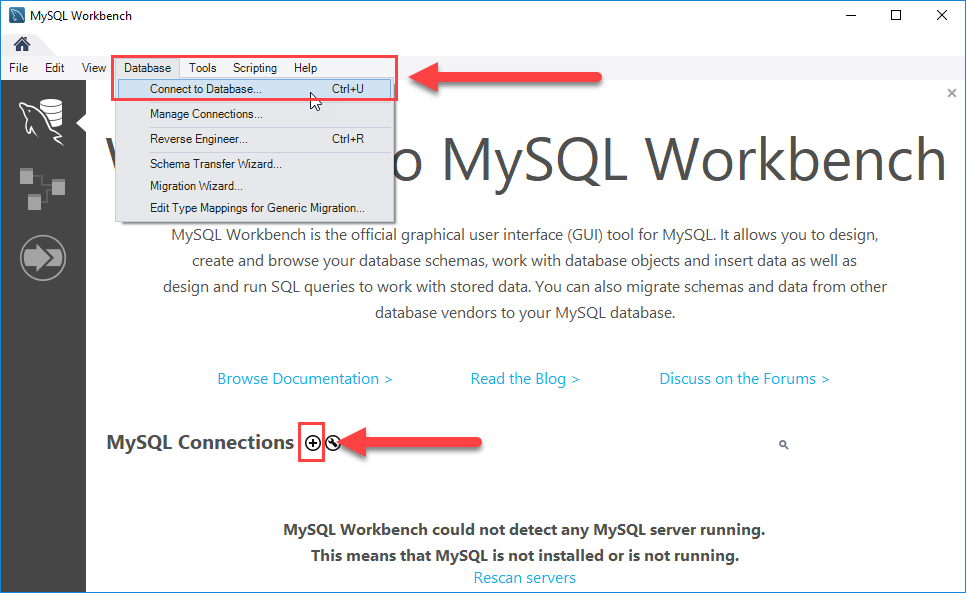

You can connect to a MySQL Server using the Database \> Connect to
Database… menu or click the + button that locates next to the MySQL
Connections.

Just click the + button in next to the MySQL Connections to continue.

Step 2. Enter the connection name e.g., Localhost. You can name it
whatever makes sense to you. By default, the username is `root`. If you
use a different user account, you can change it in the Username textbox.

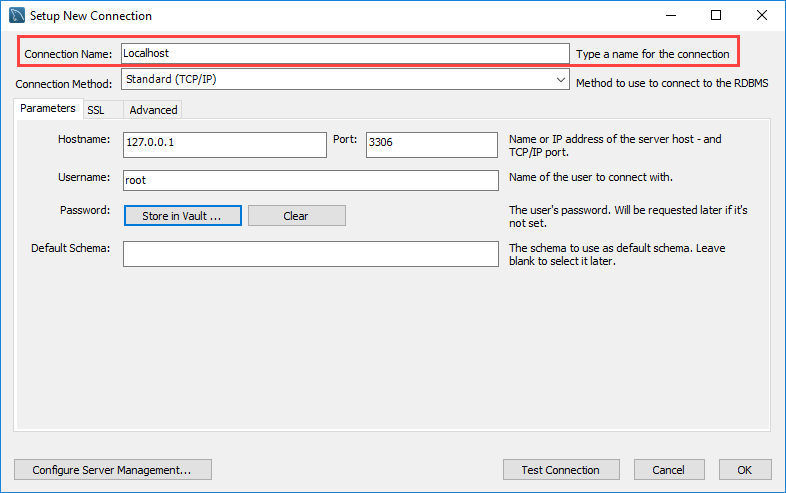

Step 3. Click the `Store in Vault ...` button to enter the password for
the provided user account. A window will display. You enter the password
and click the OK button.

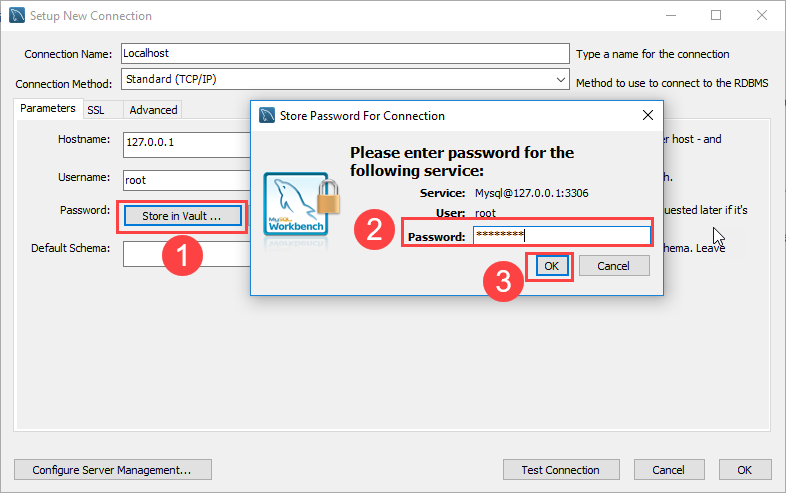

Step 4. Click the Test Connection button to test if the connection to
the MySQL Server is successful or not. Then click the OK button if the
connection is established successfully.

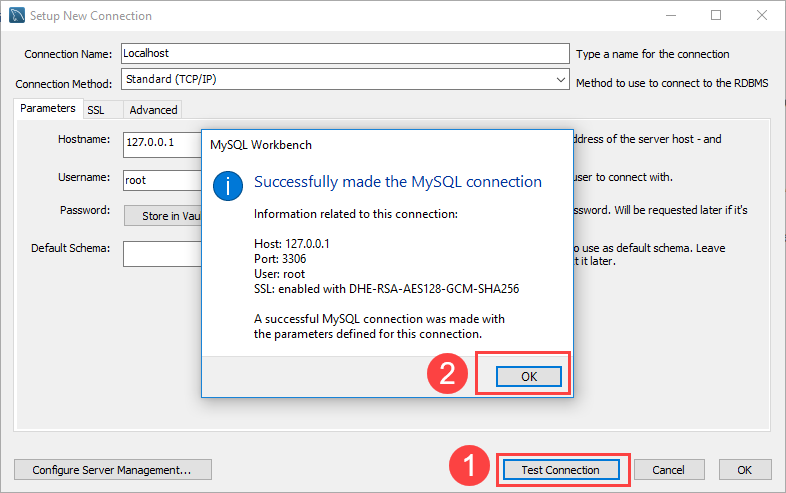

Step 5. Click the OK button to save the connection.

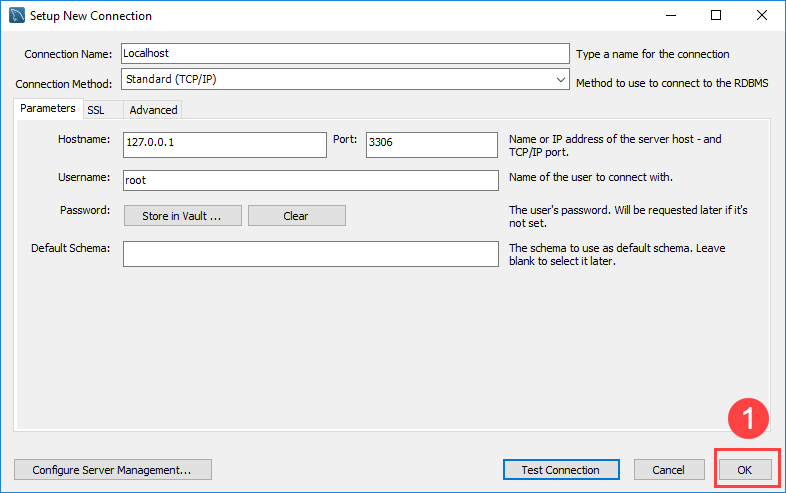

Step 6. Click the newly created connection under MySQL Connections to
connect to the MySQL Server:

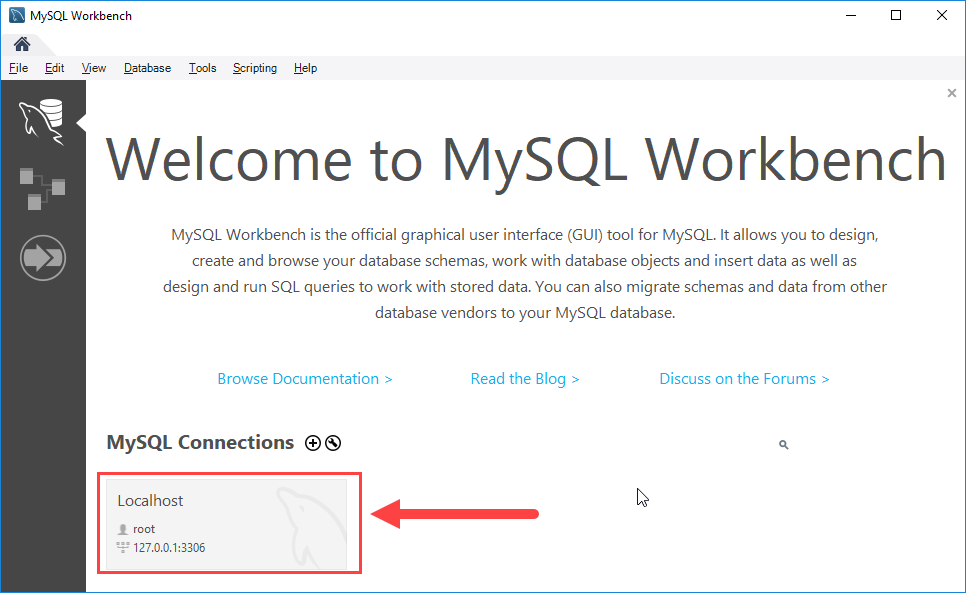

Step 7. MySQL Workbench display with the current schemas and a pane for
entering queries:

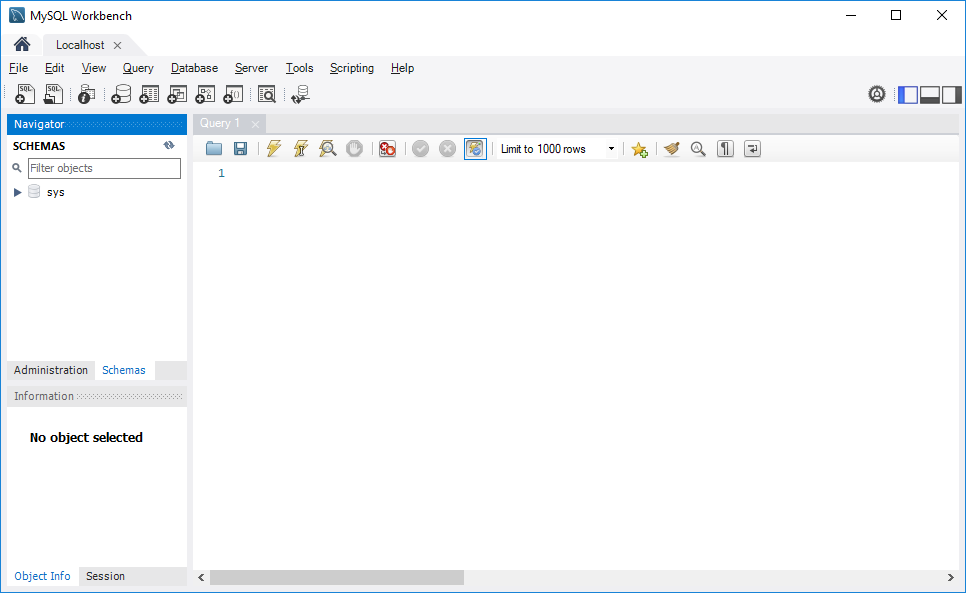

## Load Data to MySQL

The `LOAD DATA INFILE` allows us to read data from a text file and
import the data into an existing table. This operation has very good
performance.

Before importing the file, you need to prepare the following:

-   A table

<!-- -->

-   A CSV file(should match the table)

<!-- -->

-   User account, which connects to the MySQL database server, has FILE
    and INSERT privileges.

### Example \#1 - Upload from the secure_file_priv location

Turns out that we can only upload files to MySQL from a known and
secured location. That location is stored in the variable:
secure_file_priv.

Lets check where that location is:

``` code
SHOW VARIABLES LIKE "secure_file_priv";


Variable_name       Value
secure_file_priv    C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\
```

-   So MySQL will allow uploads only for files that are stored at:
    C:\\ProgramData\\MySQL\\MySQL Server 8.0\\Uploads\\. Lets load some
    files.

<!-- -->

-   First create a table:

``` code
CREATE TABLE discounts (
    id INT NOT NULL AUTO_INCREMENT,
    title VARCHAR(255) NOT NULL,
    expired_date DATE NOT NULL,
    amount DECIMAL(10 , 2 ) NULL,
    PRIMARY KEY (id)
);
```

-   Grab a text/csv file. Ill create this file:

``` code
id, title, expired date, amount
1, "Spring Break", 20140401, 20
2, "Back to School", 20140901, 25
3, "Summer", 20140825, 10
```

And store it in C:\\ProgramData\\MySQL\\MySQL Server
8.0\\Uploads\\test.csv

-   Lets load the file to the table:

``` code
LOAD DATA INFILE "C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\test.txt"
INTO TABLE discounts 
FIELDS TERMINATED BY ',' 
ENCLOSED BY '"'
LINES TERMINATED BY '\n'
IGNORE 1 ROWS;
```

### Example \#2 - upload from anywhere using load data local

-   We should use the data import wizard for small sets of data, but for
    large sets this method is extremely slow.

<!-- -->

-   For large sets of data we should load the data
    [inline](https://dev.mysql.com/doc/refman/8.0/en/load-data.html).

<!-- -->

-   Basic Syntax for Loading inline:

``` code
LOAD DATA LOCAL INFILE 'data.txt' INTO TABLE db2.my_table FIELDS TERMINATED BY ',';
```

-   Furthermore, we should first create the table using the regualr
    create table method, and then populate the table using the load
    inline:

<!-- -->

-   Example \#1 - First we create the table, then loading fake_users.csv
    from the location /var/lib/data and into the table

``` code
create database updates;
use updates;
drop table if exists user;
CREATE TABLE user (
    user_id int,
    name varchar(100),
    is_active boolean,
    st varchar(100),
    country varchar(100),
    PRIMARY KEY (user_id)
);
```

``` code
SET GLOBAL local_infile=1;
LOAD DATA LOCAL INFILE '/var/lib/data/fake_users.csv' INTO TABLE users FIELDS TERMINATED BY ',';
```

## Export Data from MySQL

Before exporting data, you must ensure that:

-   The MySQL server’s process has the write access to the target folder
    that contains the target CSV file.

<!-- -->

-   The target CSV file must not exist.

<!-- -->

-   MySQL allows for safe export only into files under the variable:
    secure_file_priv

<!-- -->

-   First check the location for secure files, in my case, in windows
    its C:/ProgramData/MySQL/MySQL Server 8.0/Uploads

``` code
SHOW VARIABLES LIKE "secure_file_priv";

select 'str'
union
SELECT str
FROM nums
INTO OUTFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/unique_in_order.csv'
fields terminated by ','
enclosed by '"'
lines terminated by '\n';
```

### Export Data

``` code
SELECT 
    orderNumber, status, orderDate, requiredDate, comments
FROM
    orders
WHERE
    status = 'Cancelled' 
INTO OUTFILE 'C:/tmp/cancelled_orders.csv' 
FIELDS ENCLOSED BY '"' 
TERMINATED BY ';' 
ESCAPED BY '"' 
LINES TERMINATED BY '\r\n';
```

### Export Data with Headers

``` code
(SELECT 'Order Number','Order Date','Status')
UNION 
(SELECT orderNumber,orderDate, status
FROM orders
INTO OUTFILE 'C:/tmp/orders.csv'
FIELDS ENCLOSED BY '"' TERMINATED BY ';' ESCAPED BY '"'
LINES TERMINATED BY '\r\n');
```

### Export Data to a filename with timestamp

``` code
SET @TS = DATE_FORMAT(NOW(),'_%Y_%m_%d_%H_%i_%s');

SET @FOLDER = 'c:/tmp/';
SET @PREFIX = 'orders';
SET @EXT    = '.csv';

SET @CMD = CONCAT("SELECT * FROM orders INTO OUTFILE '",@FOLDER,@PREFIX,@TS,@EXT,
                   "' FIELDS ENCLOSED BY '\"' TERMINATED BY ';' ESCAPED BY '\"'",
                   "  LINES TERMINATED BY '\r\n';");

PREPARE statement FROM @CMD;

EXECUTE statement;
```

## **MySQL Triggers**

In MySQL, a trigger is a stored program invoked automatically in
response to an event such as
[insert](https://www.mysqltutorial.org/mysql-insert-statement.aspx),
[update](https://www.mysqltutorial.org/mysql-update-data.aspx), or
[delete](https://www.mysqltutorial.org/mysql-delete-statement.aspx) that
occurs in the associated table. For example, you can define a trigger
that is invoked automatically before a new row is inserted into a table.

MySQL supports two types of triggers: row-level triggers and
statement-level triggers.

-   row-level - trigger is activated for each row that is inserted,
    updated or deleted.

<!-- -->

-   statement-level - trigger is activated once for each transaction
    regardless of how many rows were inserted, updated or deleted.

### Managing MySQL triggers

-   [Create
    triggers](https://www.mysqltutorial.org/create-the-first-trigger-in-mysql.aspx)
    – describe steps of how to create a trigger in MySQL.

    -   syntax:

    ``` code
    CREATE TRIGGER trigger_name
    {BEFORE | AFTER} {INSERT | UPDATE| DELETE }
    ON table_name FOR EACH ROW
    trigger_body;
    ```

    -   Use the key words: `OLD `and `NEW` to refer to the old or new
        rows:

    <!-- -->

    -   The following table illustrates the availability of the `OLD`
        and `NEW` modifiers:

    |               |       |       |
    |---------------|-------|-------|
    | Trigger Event | `OLD` | `NEW` |
    | `INSERT`      | No    | Yes   |
    | `UPDATE`      | Yes   | Yes   |
    | `DELETE`      | Yes   | No    |

<!-- -->

-   [Create a BEFORE INSERT
    trigger](https://www.mysqltutorial.org/mysql-triggers/mysql-before-insert-trigger/)

    ``` code
    DELIMITER $$

    CREATE TRIGGER trigger_name
        BEFORE INSERT
        ON table_name FOR EACH ROW
    BEGIN
        -- statements
    END$$    

    DELIMITER ;
    ```

<!-- -->

-   [Create an AFTER INSERT
    trigger](https://www.mysqltutorial.org/mysql-triggers/mysql-after-insert-trigger/)

    ``` code
    DELIMITER $$

    CREATE TRIGGER trigger_name
        AFTER INSERT
        ON table_name FOR EACH ROW
    BEGIN
        -- statements
    END$$

    DELIMITER ;
    ```

<!-- -->

-   [Create a BEFORE UPDATE
    trigger](https://www.mysqltutorial.org/mysql-triggers/mysql-before-update-trigger/)

    ``` code
    DELIMITER $$

    CREATE TRIGGER trigger_name
        BEFORE UPDATE
        ON table_name FOR EACH ROW
    BEGIN
        -- statements
    END$$

    DELIMITER ;
    ```

<!-- -->

-   [Create an AFTER UPDATE
    trigger](https://www.mysqltutorial.org/mysql-triggers/mysql-after-update-trigger/)

    ``` code
    DELIMITER $$

    CREATE TRIGGER trigger_name
        AFTER UPDATE
        ON table_name FOR EACH ROW
    BEGIN
        -- statements
    END$$

    DELIMITER ;
    ```

<!-- -->

-   [Create a BEFORE DELETE
    trigger](https://www.mysqltutorial.org/mysql-triggers/mysql-before-delete-trigger/)

    ``` code
    DELIMITER $$

    CREATE TRIGGER trigger_name
        BEFORE DELETE
        ON table_name FOR EACH ROW
    BEGIN
        -- statements
    END$$

    DELIMITER ;
    ```

<!-- -->

-   [Create an AFTER DELETE
    trigger](https://www.mysqltutorial.org/mysql-triggers/mysql-after-delete-trigger/)

    ``` code
    DELIMITER $$

    CREATE TRIGGER trigger_name
        AFTER DELETE
        ON table_name FOR EACH ROW
    BEGIN
        -- statements
    END$$

    DELIMITER ;
    ```

<!-- -->

-   [Create multiple triggers for a table that have the same trigger
    event and
    time](https://www.mysqltutorial.org/mysql-triggers/create-multiple-triggers-for-the-same-trigger-event-and-action-time/)
    –

    ``` code
    DELIMITER $$

    CREATE TRIGGER trigger_name
    {BEFORE|AFTER}{INSERT|UPDATE|DELETE} 
    ON table_name FOR EACH ROW 
    {FOLLOWS|PRECEDES} existing_trigger_name
    BEGIN
        -- statements
    END$$

    DELIMITER ;
    ```

    For example - This trigger will be activated before an update on the
    products table and after a trigger called before_products_update is
    activated.

    ``` code
    DELIMITER $$

    CREATE TRIGGER before_products_update_log_user
       BEFORE UPDATE ON products 
       FOR EACH ROW 
       FOLLOWS before_products_update
    BEGIN
        IF OLD.msrp <> NEW.msrp THEN
        INSERT INTO 
                UserChangeLogs(productCode,updatedBy)
            VALUES
                (OLD.productCode,USER());
        END IF;
    END$$

    DELIMITER ;
    ```

<!-- -->

-   **Create a trigger that calls a stored procedure**

    ``` code
    DELIMITER $$

    CREATE TRIGGER before_accounts_update
    BEFORE UPDATE
    ON accounts FOR EACH ROW
    BEGIN
        CALL CheckWithdrawal (
            OLD.accountId, 
            OLD.amount - NEW.amount
        );
    END$$

    DELIMITER ;
    ```

## **MySQL Views**

### Create views

``` code
CREATE VIEW salePerOrder AS
    SELECT 
        orderNumber, 
        SUM(quantityOrdered * priceEach) total
    FROM
        orderDetails
    GROUP by orderNumber
    ORDER BY total DESC;
```

### Algorithms

-   Views have an optional argument for choosing the algorithms

<!-- -->

-   The options are:

<!-- -->

-   `MERGE`, `TEMPTABLE`, and `UNDEFINED`.

<span style="border-bottom:0.05em solid">**Merge**</span>

When you query from a `MERGE` view, MySQL processes the following steps:

-   First, merge the input query with the
    [`SELECT`](http://www.www.mysqltutorial.org/mysql-select-statement-query-data.aspx)
    statement in the view definition into a single query.

<!-- -->

-   Then, execute the combined query to return the result set.

``` code
CREATE ALGORITHM=MERGE VIEW contactPersons(
    customerName, 
    firstName, 
    lastName, 
    phone
) AS
SELECT 
    customerName, 
    contactFirstName, 
    contactLastName, 
    phone
FROM customers;
```

<span style="border-bottom:0.05em solid">**TEMPTABLE**</span>

When you issue a query to a `TEMPTABLE` view, MySQL performs these
steps:

-   First, [create a temporary
    table](https://www.mysqltutorial.org/mysql-temporary-table/) to
    store the result of the `SELECT` in the view definition.

<!-- -->

-   Then, execute the input query against the temporary table.

``` code
CREATE ALGORITHM=TEMPTABLE VIEW contactPersons(
    customerName, 
    firstName, 
    lastName, 
    phone
) AS
SELECT 
    customerName, 
    contactFirstName, 
    contactLastName, 
    phone
FROM customers;
```

<span style="border-bottom:0.05em solid">**UNDEFINED**</span>

The `UNDEFINED` is the default algorithm when you create a view without
specifying the `ALGORITHM` clause or you explicitly specify
`ALGORITHM=UNDEFINED`.

### WITH CHECK OPTION

Adding the WITH CHECK OPTION to views will tell MySQL to make sure that
the view is consistent.

For example this view shows all the employees with a job title with a
pattern of VP.

When we add WITH CHECK OPTION to the view, MySQL will not let any
employee that doesnt meet these requirements to enter the view.

``` code
CREATE OR REPLACE VIEW vps AS
    SELECT 
        employeeNumber,
        lastName,
        firstName,
        jobTitle,
        extension,
        email,
        officeCode,
        reportsTo
    FROM
        employees
    WHERE
        jobTitle LIKE '%VP%' 
WITH CHECK OPTION;

-- Inserting a records to the view
INSERT INTO vps(employeeNumber,firstname,lastname,jobtitle,extension,email,officeCode,reportsTo)
VALUES(1704,'John','Smith','IT Staff','x9112','johnsmith@classicmodelcars.com',1,1703);
```

If ill insert an IT Staff employee:

``` code
INSERT INTO vps(employeeNumber,firstname,lastname,jobtitle,extension,email,officeCode,reportsTo)
VALUES(1704,'John','Smith','IT Staff','x9112','johnsmith@classicmodelcars.com',1,1703);
```

Ill get this error:

``` code
Error Code: 1369. CHECK OPTION failed 'classicmodels.vps'
```

However, i can insert an SVP employee

``` code
INSERT INTO vps(employeeNumber,firstname,lastname,jobtitle,extension,email,officeCode,reportsTo)
VALUES(1704,'John','Smith','SVP Marketing','x9112','johnsmith@classicmodelcars.com',1,1076);
```

### WITH LOCAL/CASCADED CHECK OPTION

-   [`LOCAL & CASCADED`](https://www.mysqltutorial.org/mysql-view-local-cascaded-in-with-check-option)

<!-- -->

-   Cascaded is the default view

Notes:

-   Views in MySQL are query-able and write-able. So we can query from
    them, and run update, insert and delete actions on them.




## **MySQL Index**

Index is a great way to make searching faster.

An index is a data structure such as B-Tree that improves the speed of
data retrieval on a table at the cost of additional writes and storage
to maintain it.

Lets use the phone book analogy. When we search for a specific name in
the phone book we don't just go over each and every one of the names in
there because that is not efficient.

Instead, we order the names beforehand, and use that knowledge to make
the searching faster.

If a name start’s with ‘s’ we will instantly know to jump to a bit after
the half of the book.

So using this analogy, lets say that im running this query:

``` code
SELECT
    phone_number
FROM 
    phonebooks
WHERE 
    first_name = 'Bar';
```

The query will be pretty fast, but still, MySQL had to search all of the
first names one by one, until it reached the name ‘Bar’.

If i were to create an index on the first_name:

``` code
CREATE INDEX first_names ON phonebooks(first_name )
```

Then MySQL will use this ordered data structure to search for Bar
faster.

The default index type is B-Tree.

### **Prefix Index**

In case the column we wish to index is a string, the index will consume
a lot of disk space and potentially slow down `insert `operations.

To address this issue, we can index only the first few letters of the
string column to lower the overhead of updating and maintating this
complicated index.

-   Syntax:

``` code
CREATE TABLE table_name(
    column_list,
    INDEX(column_name(length))
);
```

-   Example

Lets run this query:

``` code
SELECT 
    productName, 
    buyPrice, 
    msrp
FROM
    products
WHERE
    productName LIKE '1970%';
```

Right now, the product table doesnt have index on the productName so
MySQL has to search every row in the column to find those that begin
with 1970:

``` code
explain
SELECT 
    productName, 
    buyPrice, 
    msrp
FROM
    products
WHERE
    productName LIKE '1970%';
```

<span class="image"></span>

So we wish to add in index to the productName, but, we know that it is
of size 70. We dont want to index all of it as it would cause a lot of
overhead.

Instead lets index it using an index prefix. The only question is, how
do we choose the size?

To do this, we need to investigate the data a little bit, we need to
maximize the uniqueness of the values in the column while minimizing the
size of the index.

So this index: `create index productName on productName(70)` is the
absolute maximum of uniqueness, the first 70 characters will have the
most distinct values.

But, the size of the index is also at the absolute maximum, so doing
this will lose the purpose of a prefix index.

Instead, what about this index:
`create index productName on productName(1)`. This index will extremely
easy to maintain and will not cause any overhead, this has the absolute
minimum size of an index.

But, it also has the absolute minimum uniqueness, the first 1 characters
will not have a lot of unique values.

So the idea is to find the optimum point. use this guideline:

-   Step 1 - Find the number of rows in the table:

``` code
SELECT
   COUNT(*)
FROM
   products;
```

So the maximum of unique rows we can achieve is 110.

-   Step 2 - Play with the size of the index, start with low numbers and
    work your way up, try to maximize the number of unique_rows without
    increasing the size of the index too much.

``` code
-- Starting with 5
SELECT
   COUNT(DISTINCT LEFT(productName, 5)) unique_rows
FROM
   products;
```

|     |             |
|-----|-------------|
|     | unique_rows |
|     | 70          |

Looks like there are 70 unique rows when using index of size 5. Knowing
that the maximum is 110, lets see how many characters are needed to
achieve that:

``` code
SELECT
   COUNT(DISTINCT LEFT(productName, 10)) unique_rows
FROM
   products;

-- Output 
102

SELECT
   COUNT(DISTINCT LEFT(productName, 20)) unique_rows
FROM
   products;

-- Output 
110
```

So the first 20 chars have the same uniqueness as indexing the entire
column. That’s great, we should use a value around 20 to enjoy both a
lightweight index that doesn't take a lot to maintain, and an index on a
frequently used column that will make my queries a lot faster.

### **USE INDEX hint**

We can hint MySQL and tell it to use an index on a certain table.

Usually, the query optimizer creates a query plan and chooses the best
and optimal way to retrieve the data. His main parameter for choosing
which index and on which column is the cardinality of the column.

The cardinality, however, may be not accurate for example in case the
table has been modified heavily with many inserts or deletes.

To solve this issue, you should run the `ANALYZE TABLE` statement
periodically to update the cardinality.

Other than that, we can recommend the indexes that the query optimizer
should use by using `use index`

-   Syntax:

``` code
SELECT select_list
FROM table_name USE INDEX(index_list)
WHERE condition;
```

-   Example:

``` code
drop index contactFirstName on customers;
drop index contactLastName on customers;

-- Creating 2 indexes: on FirstName and on (FirstName, LastName)
create index contactFirstName on customers(contactFirstName);
create index contactFirstAndLastName on customers(contactFirstName, contactLastName);


EXPLAIN 
SELECT *
FROM
    customers
WHERE
    contactFirstName LIKE 'A%'
        OR contactLastName LIKE 'A%';
        
```

<span class="image"></span>

As we can see(in the possible_keys column), MySQL automatically knows to
utilize the index (FirstName, LastName)

Lets say that I want him to only use the first index which is:
FirstName. Ill hint it to use that index:

``` code
EXPLAIN 
SELECT *
FROM
    customers
use index(contactFirstName)
WHERE
    contactFirstName LIKE 'A%'
        OR contactLastName LIKE 'A%';
```

### FORCE **INDEX**

Instead of simply hinting or suggesting to MySQL that he should use a
certain index, we can force it to use one.

``` code
EXPLAIN 
SELECT *
FROM
    customers
force index(contactFirstName)
WHERE
    contactFirstName LIKE 'A%'
        OR contactLastName LIKE 'A%';
```

### **FULLTEXT index**

``` code
CREATE FULLTEXT INDEX address
ON offices(addressLine1,addressLine2)
```

Notes:

-   We can make index ascending or descending

<!-- -->

-   We can make them invisible so that MySQL will ignore them.

<!-- -->

-   We can make composite indexes, which are indexes from multiple
    columns.



## **MySQL Full-Text Search**

MySQL supports Full text indexes for columns of type: `char, varchar`
and `text`.

The idea is that commands like: `like` are ok to work with usualy but
they are not complex systems that have many features and allow
flexibility to the userss.

By creating a full text index on a column we actually do get these
thing.

### **FULLTEXT index**

First create the index on the column you wish to query using full text
search:

``` code
create fulltext index productLine_index on products(productLine);
```

### MATCH and AGAINST

``` code
-- Find all appearances of "Classic" in the column productLine
SELECT 
    productName, 
    productLine 
FROM products 
WHERE 
    MATCH(productLine) 
    AGAINST('Classic');
```

<span class="image"></span>

``` code
-- Find all appearances of "Classic" OR "Vintage" in the column productLine
SELECT 
    productName, 
    productLine 
FROM products 
WHERE 
    MATCH(productLine) 
    AGAINST('Classic, Vintage');
```

<span class="image"></span>

The `againt` command uses the option `IN NATURAL LANGUAGE MODE` by
default. We can use `IN BOOLEAN MODE`for [Boolean text
searches](https://www.mysqltutorial.org/mysql-boolean-text-searches.aspx)

``` code
-- Find all appearances of "Truck" in the column productName
SELECT productName, productline
FROM products
WHERE MATCH(productName) 
      AGAINST('Truck' IN BOOLEAN MODE )
```

WE can also include operators to make the search more flexible:

``` code
-- Find appearances containing "Truck" but not "Pickup" in the column productName
SELECT productName, productline
FROM products
WHERE MATCH(productName) AGAINST('Truck -Pickup' IN BOOLEAN MODE )
```

The following table illustrates the full-text search Boolean operators
and their meanings:

|          |                                                                                                                       |
|----------|-----------------------------------------------------------------------------------------------------------------------|
| Operator | Description                                                                                                           |
| \+       | Include, the word must be present.                                                                                    |
| –        | Exclude, the word must not be present.                                                                                |
| \>       | Include, and increase ranking value.                                                                                  |
| \<       | Include, and decrease the ranking value.                                                                              |
| ()       | Group words into subexpressions (allowing them to be included, excluded, ranked, and so forth as a group).            |
| \~       | Negate a word’s ranking value.                                                                                        |
| \*       | Wildcard at the end of the word.                                                                                      |
| “”       | Defines a phrase (as opposed to a list of individual words, the entire phrase is matched for inclusion or exclusion). |

The following examples illustrate how to use boolean full-text operators
in the search query:

To search for rows that contain <span class="mark highlight-red">**at
least one of the two words: mysql or tutorial**</span>

``` code
‘mysql tutorial’
```

To search for rows that contain <span class="mark highlight-red">**both
words: mysql and tutorial**</span>

``` code
‘+mysql +tutorial’
```

To search for rows that <span class="mark highlight-red">**contain the
word “mysql”**</span>, but <span class="mark highlight-red">**put the
higher rank for the rows that contain “tutorial”**</span>:

``` code
‘+mysql tutorial’
```

To search for rows that <span class="mark highlight-red">**contain the
word “mysql” but not “tutorial”**</span>

``` code
‘+mysql -tutorial’
```

To search for rows that <span class="mark highlight-red">**contain the
word “mysql”**</span> and <span class="mark highlight-red">**rank the
row lower if it contains the word “tutorial”.**</span>

``` code
‘+mysql ~tutorial’
```

To search for rows that <span class="mark highlight-red">**contain the
words “mysql” and “tutorial”, or “mysql” and “training”**</span> in
whatever order, but <span class="mark highlight-red">**put the rows that
contain “mysql tutorial” higher than “mysql training”**</span>.

``` code
‘+mysql +(>tutorial <training)’
```

To find rows that contain <span class="mark highlight-red">**words
starting with “my” such as “mysql”, “mydatabase”, etc**</span>., you use
the following:

``` code
‘my*’
```



# **MySQL JDBC Tutorial**

Java JDBC API provides a standard interface to interact with relational
databases. We will learn how to interact with MySQL using JDBC.

<span class="image"></span>



## **Introducing to JDBC**

JDBC API consists of the following main components:

1.  JDBC Driver

<!-- -->

1.  Connection

<!-- -->

1.  Statement

<!-- -->

1.  ResultSet

### **JDBC Driver**

The JDBC Driver is a set of Java classes that implement JDBC interfaces
for interacting with specific databases.

Almost all database vendors such as MySQL, Oracle, Microsoft SQL Server,
provide JDBC drivers.

There are three types of JDBC drivers including JDBC-native API Driver,
JDBC-net Driver, and JDBC Driver.

<span style="border-bottom:0.05em solid">**More on JDBC Drivers**</span>

<figure>
<img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/b37ac89616b9e4c01a35991af59fe6b63e41a48e.ico" class="icon bookmark-icon" />
</figure>

JDBC Driver is written in pure Java. It translates JDBC calls into MySQL
calls and sends them to the database.

To use a JDBC driver, you need to include the driver JAR file in the
application. For MySQL the JDBC driver is: MySQL Connector/J

### **Connection**

The most important component of JDBC is the Connection object.

In Java applications, we first load a JDBC driver and then establish a
connection to the database. Using the connection object we can interact
with the database, create statements to query in SQL and open multiple
connection to one database.

### Statement

To execute SQL queries we use a Statements object. We create the
Statement object through the Connection object. There are several types
of Statement objects like: `PreparedStatement`, `CallableStatement`

### **ResultSet**

After querying data from the database, you get a `ResultSet` object. The
`ResultSet` object provides a set of API that allows you to traverse
result of the query.

The typical flow of using JDBC is as follows:

1.  First, load the JDBC driver and create a connection to the database.

<!-- -->

1.  Then, create a `Statement` and [execute the query to get a
    ResultSet](https://www.mysqltutorial.org/querying-data-from-mysql-using-jdbc/).

<!-- -->

1.  Next, traverse and process the `ResultSet` .

<!-- -->

1.  Close the `ResultSet` , `Statement` , and `Connection` .




## **Setting Up MySQL JDBC Development Environment**

To set up the development environment, you need to:

1.  Download and install JDK if it is not available on your local
    machine. We will use `Java JDK 8u45`.

<!-- -->

1.  Download and install `NetBeans IDE`. You can use any Java IDE such
    as Eclipse or IntelliJ, which is also fine. We choose NetBeans IDE
    because it’s easy to install and simple to use. We will use NetBeans
    IDE version 8.0.2. Oracle provides also provide use NetBeans IDE and
    JDK in one installation file, so you just need to download one and
    install both JDK and NetBeans.

<!-- -->

1.  Download and install `MySQL Connector/J`.

Follow the steps here to install these three:

<figure>
<img src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/f477aee878bb18425f8e1770f0536b1efbf06d4d.png" class="icon bookmark-icon" />
</figure>

1.  Download the connecter j.zip file from here:
    <https://downloads.mysql.com/archives/c-j/>
    -   I chose platform independent file because MySQL dont have a
        windows specific version for version 8.0.29

    <!-- -->

    -   Download the sample database in the tutorial

<!-- -->

1.  To connect to MySQL database from a Java program, you need to do the
    following steps:
    1.  Load the MySQL Connector/J into your program.
        1.  Launch NetBeans IDE

    <!-- -->

    1.  Create a new Connection object from the `DriverManager` class.
        Then you can use this Connection object to execute queries.



# **MySQL Python Tutorial**

Looks like there are a few options to how to connect to MySQL, the main
three are:

1.  [`mysqlclient`](https://github.com/PyMySQL/mysqlclient-python)- By
    far the fastest MySQL connector for CPython. Requires the
    `mysql-connector-c` C library to work.
    1.  This one is very difficult to implement in Windows, but should
        be the fastest. I’m not using it for now.

<!-- -->

1.  [`mysql-connector-python`](https://github.com/mysql/mysql-connector-python) -
    MySQL connector developed by the MySQL group at Oracle, also written
    entirely in Python. It's performance appears to be the worst out of
    the three.

<!-- -->

1.  [`PyMySQL`](https://github.com/PyMySQL/PyMySQL)- Pure Python MySQL
    client.(Im using this one)

## **Introduction to MySQL Python connector**

To access a database from other applications we need a database driver.
For connections using Python, MySQL has the MySQL Connector/Python.

<span class="image"></span>

## Connecting to MySQL

``` code
pip install config-parser

pip install pymysql
```

``` code
import configparser
import pymysql

parser = configparser.ConfigParser()
parser.read('pipeline.conf')

# Grabing the values from the config file
hostname = parser.get("mysql_config", "hostname")
port = parser.get("mysql_config", "port")
username = parser.get("mysql_config", "username")
dbname = parser.get("mysql_config", "database")
password = parser.get("mysql_config", "password")



def connect():

    """ Connect to MySQL database """
    conn = None

    try:
        conn = pymysql.connect(host=hostname,
        user=username,
        password=password,
        db=dbname,
        port=int(port))

        print('Connected to MySQL database')

    except Exception as e:
        print(e)

    finally:
        if conn is not None:
            conn.close()


if __name__ == '__main__':
    connect()
```

### Connecting to MySQL

``` code
python connecting_to_mysql.py 

-- Output
Connected to MySQL database
```

## Select, Insert, Update, Delete, Call Procedure

For the rest of the tutorial, check my GitHub repository:

<https://github.com/bardadon/Python-MySQL>



# **MySQL Administration**

## Metadata

### Databases

``` code
use information_schema;
show tables;


use mysql;
show tables;


use performance_schema;
show tables;
```

-   `information_schema` - Provides access to database metadata,
    information about MySQL server, data types, access privileges, etc..

<figure>
<embed src="attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/5c1946177ed7bb66da11f580bb557d8e91555007.shtml" class="icon bookmark-icon" />
</figure>

-   `mysql` - The system schema. Contains tables that store information
    **required by the MySQL server as it runs**

<!-- -->

-   `performance_schema` - The MySQL Performance Schema is a feature for
    monitoring MySQL Server execution at a low level.

### Tables & Columns

``` code
select table_name
from information_schema.tables
where table_schema = 'playground';

select column_name, data_type, ordinal_position
from information_schema.columns
where table_schema = 'public' and table_name = 'emp';
```



## **Section 1. Start, Stop, and Restart MySQL Server**

Start Service on Linux:

``` code
sudo service mysql start

or 

sudo systemctl start mysqld

or 

sudo /etc/init.d/mysql start
```

Stop Service on Linux:

``` code
service mysqld stop

or 

sudo systemctl stop mysqld

or 

/etc/init.d/mysql stop
```

Start Service on Windows:

``` code
-- Go to the bin folder where MySQL is installed and run mysqld:

cd C:\Program Files\MySQL\MySQL Server 8.0\bin\
mysql
```

Stop Service on Windows:

``` code
mysqladmin -u root -p shutdown
Enter password: ********
```



## **Section 2. Users, Roles, and Privileges**

### Create User

-   Syntax:

``` code
CREATE USER [IF NOT EXISTS] account_name
IDENTIFIED BY 'password';
```

-   account_name = `username@hostname`

<!-- -->

-   The host name is optional, an account_name with a host is written
    like this: `username@%`

<!-- -->

-   Example:

``` code
mysql> create user testUser@localhost identified by '1234';
```

Now ill Exit the server and connect again using this new user.

``` code
C:\Program Files\MySQL\MySQL Server 8.0\bin>mysql -u testUser -p

-- Checking the current user:

mysql> select current_user();

+--------------------+
| current_user()     |
+--------------------+
| testUser@localhost |
+--------------------+
1 row in set (0.00 sec)
```

To verify this we can query the table mysql.user that contain info on
all users. Currently, the user testUser doesnt have access to anything,
so he wont be able to query that table, ill switch to the root user:

``` code
-- Connecting as Root
C:\Program Files\MySQL\MySQL Server 8.0\bin>mysql -u Bar -p

-- Checking Current User
mysql> select current_user();
+----------------+
| current_user() |
+----------------+
| Bar@%          |
+----------------+
1 row in set (0.00 sec)


-- Checking all users
mysql> select user from mysql.user;
+------------------+
| user             |
+------------------+
| Bar              |
| mysql.infoschema |
| mysql.session    |
| mysql.sys        |
| root             |
| testUser         |
+------------------+
6 rows in set (0.00 sec)
```

As we can see, testUser is in there. Lets give him some permissions.

``` code
-- As Root, switching to database called test
mysql> use test
Database changed


-- Creating a new table
mysql> create table table_for_testUser(
    -> id int primary key auto_increment,
    -> name varchar(20) not null);
Query OK, 0 rows affected (0.03 sec)


-- Granting testUser all privileges on all tables in database test
mysql> grant all privileges on test.* to testUser@localhost;
Query OK, 0 rows affected (0.01 sec)


mysql> exit;
Bye
```

``` code
-- Now that the user has permissions, Connecting with testUser
C:\Program Files\MySQL\MySQL Server 8.0\bin>mysql -u testUser -p

Enter password: ****
Welcome to the MySQL monitor.  Commands end with ; or \g.
Your MySQL connection id is 339
Server version: 8.0.29 MySQL Community Server - GPL

Copyright (c) 2000, 2022, Oracle and/or its affiliates.

Oracle is a registered trademark of Oracle Corporation and/or its
affiliates. Other names may be trademarks of their respective
owners.

Type 'help;' or '\h' for help. Type '\c' to clear the current input statement.


-- Switching to test database
mysql> use test;
Database changed


-- Querying from the table
mysql> select * from table_for_testUser;
Empty set (0.00 sec)
```

Great, so now we have a new user called testUser and he has permissions
from the database test.


### **MySQL GRANT**

-   Syntax:

``` code
GRANT privilege [,privilege],.. 
ON privilege_level 
TO account_name;
```

-   Example:

``` code
# Example #1
GRANT SELECT
ON employees
TO bob@localhost;

# Example #2
GRANT INSERT, UPDATE, DELETE
ON employees 
TO bob@localhost;

# Example #3
grant all privileges 
on test.* 
to testUser@localhost;
```

MySQL supports the following main privilege levels:

![](attachment:vertopal_abf8a2f95ec040a494cfa9088295e9ac/854350ae415f945bc67b52a9aa9718d5a75a2bea.png)

### **Global privileges** (\*.\*)

apply to all databases in a MySQL Server. To assign global privileges,
you use the `*.*` syntax, for example:

``` code
GRANT SELECT
ON *.*
TO bob@localhost;
```

The account user `bob@localhost` can query data from all tables in all
database of the current MySQL Server.

### **Database privileges** (Database.\*)

apply to all objects in a database. To assign database-level privileges,
you use the ON `database_name.*` syntax, for example:

``` code
GRANT INSERT
ON classicmodels.*
TO bob@localhost;
```

In this example, `bob@localhost` can insert data into all tables in the
`classicmodels` database.

### **Table privileges** (Database.Table)

apply to all columns in a table. To assign table-level privileges, you
use the `ON database_name.table_name` syntax, for example:

``` code
GRANT DELETE
ON classicmodels.employees
TO bob@localhsot;
```

In this example, `bob@localhost` can delete rows from the table
`employees` in the database `classicmodels`.

If you skip the database name, MySQL uses the default database or issues
an error if there is no default database.

### **Column privileges**

apply to single columns in a table.  You must specify the column or
columns for each privilege, for example:

``` code
GRANT
   SELECT (employeeNumner,lastName, firstName,email),
   UPDATE(lastName)
ON employees
TO bob@localhost;
```

In this example, `bob@localhost` can select data from four columns
`employeeNumber`, `lastName`, `firstName`, and `email` and update only
the `lastName` column in the `employees` table.

### **Stored routine privileges**

apply to stored procedures and stored functions, for example:

``` code
GRANT EXECUTE
ON PROCEDURE CheckCredit
TO bob@localhost;
```

In this example, `bob@localhost` can execute the stored procedure
`CheckCredit` in the current database.

### **Proxy user privileges**

allow one user to be a proxy for another. The proxy user gets all
privileges of the proxied user. For example:

``` code
GRANT PROXY
ON root
TO alice@localhost;
```

In this example, `alice@localhost` assumes all privileges of `root`

### PRIVILEGES List

The following table illustrates all permissible privileges that you can
use for the `GRANT` and
[`REVOKE`](https://www.mysqltutorial.org/mysql-revoke.aspx) statement:

<span class="image"></span>

### **MySQL REVOKE**

-   Syntax:

``` code
REVOKE
   privilegee [,privilege]..
ON [object_type] privilege_level
FROM user1 [, user2] ..;
```

-   Examples:

``` code
# Revoke all privileges
REVOKE 
    ALL [PRIVILEGES], 
    GRANT OPTION 
FROM user1 [, user2];

# Revoke Proxy privilege
REVOKE PROXY 
ON proxied_user 
FROM proxy_user1[,proxy_user1]...
```





In [ ]:
### **MySQL roles**

Typically we will have multiple users with the same privileges. To make
life easier, we can create roles with defined privileges, and grant them
to users.

If you want to grant the same set of privileges to multiple users, you
follow these steps:

-   First, create a new role.

<!-- -->

-   Second, grant privileges to the role.

<!-- -->

-   Third, grant the role to the users.

For example:

``` code
# Pre-requisites - Create a database, a table and some rows
create database crm;
use crm;

drop table if exists customers;
CREATE TABLE customers(
    id INT PRIMARY KEY AUTO_INCREMENT,
    first_name VARCHAR(255) NOT NULL, 
    last_name VARCHAR(255) NOT NULL, 
    phone VARCHAR(15) NOT NULL,
    email VARCHAR(255)
);

INSERT INTO customers(first_name,last_name,phone,email)
VALUES('John','Doe','(408)-987-7654','john.doe@mysqltutorial.org'),
      ('Lily','Bush','(408)-987-7985','lily.bush@mysqltutorial.org');
      
SELECT * FROM customers;      


----------------------------------------------------------------

-- Create three roles for developers, readers and writers
drop role if exists crm_dev, crm_read, crm_write;
CREATE ROLE crm_dev, crm_read, crm_write;

-- Grant all priviledges to developer role , read privs to readers and write to writers
grant all on crm.customers to crm_dev;
grant select on crm.customers to crm_read;
grant insert, update, delete on crm.customers to crm_write;

show grants for crm_dev;
show grants for crm_read;
show grants for crm_write;

 
-- Create four users, dev1, crm_read1, crm_write1, crm_write2
drop user if exists dev1@localhost, crm_read1@localhost, crm_write1@localhost, crm_write2@localhost;
-- developer user 
CREATE USER dev1@localhost IDENTIFIED BY '1';
-- read access user
CREATE USER crm_read1@localhost IDENTIFIED BY '2';    
-- read/write users
CREATE USER crm_write1@localhost IDENTIFIED BY '3';   
CREATE USER crm_write2@localhost IDENTIFIED BY '4';

-- Currently none of them have any permissions
show grants for dev1@localhost;
show grants for crm_read1@localhost;
show grants for crm_write1@localhost;
show grants for crm_write2@localhost;


-- Grant roles to each of the four users
grant crm_dev to dev1@localhost;
grant crm_read to crm_read1@localhost;
grant crm_write, crm_read to crm_write1@localhost;
grant crm_write, crm_read to crm_write2@localhost;


show grants for dev1@localhost;
show grants for crm_read1@localhost;
show grants for crm_write1@localhost;
show grants for crm_write2@localhost;
```

So now we have users and each one of them has a role with some
privilges. But we are actually not done yet. The roles of this users are
not activated yet. Lets test this, ill connect as the user: crm_read1
that has the role crm_read, which has select privs for crm.customers.

``` code
C:\Program Files\MySQL\MySQL Server 8.0\bin>mysql -u crm_read1 -p
Enter password: *


mysql> use crm;
ERROR 1044 (42000): Access denied for user 'crm_read1'@'localhost' to database 'crm'
```

As we can see, the user crm_read1 cant even use the database crm, let
alone query from it.

To specify which roles should be active each time a user account
connects to the database server, you use the `SET DEFAULT ROLE`
statement.

The following statement sets the default for the `crm_read1@localhost`
account all its assigned roles.

``` code
SET DEFAULT ROLE ALL TO crm_read1@localhost;
```

In other words, any time a users logs in, he is logging in using his
default role. RIght now, the new users do not have a default role.

So ill need to set the default role to each one of these users.

``` code
SET DEFAULT ROLE ALL TO crm_read1@localhost;
SET DEFAULT ROLE ALL TO crm_read2@localhost;
SET DEFAULT ROLE ALL TO crm_write1@localhost;
SET DEFAULT ROLE ALL TO crm_dev1@localhost;
```

Now lets try to query the table again using the user: crm_read1:

``` code
mysql> select * from customers;
+----+------------+-----------+----------------+-----------------------------+
| id | first_name | last_name | phone          | email                       |
+----+------------+-----------+----------------+-----------------------------+
|  1 | John       | Doe       | (408)-987-7654 | john.doe@mysqltutorial.org  |
|  2 | Lily       | Bush      | (408)-987-7985 | lily.bush@mysqltutorial.org |
+----+------------+-----------+----------------+-----------------------------+
2 rows in set (0.00 sec)
```



### Setting active roles

A user account can modify the current user’s effective privileges within
the current session by specifying which granted role are active.

The following statement set the active role to `NONE`, meaning no active
role.

``` code
SET ROLE NONE;
```

To set active roles to all granted role, you use:

``` code
SET ROLE ALL;
```

To set active roles to default roles that set by the `SET DEFAULT ROLE`
statement, you use:

``` code
SET ROLE DEFAULT;
```

To set active named roles, you use:

``` code
SET ROLE
    granted_role_1
    [,granted_role_2, ...]
```




### Change Password

MySQL provides various statements that you can use to change the
password of a user including
the [UPDATE](https://www.mysqltutorial.org/mysql-update-data.aspx) ,
`SET PASSWORD, `and `GRANT USAGE`statements.

### 1. **Change MySQL user password using UPDATE statement**

-   Changing the password at the user table and flushing privileges.

``` code
USE mysql;

UPDATE user 
SET authentication_string = PASSWORD('dolphin')
WHERE user = 'dbadmin' AND 
      host = 'localhost';

FLUSH PRIVILEGES;
```

### 2. **Change MySQL user password using the SET PASSWORD statement**

``` code
SET PASSWORD FOR 'dbadmin'@'localhost' = bigshark;
```

### 3. **Change MySQL user password using ALTER USER statement**

``` code
ALTER USER dbadmin@localhost IDENTIFIED BY 'littlewhale';
```


### MySQL Information about Users



### Show all users

``` code
-- Show all users
SELECT 
   user 
FROM 
   mysql.user;
```

<span class="image"></span>

### Show Current User

``` code
SELECT current_user();

+----------------+
| current_user() |
+----------------+
| local@localhost |
+----------------+
1 row in set (0.00 sec)
```

### **Show current logged users**

``` code
SELECT 
    user, 
    host, 
    db, 
    command 
FROM 
    information_schema.processlist;

+-------+-----------------+---------------+---------+
| user  | host            | db            | command |
+-------+-----------------+---------------+---------+
| local | localhost:50591 | classicmodels | Sleep   |
| root  | localhost:50557 | NULL          | Query   |
+-------+-----------------+---------------+---------+
2 rows in set (0.00 sec)
```



### **MySQL RENAME USER**

-   Syntax:

``` code
# Single user
RENAME USER old_user1 
TO new_user;

# Multiple users
RENAME USER 
    old_user1 TO new_user1,
    old_user2 TO new_user2,
    ...
```

### MySQL Lock/Unlock User Accounts

-   Syntax:

``` code
# Create a locked user
CREATE USER account_name
IDENTIFIED BY 'password'
ACCOUNT LOCK;

# Alter a user to be locked
ALTER USER account_name
IDENTIFIED BY 'password'
ACCOUNT LOCK;


# Unlock User
ALTER USER account_name
ACCOUNT UNLOCK;
```

-   We can than check if the user is locked in the mysql.user table:

``` code
# Locking user crm_write1
alter user crm_write1@localhost
identified by '3'
account lock;

-- Verfying it
select 
    user,
    host,
    account_locked
from mysql.user as u
where u.user = 'crm_write1';
```

|     |            |           |                |
|-----|------------|-----------|----------------|
|     | user       | host      | account_locked |
|     | crm_write1 | localhost | Y              |

-   To display the number of attempts that locked users tried, use this
    command:

``` code
SHOW GLOBAL STATUS 
LIKE 'Locked_connects';
```



## **Section 3. Backup and Restore**

-   Backup - Go to the bin folder of MySQL and run the mysqldump tool:

``` code
mysqldump --user=root --password=Supe!rPass1 --result-file=c:\backup\classicmodels.sql --databases classicmodels
```
-   Restore




## **Maintaining MySQL Database Tables**

### **Analyze table statement**

MySQL query optimizer is an important component of the MySQL server that
creates an optimal query execution plan for a query.

The query optimizer chooses how to perform the query, however for a
particular query, this can be inaccurate especially if its aftet we have
done alot of changes to the table like insert , update , delete

To solve this problem, we can run the `analyze table` command to
manually tell MySQL to reanalyze the table after the changes.

If we were to run this command twice, we would get a message saying that
the Table is already up to date.

``` code
ANALYZE TABLE payments;
```

<span class="image"></span>

``` code
ANALYZE TABLE payments;
```

<span class="image"></span>

### **Optimize table statement**

Similar to analyze table, after a lot of changes to the table that may
cause the physical storage of the table fragmented. As a result, the
performance of database server is degraded.

MySQL provides you with a statement that allows you to optimize the
table to avoid this de fragmenting problem. The following illustrates
how to optimize a table:

``` code
OPTIMIZE TABLE table_name;
```

Run this command on tables you use often.

### **Check table statement**

Something wrong can happen to the database server e.g., the server was
shutdown unexpectedly, error while writing data to the hard disk, etc.
These situations could make the database operate incorrectly and in the
worst case, it can be crashed.

MySQL allows you to check the integrity of database tables by using the
`CHECK TABLE`statement

``` code
CHECK TABLE table_name;
```

### **Repair table statement**

The `REPAIR TABLE `statement allows you to repair some errors occurred
in database tables. MySQL does not guarantee that the
`REPAIR TABLE`statement can repair all errors that the tables may have.

``` code
REPAIR TABLE employees;
```